<a href="https://colab.research.google.com/github/nhngmnh/RLAgentResearch/blob/master/GridWorld_QL_SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Qlearning & Sarsa cho bài toán Gridworld

##Định nghĩa môi trường, Agent chung:

### Bài toán định nghĩa 1 môi trường grid 15x15, các điểm s là cái điểm start(S) cho việc nhảy đến teleport(E) và nhận reward là -10, điểm kết thúc là 1 trong 2 tọa độ (1,O) hoặc (15,O), (W) là các tường không thể đâm vào, mỗi lần đi ta có thể di chuyển 4 hướng sao cho thỏa mãn không đâm vào tường và không bay khỏi 15x15.

![bdfb8244-4eda-41f5-a336-093e313280a1](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAABe8AAAScCAYAAAAS3nSHAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAB7CAAAewgFu0HU+AAEAAElEQVR4nOzdd3QUZdsG8GvTe4FQQwkdQoAQUkBQeq9SFEEU0AAWBAFBEBEUKSK+WJAqVelSg1KiVGkJEEIIPXQIEEghPZvs98d8mc1sSXaTbQnX7xzOYSYzO8/eOzs7c88z9yNTKBQKEBERERERERERERGRxbAydwOIiIiIiIiIiIiIiEiKyXsiIiIiIiIiIiIiIgvD5D0RERERERERERERkYVh8p6IiIiIiIiIiIiIyMIweU9EREREREREREREZGGYvCciIiIiIiIiIiIisjBM3hMRERERERERERERWRgm74mIiIiIiIiIiIiILAyT90REREREREREREREFobJeyIiIiIiIiIiIiIiC8PkPRERERERERERERGRhWHynoiIiIiIiIiIiIjIwjB5T0RERERERERERERkYZi8JyIiIiIiIiIiIiKyMEzeExERERERERERERFZGCbviYiIiIiIiIiIiIgsDJP3REREREREREREREQWhsl7IiIiIiIiIiIiIiILw+Q9EREREREREREREZGFsTF3A4iIiIg0efjwIfr06SNOV6lSBXv27DFji4iILFtaWhoGDBiAhIQEAMCQIUMwYcIEM7eKyoI1a9bgl19+AQC4uLhg+/btKFeunJlbRUREVPYxeU9ERGRgM2fORFhYmMFej0lrIiLSxfLly8XEvYuLC0aOHKnX+snJyYiNjcWlS5dw6dIlxMbG4tmzZ5JlvvrqK/Tu3bvYbTTEb2SvXr0wc+bMEr2GsSUkJIixjI2NRWxsLJKTkyXLLF26FIGBgcXexqhRo3Du3LkStTM0NBSjR48ucrnBgwdj8+bNePr0KVJTU/Hzzz/jq6++KtG2iYiIqGhM3hMRERERmdjDhw8lN+WqVq1aooQo0e3bt7F582ZxetiwYfDw8ChyvX379uHYsWO4dOkS7t+/b8QWln1btmxBREQEYmNj8fjxY3M3x6AcHBzw/vvvY+7cuQCAsLAwDBw4EI0bNzZzy4iIiMo2Ju+JiIiIiEzs4cOHWLFihTgdEBDA5D2VyJIlSyCXywEAzs7OePPNN3Vab/v27SXuvU2C9evX49GjR+ZuhtH07t0bK1asQEJCAhQKBRYvXoxff/3V3M0iIiIq05i8JyIiMrIaNWpgyJAhxV7f2dnZgK0hIqKy5sqVK/j333/F6QEDBsDFxcWMLdJdz5490aRJE73W8fHxMU5jSrkhQ4agRo0aeq3j6+ur87J2dnYYMmQIfvrpJwDAmTNncPbsWbRo0UKvbRIREZHumLwnIiIyMi8vLwwcONDczSh1qlatisjISHM3g4jI4q1atQoKhQIAYG1tjTfeeKNYr2NlZYWaNWvC19cXvr6+aNy4MYYPH27AlqoLDAwsk0+dWFtbo06dOmjcuDF8fX1Rvnx5ow8e/Nprr5Wohr4u+vfvj+XLlyMzMxMAsHLlSibviYiIjIjJeyIiIiIiolLqwYMHOHz4sDjdqlUrVK5cWef1Q0JC0Lp1azRu3BiNGjXi014l0LFjR1SqVAm+vr5o0KABHBwcxL89fPjQjC0zHBcXF3Tq1EkcdDgiIgLXr19HvXr1zNwyIiKisonJeyIiIiIiolJq8+bNyMvLE6f79eun1/rvvfeegVv08ho/fry5m2ASffv2FZP3ALBx40bMmDHDjC0iIiIqu6zM3QAiIiIiIiLSn1wux19//SVOOzs745VXXjFji+hl4O/vDy8vL3E6PDxcLKNDREREhsWe90RERGWcQqHA1atXcfXqVTx//hzW1tbw9PRE/fr1Ub9+fchkMnM30WRyc3Nx+fJlxMXF4fnz58jNzYW7uzs6duwIT0/PQtfNzs5GdHQ04uPjkZSUhLy8PHh6eqJChQrw9/eXlEcwpJSUFERFReHevXvIzMyEm5sbKlasiICAALi6uhplexcuXMC9e/eQnp4OZ2dn1KpVS+f3GB8fj5iYGMTHxyMnJweenp6oW7cuGjdubLB9LX+fvnv3LhITE5GWlgY3Nzd4eXmhadOmKFeunEG2o+rhw4e4ePEiHj9+jNzcXHh4eKB69epo1qwZbG1tjbJNc8mP8bVr1/D8+XMAEOOry4CYcrkcMTExuHHjBlJSUuDo6IgKFSogMDAQHh4eJW7fgwcPcPv2bTx69AhpaWnIy8uDq6srPD094evriypVqpR4G9o8ffoU0dHRePToEbKzs1GuXDlUrVoVzZs3N/l+cPLkSSQlJYnTrVu3hp2dnUnbQC8fmUyG9u3bY+vWrQCA9PR0HDp0CN27dzdzy4iIiMoeJu+JiIhKud69e+PRo0fi9O7du1G1alXk5eXhzz//xPr167XW2q1YsSJGjBiB119/HTY22k8LoqKi8P7774vTjo6O2L9/P5ycnPRu7+3btyUD+FpbW+Ovv/5C+fLlJcs9fPgQffr0EaerVKmCPXv2FPraqgP15Q94m5qaitWrV2Pnzp1ITk5WW8/Hx0frIH+XL1/Gb7/9hlOnTmntWWhnZ4fAwECMHDkS/v7+hbaxoD179mDWrFnidK9evTBz5kwAwJ07d7BkyRIcOnQIubm5autaW1vjtddew0cffQQfHx+dthcZGYkxY8aI0wEBAVi+fDkA4N69e1i8eLHW7bm6umLo0KF49913NSYoIyMjsXz5cpw/f14cOLOgSpUqYezYsejWrZtObdXk/v37WLNmDY4ePSomlFXJZDI0atQI77zzDjp16qTza8+cOVNSBuKrr74SB9E8deoUli9fjujoaI3rOjo6on///njvvffg5uamdRuq8S/o3LlzRQ40acgBnEeNGoVz586J00uXLkVgYCDy8vKwfft2rF27VnJcKSggIAATJkxAw4YN1f6WmpqKtWvXYvv27Rq/a9bW1ujUqRPGjx+PChUq6NzejIwMHDlyBEePHsXZs2fx7NmzQpevXLky+vfvj0GDBul1k6uw72RUVBSWLl2Ks2fPatzHXV1d0a1bN4wZMwbu7u46b7MkDh48KJlmr3uladOm4cCBA+K0u7s7/vjjD53HA5DL5QgNDcXFixfFedWqVcPvv/8OFxcXg7e3tGndurWYvAeAAwcOMHlPRERkBCybQ0REVAYlJSVhzJgxmD9/fqGD5D158gTz58/HxIkTC33k3d/fX9LbNiMjA//880+x2rZ7927JdOvWrdUS94YUExODQYMGYe3atRqTidrk5OTg66+/xjvvvIPDhw8XGp/s7GycOHEC77//PqZMmYKMjIwStXnv3r0YMmQIwsPDNSbSAeEpgkOHDuHtt9/Gf//9V6LthYeHY/DgwYVu78WLF1i6dCk+/vhjyftTKBT48ccf8cEHH+DcuXMak5oA8PjxY0yfPh0LFy7Uu31yuRw//vgjBg4ciJ07d2pN3Oe3JzY2Fp9//jlCQ0MlvZL1lZubi++//x4ff/yx1sQ9IHwf/vjjD7zzzju4f/9+sbdnbqmpqfj4448xb948rYl7QLjRMHLkSPz777+S+Tdu3MDQoUOxevVqrd+13Nxc7N+/H2+//TZu376tU7uSkpLQuXNnTJ8+HQcOHCgycQ8IT4D8+uuvGDBggOQmRXGtXLkSoaGhiIyM1LqPv3jxAlu3bsWgQYMQERFR4m0WRaFQ4NSpU5J5LVq0MPp2S4svvvhC8ruVnJyMzz//HHK5XKf1f/rpJ0ni3s7ODvPmzWPi/v/5+/vD2tpanI6MjER2drYZW0RERFQ2MXlPRERUxqSlpeHDDz9US1g5ODjA2dlZ4zr//fcfvv3220JfN78Xcr6iesFrkpubK6nPDEDSu97Qbty4gY8++ghPnz6VzHd0dISjo6PW9dLS0jB27Fjs3r1bY6LO3t5e61MH//zzD0aPHl3spHFYWBhmzpyJrKwscZ6VlRXc3Nw0Ph2RmZmJSZMm4ebNm8Xa3pEjR/DFF19ItmdtbQ13d3dYWamfKp49exZff/21OP39999j/fr1kjjZ29tr7e28ceNGSW/NoqSlpWHChAlYv369xqSbnZ0d3N3dJUmkfOfPn8eIESPw+PFjnbdX0LfffotNmzZJ5tna2sLNzU1jCaD79+/jk08+KZW1n3NycjB+/HicOXNGMt/Z2VljuaTs7Gx8+eWXuHr1KgDhSZExY8bgwYMH4jIymQyurq4an9R49uyZzrGSy+Val7OxsYG7u7vW7+Pz58/xwQcflCiZvn79eixdulSyj+d/JzXtB8+fP8f48eONnsDPL4WWr3LlykYtF2RMSUlJiIiIwP79+7F7924cPnwYUVFRSE1NLfZrOjs7Y/78+bC3txfnxcTE4Keffipy3cOHD2PDhg2SedqeNrE0CQkJOHXqFP7++2+EhYXh6NGjuHjxosGPSy4uLqhXr544nZGRgaioKINug4iIiFg2h4iIqMyZO3curl27BgDw9fXF22+/jZCQELGMQ0pKCg4dOoQlS5YgISFBXO/vv/9G7969ERwcrPF1e/XqhaVLl4o9s8+fP4/79++jWrVqOrft5MmTkm2WK1cObdq00fs96mratGlIS0sDIJT6eOuttxAUFCT2nExOTsaxY8ckA+8BwJw5c9RKlFSsWBEjR45Eu3btxOWTkpJw7NgxrFq1Cvfu3ROXjY2NxZdffomffvpJrzrvN27cwIEDB6BQKODg4IBBgwaha9euqF+/PqysrKBQKHDlyhX88ccf2Ldvn7heTk4O5s6di5UrV+oVn4SEBMycORO5ubmwt7fHW2+9hW7duqFOnTqQyWTIyclBREQEfvnlF3GfAoRSHf369UNCQgI2b94sxmf48OF47bXXxLIUqampCA8Px+LFi5GYmCiu/8svv6Bz585F1j5XKBT44osvcOLECcn8gIAADBgwAC1atBA/i7y8PFy9ehV//fUX/vzzT7EH6L179zBt2jQsX75cY4Jfmx07doi97StWrIh33nkHr776Kry9vQEIyevIyEgsXboUsbGx4np3797F6tWr8cEHH6i9Zs2aNfH555+LyxVMDtaoUQNDhgzRuX2GtnTpUly6dAmAcNx49913ERISIn5XHj16hB07dmDdunXiTZSsrCx89913WLJkCT777DMkJSVBJpOhc+fO6N+/v2QsgCtXrmDVqlWS3voPHz7Eb7/9ho8++kinNtra2iIgIACtW7eGr68v6tSpI7lJlJGRgatXr+LAgQPYtWuXeEMqNzcX06dPx+bNm/Wut3/jxg38/fffAISbEf369UO/fv3QsGFDWFtbQy6XIyoqClu2bJG8t6ysLEyZMgVbtmxRO74YSkxMjGS6YCK1NFm0aBG+/vprjTdKra2tUa9ePXTq1AkDBw7Uu9d7vXr18Nlnn2H27NnivA0bNiAgIADt2rXTuM6DBw8kpZMAoHPnzpJyb5ZqypQpWp96sbGxga+vL3r06IFevXoZZJyWevXq4cqVK+J0dHS01nMIIiIiKh4m74mIiMqY/IRjaGgoRo8erfZ3Nzc39O3bFyEhIXjvvfckvZK3bNmi9cK7QoUKCAkJEROpCoUCYWFhWmt4a6LaW7979+6F1tovqbi4OADA+PHj8fbbb6v93d3dHb169ZLM279/P/bv3y+ZFxQUhAULFqgljjw8PNC7d2907twZX375JQ4dOiT+7eTJk9i8eTMGDx6sc3vzkyDVq1fHjz/+qDYwaH4999mzZ6N69epYsWKF+LeoqChcu3YN9evX13l7d+/eBSDUo//ll19Qq1Ytyd9tbW3xyiuvoHnz5ggNDZUkaZYvXy6WPQkODsaCBQvUnuxwcXFBv3790KxZMwwfPly8kZKWloa//vqryGT1+vXrcfz4cXHa3t4eX3zxBXr06KG2rJWVFRo1aoRGjRqhZ8+eGD9+vHij6MKFC9iwYQOGDRumY2SU36PWrVtj7ty5aj277ezs8MorryAoKAiffvqppHzJjh07EBoaqrZvV6hQQUwARkZGSpL3Xl5eZk0O5ifuhw0bhk8++UTtplOVKlXw4Ycfonbt2pg+fbo4/8KFC/j8888RFxcHe3t7zJ49G+3bt1d7/YYNG+K7777D7NmzsXPnTnH+zp07MXr06EKPA3Z2dhg9ejQGDBhQ6GDEjo6O8Pf3h7+/PwYPHoxx48aJN9WePXuGzZs3azwmFiZ/n7e3t8fChQvRsmVLyd9tbGwQGBiIwMBA7Nq1C7NnzxaT0CkpKZg3bx6+//57vbapq4I3jQCgbt26RtmOsRVWziw3NxdXrlzBlStXxJti+hxTAaBfv344d+6c5KmvWbNmoV69euLNuHw5OTmYOnUqXrx4Ic6rUaOGZJ+3ZIXFUi6XIzo6GtHR0Vi2bBkmT56Mzp07l2h7qr83qvskERERlRzL5hARERlZ/kCUxf2XX5ZCH4MGDSoySVW5cmV8+umnknnHjh2TlE9RpVriJiwsDHl5eTq1KSkpCUePHpXMUy3FYwzDhg3TmLjX5rfffpNM16xZEz/88EOhPT4dHBwwZ84cNG7cWDJ/7dq1OtdXzufs7Iyff/5ZLXGvKjQ0VK2nbXh4uF7bAoQE/f/+9z+1xH1Bjo6OmDRpkmTehQsXkJycjBo1amDhwoVaSzIBQK1atdQ+g6LGTEhJSVF7kuDbb7/VmLhX1bBhQ3z//feSnvYbNmxATk5OkesW1KBBAyxYsKDQgZltbW0xY8YM2NnZifOeP3+Os2fP6rUtS9C5c2eMGzeu0KdFunXrpnaDL/97PWnSJI2J+4LGjx8v+S4lJiYWGSs3NzeEhoYWmrhXVaNGDSxatEjyuWzfvl3n45WqL7/8Ui1xr6pv374YNWqUZN7hw4dx48aNYm2zKLdu3ZJM6/MUVGmUlpaG77//Hp999pne3+WpU6dKjnEvXrzA1KlT1V7nf//7nyQBbW9vj3nz5hV6fCuNEhMTMXXqVCxYsKBEr6O6zxW3fBsRERFpx+Q9ERFRGePu7o5PPvlEp2Xbt28vSYjl5ubi+vXrWpdv27atWH4HEAaF1LWu8759+ySJEl9fX6P3FPX09NSrp+2ZM2fE3vr5pkyZUmh9/Hy2traYOnWqJPH59OlTvRPqw4cP1ykJZ2Vlhb59+0rmFewZr6sBAwbo1Fvf399fYz3tTz75RKf4dO/eXTJ97dq1QhOp27ZtQ3p6ujjdpUsXrWUuNPHz85Ns8+nTpzh27JjO6wPCZ18w+atNxYoV0bp1a8m8y5cv67Utc7O1tcXEiRN1WrZbt25q8+rXr4/XX3+9yHVdXFzw2muvSeYZK1Y1a9ZE27Ztxelnz56pfb91ERAQoPE9azJ8+HC13tzbtm3Te5u6UB2MvGLFikbZjrHUqVMH77zzDr7//nvs2LEDhw8fxqlTpxAeHo7ff/8dkyZN0nhsOnTokKQMji4cHR0xf/58SamY2NhY/PDDD+J0eHg4tmzZIllPWxssiUwmQ+PGjREaGopFixZh9+7dOHLkCE6dOoUDBw5g9erV+Pjjj1G9enW1dTdv3owlS5YUe9sVKlSQTD9+/LjYN8iIiIhIMybviYiIypgePXrolEwFhHrCqr3F80uhaGJra6uWxNJ14FrV5Yw5UG2+Hj166FXX97///pNM165dW6/6vQ0bNkTz5s0Lfc3CWFlZ6ZQAzefv7y+ZLuyz06Zfv346L9uoUSPJdLly5dQSsdpUq1ZNcuMnIyMD8fHxWpdXLV2kb6kMQEj4F6Q6iHNh6tevj6ZNm+q8fLNmzSTTd+7c0XldS9CmTRuda7P7+vqqzdNnP1Jdvzj7ra78/Pwk06p14nXxxhtv6Lysra2t2ndY9YkjQ5DL5ZLBagGgfPnyBt+OMbRp0wa///47Nm/ejE8++QTt2rVD9erV4eLiAhsbG3h4eKBhw4YYPHgwNmzYgNmzZ6v1fN+7dy927dql13Zr164tjjmRb+vWrQgPD8e9e/fwzTffSP7WvXt3vY7H5tC7d29s27YNa9euxejRo9GmTRtUrVoVzs7OsLGxQbly5dCkSRMMHz4cf/75Jz799FO1AaR/++03tYGqdaV6zJDL5Xj27Fmx3w8RERGpY817IiIiIyvpQJSVKlXSa/mAgAC9llft5V2w1q8mvXv3FgcpBYRekKmpqYWWlbl+/bqk/I+9vT26du2qVzuLIzAwUK/l8+uc5+vQoYPe2+zYsaMkSaz6moWpU6eOXgNqqvbwLeqzU+Xm5oY6derovHz+QLT5mjVrBisr3fuCVKpUSVKTWVt7k5KSJD2kXVxc9Eqk52vYsKFkWp/PwtjfI0ujz/tV3Q8AqN200mf94sYqISEBt27dQkpKCtLT05Gdna026GnBgZYBSMb40IW1tbXeg2q3a9cOv/zyizj95MkTPH78WO9jeWHS09PV3quuN23NrVOnTnot361bN1SrVg2jR4+WlHVbvnw5unXrBnt7e51fq1evXjh//rwk8f/NN9+gUqVK4pgcAODj44OpU6fq1U5z0Kf0nJWVFYYOHQpvb29MnjxZ0kP+l19+wbp16/TevqZ9Li0tTa1HPhERERUfk/dERERGZuqBKDWVNimMaj3vggkMTRo2bIj69euLSbGsrCwcOHAA/fv317rO7t27JdNt27aFq6urXu0sDn3L8qiWDFLtaa4L1V7FDx48QEZGhk6JNWN/dqoqV65caH1zVarvQVMStzCq7S1YFqegmJgYSWLSxcWlWKVHVMs36NMj1NSfhbnp83417cv6rK/rfqDJ2bNnsXfvXhw9ehRJSUk6r5dP3xsFNWvW1OvpHUC4Yevo6IiMjAxx3vXr1w2avM/MzFSbp08Su7Tx8/PD2LFjJYP/Pn78GEePHtV70NXPPvsMly5dEsciSEtLk9wszK9zX9hYF6VZu3bt8NZbb+GPP/4Q58XGxiImJkbtSZWiaNrnNO2bREREVHxM3hMREZUx+ibFVXtO5+bmFrlOnz59JEmUPXv2aE3ey+Vy7Nu3T219UyhYpqUo2dnZakkH1Z7tuqhataravOTkZJ2S9/p+dgUHZAXUk9VFKexpCU1U95WSrq9tX1MtBxIfH4958+bptS1NCvb6L4opvkeWRJ/PUnW/A6DXgJ7FidWTJ08wZ84cHD9+XOftaKLvTRV9b+IAwvurXLmyZEDZ4txo0JdqT/yyZuDAgVi9erXkJtzJkyf1Tt47ODhg3rx5eOeddzTeOJoyZYrRx2MxtxEjRmDz5s2SAdVPnTqld/KeiIiIjI8174mIiMoYfXpSF1e3bt0kdXMvXryotW718ePHkZiYKE5XqlRJrzryJaFPz8mUlBS1efokJPNpSoJqem1NTPHZlQa6xktf+vQI5WehH2PGKz4+HqGhoSVO3AP6J7iLcwwA1I8Dhi6jpOlpgOzsbINuw9LY2NigZcuWknmXLl0q1mv5+PigZ8+eavNbt25tspvL5uTh4aFWiqw4sdR0TNX3SRUiIiIqHHveExERkd48PDzw2muv4Z9//hHn7dmzB2PHjlVbVrVkTq9evfSqk04vn5ycHHM3gSzIrFmz8ODBA8m8mjVronPnzvDz80OVKlXg5eUFe3t72NnZSY4ve/bswaxZs0zdZKNzcnKCTCaT3IzQp/xQaVWrVi3JdMEbw/qIiYnBjh071OafO3cOt27dUttOWVSrVi3J+CyqTzzpQlPyXt8nsoiIiKhwTN4TERFRsfTu3VuSvP/rr7/w4YcfSkpqPHv2DP/99584LZPJ9Bpgz5Tc3NzU5hWnbnlqaqpOr03aqcarcePGWLt2rZlaQ+YUERGBiIgIybwJEyboPAh4SRPaxR27QPU4YOgxPmxsbODl5YWnT5+K8xISEtCgQQODbsfSqJZCK85TOikpKZg2bZqkZEy+jIwMTJkyBevWrSvzPchVj7PFeTokISFBMm1ra4vy5cuXqF1EREQkxW5vREREVCytWrVChQoVxOmnT5/i5MmTkmX+/vtvST3r5s2bo1q1aiZroz7s7OzU6tI/fPhQ79fRtI4+tfcJ8PT0lEzrU6ueypZ///1XMt2rVy+dE/dAyWvNP3r0SO918vLy8PjxY8k8Dw+PErVDE9V6/AUT+WWVaoK5OL28Z86cKTlOe3p6SkqsxcXFYf78+cVvZCmheoOpOLF88uSJZLpSpUosOUZERGRgTN4TERFRsVhbW6vVDA4LC5NM79mzRzJt6bWEVQcpvHz5st6vERsbK5n29vbWabBaUqpfv75k+tGjRxqfaKCy78aNG5LpHj166LW+6vdRX3fu3NFrrAQAuHv3rlqP/3r16pWoHZrUqVNHMn3v3j2Db8PSqL7HcuXK6bX+77//jqNHj4rTVlZWmD17NqZNmyZZbs+ePWq/Z2XN3bt3JdOqN011ofp5qO6TREREVHJM3hMREVGx9erVSzJ99OhRsZd0bGwsbt68Kf7N2dkZnTp1Mmn79KU6gN+hQ4f0fg3VnsKqr0lFq1atGry9vcXp3NxcSfmlssDGRlq9Mi8vz0wtsWyqdbgrVaqk87qpqak4f/58ibafm5ur90C5hw8flkxXrFhRr3brqlGjRpJp1RsdZU1eXp7a012qN1wLc/HiRfzyyy+SeSNHjkRISAi6deuG119/XfK3+fPn49atW8VvsAVLT09HVFSUZF5xbjCp7nO+vr4laRYRERFpwOQ9ERERFZuPj48kOZ2dnY19+/YBUO9136lTJ4uvIdymTRvJ9I0bN3D27Fmd179+/bpkAEBNr0m66dixo2R67dq1ksE5S7uCZToAzWMlkFBDuyB96nJv27bNIIO4bt26Vedlc3JysHPnTsm8V199tcRt0KRJkyaS6WvXrhllO5bir7/+Qnx8vGTeK6+8otO6ycnJmDp1qqTOfWBgIEJDQ8XpSZMmSZ76ya9/r++TF6XB77//jqysLMm8Vq1a6f06qvuc6j5JREREJcfkPREREZWIaimcsLAwZGdnY//+/ZL5ljpQbUFBQUGoXbu2ZN78+fN1St7I5XLMmTNHkmCuWLGiWhKadPP2229Lyg1du3ZNrddsaaY6qOP9+/eRk5NjptZYrooVK0qmde0Ff/PmTaxYscIgbTh79qx4U7Ioa9aswf379yXzBg4caJB2qKpbty68vLzE6adPn6pt29IU9wbc7du38cMPP0jmubm5oW3btjptc+bMmZLEf/ny5TF79mzJAOv29vaYO3cunJ2dxXmWWv++JDcyz507hzVr1kjmVa9eHc2aNdPrdVJTU3H9+nVx2tHREc2bNy92u4iIiEgzJu+JiIioRDp37izpUX/58mWsXLkSKSkp4rwaNWrA39/fDK3T33vvvSeZjouLw+TJk5GRkaF1naysLHzxxRe4ePGiZP67776rVh6FdFOuXDmMGDFCMm/t2rWYO3euXj1hs7KyEBYWhqFDh5Z48FJDKl++vCTxmpmZid27d5uxRZapRYsWkukNGzbgypUrha5z+fJlfPjhh2o9i0vim2++wenTpwtdZvfu3Vi+fLlk3muvvWaUevcAIJPJ1HpLR0ZGGmVbhvLmm29i3759kh7wRYmIiMDo0aMlvykAMGLECLi6uha5/vr163Hs2DFx2srKCt98843k+5evZs2apaL+/aNHjzBy5EgcP35cr5Jb+/fvx6effors7GzJ/I8++kjv36rz589Lth0UFKT2pAwRERGVHK8miYiIjCwhIQHbtm0r0Wu0bdsWFSpUMFCLDMvZ2RkdO3bE3r17xXmrV6+WLGPpA9UW1LVrVxw9elTy5MCJEycwaNAgjBw5Eu3atRMHSUxOTsaxY8ewatUqtcH/WrVqhTfeeMOkbS9rRowYgStXrkjGEfjzzz9x6NAh9O/fH61atUKDBg0kN4/S09MRFxeHa9eu4eTJkzh16lShN17M6bXXXsP27dvF6Xnz5uHw4cPw8/ODh4eHpFcwYLwe3JasZ8+eWLFihXjDJj09He+//z6GDx+O7t27i2MjyOVyXLp0CXv37sWuXbuQm5sLAAgICFArZaWPhg0b4vr168jKysLYsWPRt29fvP7662jYsCGsrKwgl8tx4cIFbNmyBf/8849kXVdXV0ydOrXY29ZF586dJSXK/vvvP/Tr10+v10hLS8Pff/+t8/KRkZFab4z4+voWWvc8Li4O06dPx4IFC9C2bVsEBwejfv36qF69uiTxm5CQgKioKOzevRsnTpxQe52QkBC89dZbRbb1woULWLx4sWTee++9h+DgYK3rdO3aFefOncOff/4pzps/fz4aN26MWrVqFbq9p0+f4siRIxr/lj8eTEFHjx7F7du3NS4fGBgIHx8frduKjo7G+PHj4eXlhQ4dOiAgIAANGjRAlSpVJIn4R48e4ezZs9i+fTuio6PVXqd3797FGo9G9XPp3Lmz3q9BRERERWPynoiIyMju3r2LefPmleg1fHx8LDZ5DwjJ+YLJ+4KP9FtbW6Nnz57maFaxTZs2DQkJCZJ69/Hx8ZgzZw7mzJkDBwcHWFlZaa2n7evri2+++QYymcxUTS6TZDIZvv76a1hZWSE8PFyc//z5c6xcuRIrV64EIJRrsLOzQ1paml49es1t6NCh+Ouvv8TEtEKhwMmTJ9UG5cz3Mibvvby8MHr0aPz444/ivMzMTCxduhRLly6Fg4MD7O3tkZKSolZKpFevXmjRokWJkvd169ZFt27dsGjRIuTl5WHHjh3YsWMHrK2t4ezsjBcvXmgsYZJfgsXYx+2QkBCUL18ez549AwCcPHkSmZmZeo0vkpycrNdv1N69eyXH+4JCQ0N1GrQ0OTkZu3fvljxtYm9vDwcHB6SnpxdaQqp58+ZYsGBBkT3Fk5KSMG3aNPFGDiD0Di9Y516biRMnIiYmBlevXgWgrH+/bt26QmN7584dvWK5YcMGrX/76quvCk3e50tISMCWLVuwZcsWcV7+MTE1NVXy/lV17NgRX3zxhc7tzadQKCQDujs5OaF9+/Z6vw4REREVjWVziIiIqMQCAgLEHrCqWrZsadE3HjRxdnbGzz//jD59+mhMwGdmZmpN3Hfs2BHLli2Dh4eHkVv5cnBwcMC8efPw6aefSmpRF5SRkYHk5ORCE/c+Pj6ws7MzVjOLpWbNmpg3bx7c3d3N3RSLNmzYMAwbNkzj3zIzM5GcnKyWQO/fvz+mT59ukO2//fbb+OCDDyTHgtzcXI03DADAw8MDP/zwA1q2bGmQ7RfG2toaPXr0EKczMzN1HhfA0mRlZSE5OVlr4t7W1hajR4/G0qVL1QZ8VqVQKPDVV1/h8ePH4rzy5cvjm2++gZVV0ZfAdnZ2mDdvXqmof69J/jFRW+LeyckJn3/+OebPn1+s0m5RUVFISEgQpzt27GjxA9ITERGVVkzeExERUYnJZDKtA9KWhoFqNbGzs8OMGTOwbt06tG3bttDEhJ2dHVq1aoUVK1Zg/vz5koFWyTCGDh2KsLAwjBkzRm1QYU1kMhnq16+PYcOGYc2aNdi2bVuRCT9zaNOmDXbs2IHPP/8c7du3R40aNeDq6qpWMudlN27cOCxatKjIXt3+/v745ZdfMG3aNIOON/Hee+9hxYoVCAwM1LqMi4sLBgwYgG3btiEkJMRg2y7Km2++KdlfLHnshG+//Ravv/46ateurfM+XrNmTYwePRphYWEIDQ3Vab21a9fiv//+E6etrKwwe/ZsjXXutalevTq+/PJLyTxLqX/v5eWFGTNmoGfPnqhevbpOT3lZWVmhfv36mDBhAv76668SPcmza9cuybQuJYyIiIioeGSKkgxVT0RERPSSyM7ORnR0NOLj45GYmIi8vDx4enqiYsWK8Pf3Z69DE3v+/DliY2Px/PlzJCUlQS6Xw8nJCW5ubqhRowZ8fHzg4uJi7maSETx48AAXL15EQkICMjMz4eTkhKpVq8LPz0+v5Kwme/bswaxZs8TpXr16YebMmZJlnj59igsXLiA+Ph7Z2dnw9PRE1apV0bx5c7M93TF16lQcPHgQgJCk3bVrF6pUqWKWtugqMzMTt2/fRnx8PJ4+fSqWy3F0dISbmxu8vLzg6+vLJ1N0kJaWhlu3biE+Ph7Pnj1DRkYG5HI5nJ2d4erqisqVK6NRo0Zan17SR2pqKrp16yaW+woKCsKSJUtK/LpERESkGWveExEREenAzs6u0F63ZFrlypVDmzZtzN0MMgNvb2+tZbpMoUKFCsUa4NOYRo4cifDwcCgUCuTl5WHLli0YN26cuZtVKAcHBzRs2BANGzY0d1NKPWdnZ/j5+cHPz8/o29qxY4eYuAeEp1KIiIjIeFg2h4iIiIiIqBSrV6+e5IbC9u3b8eLFCzO2iMqinJwcySC7wcHBvKlNRERkZEzeExERERERlXJjxowR6/ynpaVh8+bNZm4RlTV79uzB06dPAQjjinz44YdmbhEREVHZx+Q9ERERERFRKVezZk0MHjxYnP7999+RlJRkvgZRmZKZmYmVK1eK07169TJJmR4iIqKXHZP3REREREREZUBoaKg4aG9qaipWrVpl5hZRWbFp0yY8efIEAODi4oKxY8eauUVEREQvBw5YS0REREREVAY4Oztj37595m4GlUHDhw/H8OHDzd0MIiKilw573hMRERERERERERERWRgm74mIiIiIiIiIiIiILIxMoVAozN0IIiIiIiIiIiIiIiJSYs97IiIiIiIiIiIiIiILw+Q9EREREREREREREZGFYfKeiIiIiIiIiIiIiMjCMHlPRERERERERERERGRhmLwnIiIiIiIiIiIiIrIwTN4TEREREREREREREVkYG3M3gMjSzJw5E2FhYeL0V199hd69e2tdPjIyEmPGjBGnAwICsHz5cqO20VAyMzNx5coV3L9/Hy9evEBaWhrs7e3h6OiI8uXLo0qVKqhRowacnJzM3VQyEX33fyJ6ua1fvx4//vgjAMDBwQE7d+6El5eXmVtV9uTl5WHw4MGIi4sDAHTp0gVz5swxc6uIDCswMFAyHRkZaaaWEJU9Dx8+RJ8+fcTpKlWqYM+ePSbbflpaGgYMGICEhAQAwJAhQzBhwgSTbZ9eDsuWLcOKFSvE6dDQUIwePdqMLSJTi4+PR0xMDOLj45GZmQknJyd4e3ujadOm8PT0LNZrzp07F3/++ScAwNvbG1u2bIG9vb0hm10koyTvd+7cidmzZ4vT1tbWOHz4MBwdHfV6nYIByjdgwABMnTpVr9dJT09H+/btkZubK8777LPP8Oabb+r1OkRlQXZ2NsLDw7Fjxw5ER0dLvheaWFlZoWbNmmjcuDFatmyJli1bwsPDwzSNJSIii5WQkICVK1eK00OHDn2pEvd79uzBrFmzDPqau3fvRtWqVdXmW1lZ4aOPPsLEiRMBAAcOHMDAgQMREBBg0O0bg+pN4ZIydcKJiIhKbvny5WLi3sXFBSNHjjRzi4jIWB49eoRLly4hNjYWly5dwpUrV5CWliZZRts5b3EdPnwYa9euxcWLFzX+3crKCkFBQXjvvff0Pn8ODQ3F3r17kZmZiQcPHmDdunUIDQ01RLN1ZpTkvWogcnNzceHCBbRs2VKv1zl37pzavPPnz+vdHk0JyhYtWuj9OkSlXXR0NL7++mvcvn1b53Xy8vJw69Yt3Lp1C2FhYbCyssLx48dhZ2dnvIaWEYcPH8bVq1fF6Xbt2qFBgwZmbBG9LJYtWyaZLis9Tl68eIENGzaI066urhgyZIgZW2Ralva5/vjjj+KJuLu7O4YNG2bW9pR1bdu2RdOmTREdHQ0AWLBgAf744w9YWbEKJqmztOMFvRyuXr2Kw4cPi9MNGjRAu3btzNYesgy3b9/G5s2bxelhw4axMxhRGbNixQoxYf/8+XOTbTcjIwOzZs1CeHh4ocvl5eXh9OnTOH36NAYPHozx48fDxka3lLiXlxcGDx6MNWvWAADWrFmD3r17o3LlyiVtvs6MkryvUaMGvLy8xDurgJCI1yd5n5iYiFu3bqnNj4uLQ2Jiol6PO6jeBHB3d0edOnV0Xp+oLPjnn38wbdo0rT3tra2t4eTkhLy8PLW7ogXl5eVBoVAYq5llyuHDhyW9DatWrcrkPZlEwcdFgbKTtHnx4oXkvVWpUuWlSt5b0ud648YN7N+/X5x+44034OLiYrb2vCyGDx8ulhm4fv069u/fj+7du5u5VWSJLOl4QS+Pa9euSfa9Xr16MXlPWLJkCeRyOQDA2dmZFRCIyiDVTgOmkJmZiXHjxmns+C2TyeDs7IzU1FS1v23atAnPnj3DnDlzIJPJdNrWkCFDsHHjRmRlZSErKwsrV67E9OnTS/wedGW0mvcBAQE4cOCAOK0pmIUpbPlz586hY8eOxX6tgIAAnT8gorLgwoUL+OKLL9QS9wEBAejduzf8/f1RrVo18Xshl8vFR52ioqJw6NAhPHv2zBxNJyIiC7RkyRLk5eUBEGrd80Jc8Pnnn5dofXd390L//uqrr6JOnTq4efMmAKEMQefOnXXuOWQJatSoUaKbbs7OzgZsDRERGdOVK1fw77//itMDBgzgzX4iMojvv/9eLd/r7++P9957D82bN4eDgwPS0tJw4sQJrFy5Ujx/BoCDBw+iXr16OpfwKleuHPr06YOtW7cCEMpnvvvuu6hevbrh3lAhTJa8j42NRVZWls5F/QuWx7G3t4e9vT1SUlLEv+mavM/KykJsbKxkHkvm0MskNzcX8+fPF3s7AMJ3atasWejUqZPGdWxsbFC9enVUr14d3bp1w+TJk3Hu3Dls3bpV8igsERG9fG7cuIEjR46I0927d+fj7/9v4MCBRn19mUyGwYMH49tvvwUA3Lt3D/v370fPnj2Nul1D8vLyMnqciIjIMqxatUp8atva2hpvvPGGmVtERMZmZ2eHevXqwdfXF40bN4ZcLpeMi2oIly5dws6dOyXzevfujenTp8Pa2lqc5+zsjM6dO6NNmzaYNGkSTp8+Lf5t5cqV6NmzJypVqqTTNgcPHiwm73Nzc7F69WrMmDGj5G9GB0YrkqmaIM/OztY6cIAmBe+eNG7cGM2aNdP4t6LExMQgOztbMq80DO5FZCgRERG4du2aZN5XX32lNXGviZWVFQIDAzF//nzs2rULtra2hm4mERGVEn/88Ydk+vXXXzdTS15OXbt2hZOTkzi9ceNGM7aGiIhIswcPHkg6frVq1cqkNaKJyHT69OmDzz//HOvXr8fRo0exdu1aTJkyBb169UK1atUMvr1ff/1VMl23bl188cUXksR9QY6Ojpg7dy7Kly8vzsvOzsbKlSt13mbNmjUl+eT9+/cjMTFRz5YXj9GS97Vq1UK5cuUk83RNur948QI3btwQp5s3b47mzZuL0zdu3MCLFy90ei3Vbbq5uaFu3bo6rUtUFhTsHQkAtWvXRpcuXYr9epUrV+bgeEREL6nExERJrfv69evD19fXjC16+Tg5OUluwF+5ckXyxCoREZEl2Lx5s1hiDwD69etnvsYQkVHNmDEDAwcORKNGjYxezvHKlSuSHvQAMHHixCK36+bmhg8++EAyb/fu3Xol4Pv27Sv+PysrC3/++afO65aEUTNwBRPuAHS+sIiKipIc5FWT93l5eTq/lupy/v7+TDzSSyUuLk4yzbJRRERUXH///bfkiUZ9nuIiw1GN++7du83UEiIiInVyuRx//fWXOO3s7IxXXnnFjC0iorJCtZRzjRo1EBQUpNO6Xbt2lYyflJubi2PHjum87bZt20oqUezZs0fndUvCqLdDAgIC8M8//4jT0dHRyMnJKbLkRsHe8tbW1mjatCns7Oxgb2+PrKwscZnXXnut0NeRy+WIjo6WzGPismxIT0/HrVu3cOfOHSQlJSE9PR2Ojo5wd3eHt7c3fH19dR5foax7/vy5ZJoDBJUd+eXIHj9+jMTEROTk5MDT0xOVKlWCv78/HBwczNq+lJQUREdH4/nz50hMTIS1tTU8PT1Ro0YN+Pr6an2krSTS09MRFRWFu3fvIi0tDW5ubqhYsSKaN28ONzc3g20nOTkZFy9eREJCApKSkmBnZwdPT09Ur14djRo1Msp7A4BHjx4hNjYW8fHxyMjIgKOjI5o2bYomTZoYZXuGkJ6ejuvXr+P27dt48eIFMjMzYW9vD0dHR1SuXBnVqlVDjRo1zHpjXS6X486dO7h9+zYSEhKQlpYGGxsbuLm5oUKFCmjSpIlB9x9Vpelz/fvvvyXTHTp0MFNLXm7BwcFwdXUVn0T9999/MWXKFLMf9+nlkZCQgEuXLiExMVH8HSxXrhxq1aqF+vXrQyaTmbV9t27dws2bN5GUlISUlBS4urrC09MTfn5+Rivbcf/+fVy6dAlPnjxBbm4uypcvj+rVq6Np06YG/Y2Li4vDzZs3kZiYiNTUVLi5ucHT0xONGzc22nvLzc3F5cuXERcXh+fPnyM3Nxfu7u7o2LEjPD09jbJNQzPHPpGQkIDo6Gg8fPgQ2dnZcHNzQ9WqVdG8eXM4OjoaZBuPHj0S97usrCy4ubmhTp068PPzM+tg5idPnkRSUpI43bp1a9jZ2Rl0GyU5f7L06yhjefDgAW7fvo1Hjx4hLS0NeXl54nfB19cXVapUMdq2X7x4gejoaNy/fx+pqaniOHtFnUvm5eXh4sWLuHfvHhISEmBlZYWKFSuicePGJhsslCyLanUJfToTOTo64tVXX8W+ffskr9enTx+d1ndxcUFISAiOHz8OQPhORUVFwd/fX+c2FIdRj+aqifKsrCxcunSpyDdVMHnfoEEDsa5nkyZNEBkZqbaMNrGxscjMzCy0TaQUFhaGmTNnitM9evTA119/XeR6n3/+OcLDwyXzvvvuuyIPwjk5OejQoQMyMjIACIOkHjp0SOuJzI0bN3Dw4EGcPn0aly9fRm5urtbXtrW1RUhICN55552XfowD1Yunp0+fmqklL4eZM2ciLCxM499mzZqFWbNmaV23V69eku+gNufOncP69esRERGhdozLZ2dnh5CQEIwaNQqNGjXSqe2GkJubi7/++gvbt29HbGys1u+pu7s7OnXqhNDQUHh5een02g8fPpT8qFapUkW80x0fH48lS5bgwIEDyMnJUVvXxsYGrVq1wtixY1G7du1ivDNBeHg4NmzYgJiYGMkTYgW5u7vjtddeQ2hoKKpWrarza6vuO1999RV69+4NADh48CDWrl2LK1euqK3Xq1cvNGnSBIGBgVpfu7C/AcDSpUuLXEZf58+fx++//44TJ05o/EwKcnZ2RtOmTdG+fXv06NFDcsGk+rkX9OjRoyLbvXv3bo2fQ0JCAg4ePIgTJ04gKipK/C3SRCaToWHDhnjrrbfQpUsXvS6Gy9Lnev/+fVy+fFmcrlq1Knx8fAz2+iWRmpr6Ut2ctrGxQXBwsNhJJi0tDSdOnODNlJecsY8X2dnZ2LZtG8LCwtTGUyrIy8sLvXr1wrvvvgtXV9fCG21Az549w9q1a/Hvv/8iPj5e63K1a9fG4MGD0bdvX51vti9btgwrVqwQp0NDQzF69GgAwLFjx7BixQrExsZqXLd8+fLo06cP3nvvvWInBF+8eIF169bh77//LvK99evXD4MGDdJrjCrVzz7/mjs1NRWrV6/Gzp07kZycrLaej48PHj16pPX8NiwsTOt5MSA9lzMGc+0Tly5dwtKlS3Hq1ClxsNaCbG1t0a1bN3zwwQeoWLGinu9KcOrUKSxbtkzruILu7u4YOHAgRowYYZZE9MGDByXT+va6L+n5kzbGuI7q27cvHjx4IE7v3LmzyBrfcXFxaoP31q1bF5s2bSpye6tWrZLU+x4xYgQ++ugjjctmZGTgyJEjOHr0KM6ePYtnz54V+tqVK1dG//79MWjQIL2O33v27JEcBwpe18bGxmLFihU4ceKE2rVhlSpVtJ67ZGdnY+3atdi+fbvWHEbDhg0RGhqKtm3b6txWKt2SkpJw/fp1ybyCY6TqomnTppLkff5vnq5eeeUVMXkPCMckYyfvjdrNrU6dOnB3d5fMK6rcTXp6uuQgXDDxWrB0ztWrV5GWllboa6km+F1cXFC/fv0i2/2yCg4OlkxHREQUuU5eXp7G5c6cOVPkutHR0ZJkSZMmTbQm7n/++WcMHjwYv/32G2JiYgpN3APCjYHjx49j1KhRmDlzpvjExstIdeyJEydOaD1RIcuWmJiIcePGYdSoUTh27Fihn2N2djaOHTuGd955B/Pnzy/yO2MIsbGxeOuttzBr1ixcvHix0G0mJyfjzz//RL9+/Upc7uHEiRN48803sXfvXq1JYrlcjmPHjmHo0KFqg23q4vHjxxgxYgQ+//xzREdHa03cA8J727NnDwYMGKDXADiaZGRkYNKkSZg6darGCxRLlJubi7lz5yI0NBRHjhwpMnEPCInHkydPYs6cObhz547R23j8+HH06NEDCxcuxMmTJwtN3AOAQqHA5cuXMWPGDIwcORKPHz8u0fZL4+cKCN+1giylQ8SxY8fQt29fvU+8SzvV+Kt+PkSGdOLECbz++uv44YcfCk3cA8LN0TVr1qBfv37477//TNK+devWoV+/ftiwYUOhSVpASJrNmTMHb731Fu7fv1/sbeb/3n366adaE/eAkEBevXo13nzzTbWEgy7Cw8PRr18/rF69Wqf39sMPP2DAgAGIiYnRe1sFxcTEYNCgQVi7dq3GxL2lM8c+AQBr1qzByJEjcfLkSY2Je0C4Vt2zZw+GDBlS6L6jSW5uLr799lt8/PHHWhP3gHA++ttvv2HIkCElfk/6UigUOHXqlGSeIc4ZSnL+ZMzrKNVyHbrkQlTrdQPAzZs31Z6a12Vd1TxOvqSkJHTu3BnTp0/HgQMHikzcA0KHqF9//RUDBgzQeczKwqxcuRLDhw/HsWPH9LoevXv3LoYMGYJly5YV2vnwypUrmDhxIubMmWOS610yv1u3bqnN8/Pz0+s1VG/wpaWl6XV9Z45zcKMm72UymVrd+6IOANHR0ZIvXcG7FwVfKzc3FxcuXCj0tVS3xXr3hatYsaKkB93Tp0/V6qWrunr1qsaTOV1+sFSX0fajA6DQAYqdnJzg7u6utSdkWFgYJkyYUGiyrSxTPZA9f/4cs2bNeqlvaJRGt2/fxvDhw7VeBDs6OmrsHaFQKLB161ZMmjQJcrncaO07fPgwRo0apfGYIZPJ4OLiovHmXGZmJr7++musWbOmWNuNiorCpEmT1G7murq6auw5lZOTg//97396be/WrVsYOXKk1gskZ2dnjb3bcnJysHTpUnz99dfFOv7k5uZi4sSJajX98su5WKp58+ZpHbjH1tYW7u7ucHZ2Nuvvcf5jwprY29vD3d1da+m12NhYDB8+HAkJCcXadmn9XAGoXYirnuOZw+HDhzF58mQkJydj/PjxOnU8KCtUnyw8efKkmVpCZd22bdvw6aefarywtbKygpubm8ZjZnJyMiZMmCCpe21ocrkcs2bNwk8//aTxRqyNjQ3c3d01nhPExcVh5MiRxUqoA8D333+v9ntnbW2ttbfqgwcP8MEHH+DGjRs6b2PTpk2YOnWqxusta2truLm5aSxR9PDhQ4wZM0bSM1AfN27cwEcffaSWNHN0dDRYuRdjMec+sWLFCvzyyy+SfIa1tbXW7SUlJWHs2LE6JVUB4RxixowZ2LFjh8a/29vbi1UL8t29excfffSRpISNsV29elWShK5cuXKJy7GU5PzJ2NdRqnmM4uRC8rdX1LqZmZmSaxJ7e3utvY7lcrnWmxT53wPV/SXf8+fP8cEHH5TovGr58uVYunSp5JxbJpPBzc2t0Cdc7t27hzFjxuD27dsa/67pOm/79u1YuHBhsdtKpYfqfuHi4qLWabwo3t7eRb5uYVQ7qt+7d8/oN0mNXgQtICBAcoC9cOECcnNztX5ZCybcVZP/TZo0gbW1tfhjeO7cOa2PX2lK7huzh1haWppaHVhjqlChglEeDQoODpbstGfOnCm0xISmO8aAcJIQHx9faP1AfZL3+apWrYrWrVsjKCgIdevWhbe3t2Rfun//PiIjI7Ft2zbJ3fjTp09j1apVeP/994vcRlnToUMHtUTlwYMHcfnyZbz11lvo1KkTypcvb57GaRAZGanXgbOk2rZtiwoVKhjs9Xr16iXeMNm7d6/k5Kpnz56FPsaprfxEUlISPvroI8lFs7W1Nbp06SK+Zv6gK1lZWYiKisKWLVskteCOHTuGJUuWYOzYsSV5expduHABU6ZMkVyouLm5oX///mjXrh0aNmwo3lxLSkrCqVOnsG7dOknPvcWLF6NevXpo3bq1ztvNysrCjBkzxMEzg4KCMHToUAQFBcHe3h55eXm4desWwsLCsHHjRslJ9y+//IIGDRqgVatWhW4jIyMDEydOVEtY+Pn5YdiwYWjVqhWcnJygUCjw4MEDHDx4EGvWrJHcTNi9ezeqVauGkSNH6vzeAGDDhg3izZBy5crhnXfeQbt27eDt7Q2ZTIbs7GxcvnxZvLD+/PPPxXXnzZsnea2Cf9OkZs2aerVNm+joaLULygYNGuCtt95CYGAgKlWqJCYZFAoFHj16hBs3buDMmTM4evQoHj58qPaa7u7uYvuTk5OxZMkSyd8++OCDQttU2Mmcq6srWrVqhVatWqF+/frw8fGRJKASExMRHR2N3bt3S75PT58+xYwZMySPLOuqNH6u+S5duiSZNvfTjHK5HL/88ov4dEdmZibGjx+PH374ASEhIWZtmyn4+PjA1tZWfP+PHz/G48ePUalSJTO3rPTatm2bybbl7OyM7t27G/Q1jXG8CA8PV3utChUqYNCgQWjTpg3q1q0r3ox9+vQpjh07hrVr14olJHJzczF79mzUrVvXKMeMhQsXqpVdadCgAQYNGoTg4GCxbJpCocCtW7dw8OBBbNiwQfydfv78OSZPnozff/9dMoBdUU6ePCn2bLe1tcXgwYPRq1cv1KpVC1ZWVsjKykJERAR+//13yVNBSUlJmDRpEjZt2lRkKZOTJ09i4cKFkt7b1tbW6N+/P/r27Yt69erB2toacrkcUVFR+PPPPyWlSjIzMzF16lT88ccfqFGjhs7vDQCmTZsmxiggIABvvfUWgoKCxPJkycnJOHbsGLy8vODl5SXuXxcvXsTevXvF12nSpAl69uypdTv6xFxX5tonTp06Je4Tbm5uGDp0KDp06AAfHx/IZDLk5uYiOjoav/32m+RmeHJyMhYtWoRvvvmmyG2sX78e+/fvl8wrX748Ro4ciY4dO4qlKJOSknDkyBGsWrUKDx48wIMHD/Ddd9/p/F5KSvWpj3r16pX4NfU9f8pniuuo4OBgyGQy8bsaEREBhUKhdewPuVyutVPr6dOn0a1bN61xOH/+vHjtAwgdVIsaS8DW1hYBAQFo3bo1fH19UadOHcnNioyMDFy9ehUHDhzArl27xE5+ubm5mD59OjZv3gwPD49Ct6Hq0qVL4o1bOzs7DBw4EF27dkXDhg3FnN69e/fUOobI5XJMnjwZT548kcwPDg7GkCFDJNd5cXFxCAsLw6ZNmyCXy7Flyxa9e2CXRGnPW5RWd+/elUwXZ8wSNzc3ODo6Sm7w3rlzR6/rh3r16kl+36Ojo4ssl1USJkneF5RfFqdx48Yaly94EKtdu7bkotvR0RENGzYULx4L68V/7do1tZ6Yxqx9npycrHZia0wBAQFGS95v2bJFnD59+jQGDx6sdfmCCfjKlStLHkk8ffo0+vbtq3G91NRUySOCzs7OWvcJQKhJ1aFDB7Rs2bLQ9lerVg3VqlVDnz598Ntvv2HZsmXi39avX4/Bgwe/VDVxAcDX1xdt27ZVG9Tj/v37WLBgARYuXIi6devCz88PjRs3RuPGjVGrVi2jDbhZlKJqYxqaj4+PQX8EAwMDxbqhMTExkuR9YGCgWKtRHzNnzpSccFapUgXz58+Hr6+v2rL29vYICQlBSEgI9u7di6+//lpMqq9btw7t27c36ElNcnIypk2bJkncBwcH45tvvtF4U8jDwwPdunVDp06dsHDhQmzduhWAcAE1a9Ys7N69W+e6nAV79IwZM0bt5pyVlRXq1KmDcePGoWvXrvjwww+RkpIi/n327NnYunWr1h4nAPC///1P7QRh2LBhGDt2rKTnuEwmQ7Vq1TBixAh0794dH374oWS9ZcuW4ZVXXkHDhg11em8AxAuU5s2b44cfflDrEWRnZyfpaTNw4EDx/6q/RwX/ZkwFL9gBoH379pg7d67GJ6NkMhmqVq2KqlWr4rXXXsPEiRPx33//qe03zs7OYvsfPnwoSd47OTkV671VqlQJX375Jbp161bo4Oaenp5o27Yt2rZti+PHj+Pzzz8XezCdOXMGkZGReteUL42fKyA8Rl2wZ6CVlRVq1aplsu1rYmNjg8WLF2PMmDG4d+8eAOHCe8KECVi4cGGR5wylnY2NDWrVqiW5ERobG8vkfQmY8ly+SpUqBk/eG/p4cf/+fbWEYteuXTFt2jSNSc0KFSqgf//+6NGjB7788kscOnQIgFCC4ssvv8SmTZsMOpBteHi4eB4BCL8rn3zyCd5++2217chkMtSuXRujR49Gz549MX78eDHpcu/ePfzyyy+YMmWKztvOT066u7vj119/RYMGDSR/t7e3R5s2bdC6dWusWLECy5cvF/92//59LF68GBMnTtT6+i9evMDMmTMliXtnZ2f89NNPar1sbWxsxPPPtm3b4quvvhLPyzIyMjB9+nSsXbtWr9jn/1aNHz8eb7/9ttrf3d3d0atXL3E6vwOKvb295FygZs2aJv2tMuc+kX/O7+vri//9739q5zPW1tZo3rw5fv75Z3z99deSGwzh4eGYMGFCoYP/3r17V1JjHwAaN26Mn376Sa2jgoeHB/r27YsuXbpgypQpOHHiRInLKOlDtRRQ3bp1S/ya+p4/5TPFdZSHhwfq1asn/h4nJyfj6tWrWs/7Y2JiJLmqgnmUonq669MB0s7ODqNHj8aAAQPUSukW5OjoCH9/f/j7+2Pw4MEYN26ceF717NkzbN68WRzPQVf5pU0qVKiAn3/+WW0fsLa2ho+Pj1rntTVr1qg9+fLhhx+qdYKysrJC3bp1MX78eHTt2hUfffQRUlJSTLqfl/a8RWml+iRacTuienl5ifs5AEmeQBeqyfvY2Fj06NGjWG3RhdGfWa9fv75aslRb0j0rK0tyoNeUbC/YE1/TgLTatuHs7KxX0uRlFRgYKEnanjt3TusjYtnZ2ZKnG3r27Cm501TYI1+RkZGSZF9AQEChAwD26tVLr4twKysrhIaGShKlaWlpRn1s15LNmDFDa4+bvLw8XLt2Ddu3b8c333yDwYMHo3379hg7dizWrFkjGXyHTO/06dOSR57d3d2xZMkSjSecqnr27CnpIaJQKLBu3TqDtu+PP/6QnBA3bdpU4wWLKhsbG0yePBmvvfaaOO/58+fYtWuX3m14/fXXi3yqpmHDhliwYIHkwu3x48eF1tt/8uSJWnu6d++OcePGFVrypXLlyvj1118liY3c3FysXr26qLeipmrVqvjxxx9NOuBfSajWH/3oo490HtxVJpOhTZs2Og9gXBL+/v7o27dvoYl7VW3atFHruVowQaCP0va5Aur1JStUqKBX/IylUqVKWLZsmeQ3Lj+Bb44a8PkJtOL827Bhg97bU+3hc/PmTUO9FaM5d+5cieJ09epVc7+Fl8ayZcskCab27dvjm2++KbI3soODA7799lvJucrNmzeLXcJFE7lcjh9//FEyb8KECRg2bFiRSepq1aph0aJFkmvU3bt3IzExUa82yGQyLFy4UC1xr7rMqFGj1Dpv/Pnnn4WWMdm+fbtaKZXvvvuuyEH5unXrhvHjx0vmxcbGFmvsgWHDhmlM3FsqS9gnKlWqhJ9//rnQ82CZTIbJkydLlsnJyVHraKVq/fr1krKn5cuX15i4L8jR0RHfffddoU/SG4PqOYOheqPqe/5kyuso1R672ioUANI8ia2trSQxHR8fX+j4T6qvW1hPYTc3N4SGhhaauFdVo0YNLFq0SNKbf/v27cUqAWptbY1FixbpfPMmMzNTbWyy119/vcinlxs1aqR2nUdll2o5tOIOyK16HVPUGGiqTH0ObvTkvZWVlc5172NiYtQeAVJVcJ5cLkd0dLTG11IdGLdZs2Zm60lcmri4uEh+zNLS0tQek88XFRUlOYEIDg6W3PmNjIzUOkiPamLfWI+3v/POO5Lpl20wu3zu7u5YvXo12rRpo9Py6enpOHnyJH755Rf069cPH374YaEDIpHxqJ4kfvjhh3qdAA8ePFhS0+3w4cN6X4hok56eLikxYG1tjenTp+uc0JPJZPj0008lx2ZtNTy1cXNz07kUUIsWLdQeQ9VWmz3/bwVvMrq6uhbaS66gypUrY8yYMZJ5hw8fLnLANFXjxo0r9MkAS6M6PommeoKlWY8ePSQX22fPni3W65S2zxWAWkmjihUrmqkl6ipWrIhly5ZJyn5kZ2dj0qRJBk0WWiLVz0FT6Smi4nj06BEOHDggTjs7O2Pq1Kk6j1diZ2eHTz75RDJv+/btBmtfeHg4Hj16JE43bdq00KeFVVWrVg1vvfWWOJ2VlaX29FhRevbsqfF6VZNx48ZJEsPZ2dlaOyzk5eWp3Rzu3r27ztdLb775plqntU2bNum0bj5PT0+9e9qamyXsE2PHjtWp9rKjo6PaOenly5e1Lp+WlqZWLufjjz/WaVsODg6YNGlSkcsZkrHOGfQ9fzLldZQ+de8L/q1p06aSzkyFrZuUlCTple7u7l7ozcPiqlmzpqTKw7Nnz4ocC1GTAQMG6NW+AwcOSK4lSnqdR2WTapK9qLJR2pQ0eW/qc3Cjl80BhF7Vx44dE6ejoqKQl5endvKnmtTX1vO+YD2x8+fPqx0oFQqFWvLemCVzAOEucFlJDAcFBUkStWfOnNHYy6Pgj4qjoyOaNm2KxMRE8cT82bNnuHHjhsYad8Wpd18ctWrVgrOzs9hryJSPUVkad3d3LFq0CCdPnsTq1atx/vx5rTdXCsofOOfMmTPo378/Jk+erHNP2uKYOXMmZs6cabTXL02SkpIk3xUXFxfJI8q6sLGxQadOnbB27VoAwgVhVFQU2rdvX+L2nTx5UvJ4WVBQkN49e6pXr45GjRqJ382bN28iOTlZ50Fnunbtqtcgn2+88YZkfJJbt27h3r17qF69utqyqr3UunXrple9x759++LXX38VTwRyc3Nx6tQp9OvXT6f1y5UrZ5TyaMak+qRdbGxskb0ESxMrKys0btwYR48eBSB8R7XtP9qUxs8VgFrtUUsaKwUQngRYtmwZPvjgA7HHX3Z2Nj777DN89913ePXVV83cQuNQfVJF04CipLuyci5vCP/884/kBnaXLl306r0JCE+ilC9fXuxBru0asDhUE5lvvPGG3r0uu3btKilDcu7cOb16mg8aNEjnZT08PNClSxfJDYyjR4/i3XffVVs2Li5O7Wa/PkloKysrvPnmm5g1a5Y4LzIyEllZWTp3sOjRo0exezOai7n3CXd3d3Tq1EnnbTVr1kzSy7iw2tkRERFIT08Xp93c3NC1a1edtxUcHIyaNWsW2qPbUORyuaS0JWCYcwZ9z59MfR3VvHlzyTg0UVFRyM7OVksspqenS3ISwcHB8PLyQu3atcUE+ZkzZzQeX86cOSO5fg8KCjJab3M/Pz/JGBoxMTF6lz/q37+/Xsvnn1/nK+l1nrExb2EeBTsQA8LTK8Wh+t1Ufd2imPoc3GTJ+4JevHiB69evq92FK5hwr1atmsZ6Tu7u7qhVq5Z4YNPU6y0/+VOQMQerLWuCg4OxatUqcfrMmTMIDQ1VW67gj2H+j1VQUBCsrKzEx6pOnz6tlrx/8uSJ5OSkQoUKxXqULzs7G7dv38bjx4+RlpaGjIwMyUVGvoKJ5qdPnxrsoqG0yh+c8eHDhzh06BAiIyNx4cIFnWp8bd++Hffv38dPP/1k1AQ+Cc6dOyc5QWvRokWxylSo9r6Kjo42SPJe9YartgHEi9KwYUPxJFahUODixYs6PyWibxK0SZMmkkQCINQoVU2+ZmRkqNVb7NChg17bcnJyQqtWrfDvv/+K86Kjo3VO3vv7+5e671njxo0l5e9mzpyJ+fPnm31gU13k5eXhwYMHuHfvHtLS0pCWlqaxbJxqj6vHjx/rlbwvjZ8rALVxhBwdHfVaPywsrFhlG/RVvnx5yeP6OTk5mDx5MubOnYt27doZfftFDQpaGF178BakmlxT/ZwsUY0aNTBkyJBir8+a/qaheo2lz4DyBTVo0EAsYfXixQvcvn27xCU88hNoBRXnHCR/kPL8C3Z9njL18vIqdLwuTdq1aydJ3l+5cgVyuVztN6FgWVJA2Of13Vb79u3x9ddfi+eRcrkcsbGxak/Ea6PveC7mZgn7RLNmzfT6fVd9OlH16cWCVJ+Eb9Wqld69Tdu1aycmoY0pPT1drYOYvucMmuh7/mTq6ygHBwc0adJEvD7KysrChQsXEBQUpNaugueX+U/UhISEiDmuyMhIjTkLQ3WATEhIwK1bt5CSkoL09HRkZ2erfWYFx9MB9E9Muru7653sV+1oaYjrPCp7VI99+TfM9FWw6oum1y2K6nFNLpfrdZNcXya5emzYsKGk9zMgHLQKJu9VS+AUdmLRvHlz8cB26dIltTuaqr3uHR0d0ahRoxK/j5dFs2bN4ODgII4ncPHiRaSnp0seUUtOTpbUNs7/4XB3d0fDhg3F5M2ZM2fUeiuo/uio/qAVJjk5GWFhYTh48CAuX76sMVlfGIVCgdTUVL3u4JZVVatWxdChQzF06FAAwuBZV69eRUxMDCIiItRqV+c7c+YMFi9ejHHjxpmyuS8l1QuGjIwMSZkaXan25ElISChJs0Sq7bt3716x2qf6iJk+7SvOo6IFEwkA1JL0gNDrreDxRSaTFet3xNfXV5K8v3Hjhs7rGmJwL1Pr378/tm3bJl4A3Lt3D0OHDkVgYCA6dOiAoKAgtYGpzEkulyM8PBz79+9HRESE1nF0ClPYxbYmpfFzBaAWG31PTK9evSrpwWVKOTk5+Pzzz3Hq1Cmjb8uUAzMC6sn74uzDpubl5WXyOJH+VJMoV65cKdb5g2pd94SEhBIn72/fvi059jo6OkpK/OjD1tZWTNQmJSUhNzdXp1KrxRlLTXWdrKws3LlzB3Xq1JHMVz1X0KU+tyoXFxfUqFFD0tP6+vXrOifvS9tvlSXsE1WrVtVrO6pjRxR281U1kWqI/c9YNP0OGSKZpe8+aY7rqODgYEnnpjNnzqjlOgrWrHd1dRW/3yEhIdi4cSMA4dwyNjZWbXDckiTvz549i7179+Lo0aOFjrehjbHPdxMTE9Via4jrPCp7VEtnqSbhdaXa017fkqaajmuZmZmlO3lvbW2NZs2aSb5E586dk9SUUx18tqjkfX6d4qysLFy6dEmyvGpvUH3vgr/sbG1t0bx5c5w8eRKAkNw4d+6cpCdsRESEZNCSgjUYg4ODxeT9+fPnkZOTI3mURXWQFV1/dHbt2oWffvpJ7akKfaWnpzN5r0G1atVQrVo1dOzYEYCQdPvjjz+wY8cOtZskGzduxJtvvonKlSubo6kvDdVHTvPLF5WUviOpa6PavuIO3qlK1/Y5ODjA09NT79dXvbjSdAKr2gY3Nze1kjDF2ZY+xy9dSwdZknr16uHDDz/E4sWLxXkKhQIRERGIiIgAINTRbdKkCZo3b47AwECz3Vy/cOECvv3222LV8CxI357OpfFz1USXsmuWRNNTFGVBafscqHTIy8tT+21cuXKlQV7bEOcgqucfGRkZmDdvXolfV6FQICUlRadziypVquj9+uXKlZP06gY0nxeoztM3KZzP29tbkrzXJ/al7bfKEvYJfQehV+1VXdiAoKr7RHH2v+KsYyiG+K3Sd580x3VUSEgIli5dKk6fPn0aH330kWSZgrmQwMBAcT8ICAiAjY2NeL5y+vRpSfL+3r17kg5P3t7eOtXvf/LkCebMmVPiMYCMfb6ruo8b6jqPCnfkyBE8ffpU5+UtofOFao/34nZcUU3e6/uEkKnPwU2W0Q4ICJAk7/PrbefX6NKl3n0+1ceKz549W2jy3tj17sui4OBgMXkPCD8eBZP3BX/4ypcvL7mzGhISgjVr1gAQTpyio6MlZYuKM1jtypUrJT+EJVGckdJfRtWrV8fnn3+O7t27Y9y4cUhNTRX/JpfLsWvXrlI3kFVpY6gkuypD9cw0d/tUeyzpSjUJr6kniep7M9S29IlZaRvQNN+IESNQuXJlLFq0SONjq4mJiTh69KhY19Lb2xu9e/fG4MGDi3WDpDhOnTqFiRMn6l3bUBN9T9xK6+eq2sO7uL1czEXfOrelRUkvPIg0SUlJMdpFqSHOQUrakacwpjgHKfi91XReoHpeUtxtqa6nT9xK22+VJewTxmSIfcJU51iaxkowxDmDvvukOa5TfH194eLiIl43X7lyBSkpKWLHwYSEBEmnkYJ5ECcnJzRp0kSsInHmzBm899574t+L0wEyPj4eo0ePxoMHD3R4Z4Uz9vmuoY57ptrPy4o//vhDLX9aGEtI3qt2xC1umSTV9fTt4KvpOtKY5+EmTd4XlJSUhLi4OPExwYI7TIUKFQq9i1i5cmVUqVJFHE2+4Lp37txR+xBMkbxPS0sz6eAYFSpUMOqAd0WNll5wWnWglGbNmkl6lZw5c0ZM3t+4cUPy+dSqVUvj2AYFnTt3Ti1xb2dnh3bt2iEwMBD16tVDhQoV4OrqCnt7e7WnLHr37i3uK6S/Zs2aYdq0aZg2bZpkfmRkpFGS95GRkYUO2GRobdu2LXIfNJfi1m8riqEuyC29fWQ+3bt3R/v27REeHo4DBw7g/Pnz4sC9qh48eIClS5di48aNmDlzptEHFk1OTsb06dPVTrgCAwPRunVrNGrUCJUqVYKnpyfs7OzU6h/OnDkTYWFhRm2jJVK9GCo4cJ4uJk6ciIkTJxqySWoUCgW+++47taeA+vTpg+nTpxt12+ai+r0q7sUuCYpTUqG4nJ2d0b17d5NtTx/GfFLFEL/xxjr/AHgOUlpxn7AcTk5OkMlkkrjpe85gCOa4TrG2tkaLFi1w5MgRAEKnwYiICPHJ9qLK3gQHB4vJ+4sXLyIzM1O8GVKckjmzZs1SS9zXrFkTnTt3hp+fH6pUqQIvLy/Y29vDzs5O8jTInj17JINekzrmLcyjRo0akmnVAd51kT/eQ2GvWxTVc3BbW1u96+brw2TJe19fX0kddUDofV+nTh3k5eVJBubRZcCu5s2biwnZixcvioP9qNa7d3Bw0HuAn+JITk42yKN5ugoICDBq8r5+/frw8PAQH5m9efMmnj17hvLly+PRo0e4f/++uKzqD4ednR38/f3Fu8NnzpzBBx98IP6/IF1+dJYsWaLWtoULF+r86J85ThbKms6dO2PRokV48uSJOO/evXtG2VZYWJhJE2M+Pj4W+yOoevf3nXfewSeffGKm1qhzc3OT3Iz78ccfiz2gXXEUd2DGgk+RAJofc1aNvaG29TKV7HJwcECvXr3Qq1cvyOVyXLlyBefPn0dUVBSioqLUesklJydj0qRJ+N///lfswY91sXHjRkk5CFdXVyxYsEDnwfle1t8U1UFCDTV2hqEoFArMmzdPLKuY7/XXX8e0adMknQzKEtXPgeXsSsaU5/JVqlSx2OS9pt+qrVu3olatWmZojTrVcgzlypUrdn3z4jLmeYHqeUlxt6W6XmkrhaMPS9gnjMkQ+4TqvmcsNjY28PLykpTiSEhIKFb98pIw13VUUFCQmLwHhPyHpuR95cqV1ZKFwcHBWLZsGQDhaYXz58+jVatWyMvLkwwiLpPJihw3sGDJynwTJkzQecB4U5/vGuq4Z6r9HGDewlxUx09LTU1FcnKyXr9xqmPuaXrdopj6HNyq6EUMw8bGBk2bNpXMyz8AXbt2TfLl1KWnfMEyORkZGbh8+TIA9ZI5TZs2ldRbJ91o+kHI/7FRfWRLU9mbgvNiY2PFg6i+yfvnz59LbuxYW1vju+++0zlxL5fLTXoAL6tkMpnaIEfGfDyVBKp1/iwt5uZuX2ZmZrEGXFL9sfbw8FBbRvXHPyUlpVjHEtVtleUL58LY2NjAz88Pw4YNw8KFC3HgwAEsX74c3bp1kyRVc3NzMW/ePKP2+iw4gDAgXMjomrgHNI+R8DJQ/d3Vpz6msSkUCsyZM0ctcd+/f/8ynbgHILmpDjB5T4ZhZ2dXopIrxqbp/MPUvaOL81Tv8+fP1Z760nReoDpPU5JBF6o9bstyBwJL2CeMSXWfKM7+Z8on0S3hnMFc1ymquZGC+Y+CyXRNOZTGjRtLjr356165ckXS/vyOloVRPd/t1auXzol7wPTnu6r7uKGu86hwy5cvR2RkpM7/LIGmQe9jYmL0eg3VAa2dnJzUOioVRfUc3NjjipgseQ+oJ+Xze8kXvIsIFD5YrbZl8l+D9e4NR1vpnILJ+5o1a2rcyQuum5ubi8jISMjlcsmTEfmPlRXm5s2bkhr1TZo00WlglnxXr15VG2yVike1fqGmeoZkWPXr15dMX7161Uwt0cwS2nflyhW911FtZ7169dSWqVWrFqytrcVphUJRrG3lD96dr+D4IC8za2trBAQEYPbs2Zg7d67kbw8fPpTctDUkuVyOW7duidM2Njbo0qWLzuvn5uZa3PfQVPLLHOZLSEiwiDrAeXl5+Oabb7Bjxw7J/IEDB2Lq1KllOnEPQPIkJMBjDBmO6m98cX4DjcXHx0fyaHpubi5u3rxp0jYUJx6q69jb26NmzZpqy6l+j/M7qekjNTUVd+/elczTdL5TVljCPmFMhvg+mvI7rHrOYKwntgtjruuUWrVqoWLFiuL0vXv3EB8fj9u3b+Px48fifE2dGG1sbCT5kYKVDArSpXrBjRs3JNM9evTQ7Q38P9VrGGPz9PSEl5eXZJ4hrvOo7PHw8FD7ndT32lF1+cDAQL2vGVTPwVWPe4ZmsrI5ANQStQkJCbh7964koevu7q7Tm/bx8YGnpycSExMBCDcCunbtqlbvyFTJ+6pVq1rMnShD0ZS8VygUkvep7YejQYMGkrI7Z86cgYeHh+QJi8aNGxc5oIjqKPH63g07duyYXsuTdqp3FsuVK2eU7cycORMzZ840ymubWsHkLwC9bySp9si4du0anj59ajGPy4WEhOCvv/4Sp0+cOIHx48ebNFl25MgRtGzZUuflL168qDYuSpMmTdSWc3R0RL169SQnjYcOHdKrh3ZGRgZOnTolmaf6BJqxWFtbS/a33Nxctf3RUnTq1Al+fn6SHhPXr1/XeHNX9T3oOwB5UlKSpCeeh4cH7O3tdV7/3LlzxX6M1xDM+blWqFABXl5e4iOieXl5uHnzpklKE2qTn7jfs2ePZP4bb7yByZMnm6lVpqN6MwoQylRS8ZWlc/mSHi9CQkIk12j//fcfBg8ebNA2FpeDgwOaNWsm6cV6/Phxk968SkhIwKVLl/Q6Bh4+fFgy3bBhQ7WxugBhvKmC4uPjceXKFbWnYIvaVsHfOxsbG5McH0p67ltclrBPGJPqfnby5Enk5OToVWFAdf8zpkaNGkluqqsmkk3BnNdRQUFB2Lt3rzh96tQpyVM3MplMax4lODgYR48eBSCcDyclJakl7zX12ldVkjxKamqqWjlqU/Dz85Psp4a4zjOmspS3KG3atm0rOa6Eh4fjww8/1GndzMxMtTxhcUqSX79+XTJt7N9Yk/a8b9y4sdpF8tmzZyUHhmbNmumc+ClYGz8qKkqtppe9vT38/PyK3+CXnLe3N7y9vcXpx48f4+DBg+INE0D7D4dq2Z0zZ84Ua4R01RMS1VHIC5OWlqb2CD0VT1JSktqjSKauW1gaOTk5Sab1LbtSuXJlycl6Xl4e1q5da5C2GULr1q0lT2DcunXLpBcGALB//36kpKTovPyWLVsk0z4+PqhevbrGZdu0aSOZ3rdvn17b2rVrl6RepLW1NVq1aqXz+iVR0n3P1KpWrSqZ1tajW7WMg77vS/U3JS0tTa8bAOvXr9dre4Zm7s9V9UbXtWvXTLp9TVTLIrz11lsvReIeEI65BUtMVapUSdLbj15uJT1etG/fXnJNdvLkSYvqfZ9fQzrfxo0bTf40kD4DHCclJanVYNc2QHvt2rXVHr/fvHmzzttSKBRq5ztBQUF63awuLnP+TlnCPmEsgYGBcHR0FKdTUlKwf/9+ndc/c+YM7ty5Y4ymaWQJ5wvmvI7S1AmyYAK+Xr16amV98hVMVisUChw/flzSSzh/fMGilCSPsm3bNrOM8aR6TCzpdR6VXe3bt5dM3717Vy0frM3+/fslnbGsra21/h5ro1Ao1G5KauoQaEgmTd7b2dmpJdO3bdsmqd+lT0/5ggettLQ0tZMaPz8/o472+zJQ/eFZunSp+H9ra+tCe6EWTOzfvn0b+/btK/S1NVG9CL1w4YLOJ4Hz58+X3GiwNL1790ZgYKD4b9SoUUbZzuzZs/HXX3/p3UO1oB9//FGtBvVrr71W0qaVeeXLl5dMF2c0+tDQUMn01q1bcfz48WK3yZD1Pz08PDBo0CDJvHnz5pWopqa+7UtJScHPP/+s07Jnz55VOw4NHDhQ6/IDBgyQ9IhLTk7GokWLdNrW48ePxQGn8rVv317vp4eKS3XfU+2dawwKhaLYxxnV74Zq+/M5OztLbhilpaWpPRVUGDc3N8n6GRkZaqX7tNm1axdOnDih87aMwRyfa0GqvZ9USxWampWVFWbMmIE+ffoAAIYMGYKJEyeatU2mpLrv6npz8OHDh5Lzj8DAQLXjFZV+JT1e1KlTBx06dJDMmz59ul4JIFWGPAfp06eP5Df12bNn+Prrr0v0mvq2LywsDFFRUTot++OPP0quYWxtbdG3b1+Ny1pZWamdX4WFhen8e7Vlyxa1khdvvvmmTuuWlGrZi+Kc+xaXJewTxuLi4oKuXbtK5v3888861XHPzMzE999/b6ymaVS3bl3JvvD06VO1EhOmYK7rKNU8R0REhOT7W1jPeR8fH8l+vGrVKkmv/aZNm+pUvlY1j6Lr+7558yZWrFih07KG1rVrV0llhpJe51HZ1bBhQ7Xv2cKFC4scN+3Fixf49ddfJfN69+6td1WJmzdvSo6/1atX16u8d3GYNHkPqCfnVWtS6VLvXtfXYr37klP9QhSsnejr61to2RvVdQvWunN0dNSpfETDhg0lPS3T0tIwf/78QhNEcrkc8+bNk5TzeJndvXsXM2bMwKBBg7Bp0ya9Bn7JzMzE/Pnz1UoSeHt7q93tJHWqjzcfOnRI7wGb2rRpI0mY5ebmYsqUKXr19gKAxMRE/Pbbbxg7dqxe6xXl3XfflTx++uzZM7z//vt6P2oZFxeHuXPn6nyCVtCOHTuwatWqQpe5cuUKJk+eLDnprlSpEnr37q11nQoVKohJwXy7d+/G0qVLCz15f/LkCT766CNJgsPa2hrDhw8v4p0YjuqTMdu2bTP6BWhqair69++PTZs26dXTbtu2bZIeWTKZTOt4KDKZTK2GqT69bGQymdq5wYIFC4rs1RMWFoY5c+bovB1jMcfnWlDr1q0l0+ZO3gNCkuvLL7/EvHnzMGHCBHM3x6RU46/6+dDLzRDHiw8//FDSk/r27dt477339C6BERMTg+nTp+vVe7wodnZ2auc0Bw4cwGeffabXwJRyuRyHDh3CqFGj9H6yQKFQYNKkSUX2Kl6xYoXaufSAAQO09rwFgNdff11yA0ahUOCzzz7DpUuXCt3WgQMH8MMPP0jm+fr6muz4ULduXUnpnHv37uHkyZMm2bYl7BPG9Pbbb0s6Jj579gzjxo0r9BwmMzMTkydPRlxcnCmaKJLJZGo3lM1Rlsxc11EVKlRArVq1JOsXPDcuqhNjwQoGqmNX6NIBElAvWb1hw4Yi9+fLly/jww8/VBtY21QcHBzUBtXdsWMHVq9eXeh6V65cwWeffWYxN9vINFTL5Ny4cQPffvut1nJtGRkZmDp1qqS0kp2dHd5//329t616M90Uv7EmrXkPCAcRbXfynJyc9KrlV79+fTg7O2utP1vUYKhUtKCgIMhkMo0HwqJqrVWtWhXVq1fXOEBN8+bNNdZ4VGVjY4O+fftiw4YN4ry///4b8fHxGDFiBAICAsQ7zwkJCfjvv/+wbt068bHAGjVqIC0tzaS1zyzVnTt38P3332PRokVo1aoVWrRogaZNm6JWrVpwdXUVl8vIyMDNmzfx33//Yffu3ZKBdQAhUfLZZ5+Z5NHb0s7f3x+urq5iEjc5ORlvvvkm2rVrBx8fH7VHi318fDQ+zfLtt99i+PDh4ncpKysL8+bNw9atW9G/f3+0aNFCbYDVxMRE3LhxA5cvXxYft8zNzdU4OntJeHh4YMGCBRg9erR4ovf48WOMGjUKrVq1Qo8ePeDv749KlSqJj9/n5eXh8ePHuH79Oi5evIgjR46IFxWqPc0KU65cOTg4OODhw4f49ddfERERgbfffhtBQUGws7ODQqHArVu3sGfPHmzatAk5OTmS9adOnapWhkXVp59+isjISMmJ88qVKxEREYFhw4ahZcuW4jHowYMHOHjwINasWaOWvB4zZoxev28l9dprr0kep963bx/i4uLQsmVLVKxYUe3427ZtW4PUAL1//z6+//57/PjjjwgJCUHr1q3RqFEj1K5dW7K/p6am4uLFi9i5cyf++ecftbarltFR/Xt0dLQ4vWbNGpw/fx4tWrRAuXLl1N5b9+7dJZ/zgAEDJD3o4+LiMHToUIwaNQqvvvoqPDw8AADp6emIjIzEli1bxLEL7O3tUbdu3SKTJ8Zirs81X+XKlSXjEzx+/Bg3btwwe01hmUyGTp06mbUN+fRNCKjy9fXVqWamXC6XPB7s7OxssrJcJZWQkFDiOBl63y6LDHG8qFmzJr7++mtJUiT/mNmhQwd06dIFTZs2lSSZ5XI5Hj58iOvXryMqKgpHjx7FgwcPABi+5GK3bt1w+fJl/PHHH+K8Q4cO4cyZM+jbty9effVV+Pr6Sn4DMjMzcfv2bdy4cQOnT5/Gf//9JyY/9Un8NG7cGJcuXUJSUhLeffddvPXWW+jVqxdq1aoFmUyGrKwsRERE4Pfff1dLWnp7e+Ojjz4q9PVdXV0xc+ZMfPLJJ2K7UlJSMHLkSLzxxhvo1asX6tWrBysrK8jlckRHR2Pbtm1qpXkcHR0xe/Zsk41H5ODggODgYEnC/tNPP8Wrr76Khg0bwtXVFVZWyv6Dzs7O6N69u8G2b859wth8fHzw/vvvS3qNxsTEYNCgQXjvvffQoUMHsbd7UlISjh49it9++038/jVp0gQXL140WXs7d+4suWn133//oV+/fibbfj5zXUcFBwdrfOLJzs6uyA6rISEhCAsL0/q6uujZsydWrFghlo5KT0/H+++/j+HDh6N79+5ieWS5XI5Lly5h79692LVrl5j4DAgIMEsnjREjRiA8PFxyw2nx4sXidV5gYKB4nRcXF4ewsDBs3LhR7HGtOo4Wmc7t27e13qRTvQkFCHk9d3d3jcvrcp7n5+eH3r17S44ze/bswb179/D++++jefPmsLe3R3p6Ok6cOIEVK1aoDWQ+cuRIVK5cuai3pkb1aWxTXIeYPHnv5+cHW1tbtSQKIPyg6DOQkrW1NZo0aaI2ICAgHBSNXXPoZeDh4YH69etrHLVblx+O4OBgjcl7XX90AOELdejQIUkpjvPnz+P8+fOwsrKCq6srMjMz1e4QOzs7Y968eaXmEfqCJ7LGJJfLcezYMckgHdbW1nBxcUF2djYyMjK0rptfokC1Fjhp5uDggKFDh0rKTaWkpGD37t0al+/Vq5fG5L27uzt+/vlnTJo0SdLb7ebNm1iwYAEAIXnl7OwMmUyG9PR0kw0QBgjH9YULF2LatGmSi50TJ06IP2z5+5hcLkd6erpBLobs7e3xzTff4IMPPkB2djYiIiLEZJabmxvS09O1Pjo3ZswYnfZjR0dHLFy4EB9//LHkRtaFCxfE+pP5353s7GyNr9GnTx+8++67+r69EunQoQNq164tOfG9du2a1t6BPj4+Bk2E5eTk4Pjx45JHdO3s7ODk5ITs7GytdTSrVKmCqVOnFvra/fr1w8aNGyU3ZQt+HqpeeeUVyUV627Zt8eqrr0qOgY8ePcKsWbMAKOvqa+oYMGXKFJw7d85syXtzf64A0KNHD8lF0b///mv25L0lmTdvXonWDw0N1Sl5f+bMGcnTPR06dNDpMXptTHUOAggXcCWNkzH27bLGUMeLdu3aYebMmZgzZ454rp2bm4uDBw/i4MGDAITONs7OzkWeRxrDJ598gtzcXGzatEmcl5aWhg0bNoidf+zt7eHo6Ij09HStv9X6euWVV9C4cWNs2bIFOTk5WLduHdatWwcbGxs4OTlp7Q3t7u6OBQsWSOqXa9OqVStMnDgRCxcuFM+bcnNzsXHjRmzcuBHW1tZwdnbGixcvNJ5XOTg4YO7cuahRo0bJ3qyeRowYgdOnT4tPSuf3ZD906JDaslWqVDFo8h4w3z5hCu+++y6uX78ufvcAoQf+d999h++++w4ODg6wsrJSO8/y9vbGZ599hnfeecdkbQ0JCUH58uXF87WTJ08iMzOzRL9VxWGu66jg4GCNTxvpUvZGW67E1dVV50Exvby8MHr0aPz444/ivMzMTCxduhRLly6Fg4MD7O3tkZKSonb86NWrF1q0aGGW5L2tra3YMSwhIUGcnz9ugEwmg6urK9LS0tQ+pzfffBNubm5M3pvJxYsX9Tq/W7Jkida/6XqeN2XKFNy9e1dyHRgVFYWPP/5Y/F5reyK8Y8eOGDlypM7tzZeamioZw8Lb21uncShKyuRlcxwcHNRGS8+nT8mcfNqCpGlwXCoeTT8eupa90fbDo8sI6fk8PDywaNEitYGbAKEHb3Jyslri3svLC4sXL1Yrr2ApNNVpVq0raijBwcFF1vDKzc1FcnJyoRdcderUwfLly9GrVy9DN7FMGzlypF69ybWpVq0a1qxZg759+2q8yalQKJCamooXL15oPeHUVHLEUFq2bIn169drLVeWv4+lpaVpTdzb29vDx8dHr+02a9YMCxcuVOtBn5KSojFxb2Njg08++USvx+Nq1aqFVatWab0hnJqaqvHCz9bWFmPGjMGMGTNMmhjL3/b3339v0qRqUb36srOzkZSUpDVx7+/vj1WrVqnVy1Xl4eGBhQsXFquXRL7Zs2drHbMlLS1NLXFva2uL6dOnq5VRMjVzfK6qunTpIjm/Un1ygkwjPDxcMl1YCTBVquUTZDIZS+GVQYY8XvTs2RO//fYb6tWrp/Hvcrm8yPNIZ2dnsaenIVlbW2PSpEmYPXu21vPdrKwsJCUlFZqkrVy5Mtzc3PTa9sSJEzFgwADJPLlcrjVxX7VqVfz66696nYsNHjwYc+fO1dg7MTc3V2PiLX9bS5cuNUuHm4CAAHzxxRcmT9LmM+c+YWzW1tb45ptvtJ6PZGZmqp1n1axZE4sXLxafLDQVa2tr9OjRQ9K2ktSbLwlzXEe1aNFC47Z06cRYvnx51KlTR21+YGCgXtcUw4YNw7BhwzT+LTMzE8nJyWrHj/79+2P69Ok6b8MYatasiaVLl2q88ahQKJCSkqL2OQ0YMOClK59IQn75559/1ngem/+91mTQoEH49ttvi3WNfuTIEUlndFPlx0ze8x4QftA1De5TnBr12hL+rHdvOCEhIVi/fr1knq5lb4KCgmBlZSWpUV+uXDm9LyTq1KmD33//HStXrsTOnTu1Xhy4u7ujT58+GDlypKQUjKU5f/685AenUqVKRnuM8P3338fIkSMRHR2N06dP48KFC4iJidFpBHlHR0e0bNkSPXr0wKuvvqrTZ05SVlZWmDJlCgYMGIB9+/YhJiYGd+7cQWpqKjIzM/Xqge7g4IAvv/wSI0aMwPr163Hs2LEiB+vMfwqpVatW6NKlS6HlSErK29sby5cvx9mzZ7Fx40ZERERoLWuWz83NDS1atEDr1q3RqVOnQsfR0KZVq1bYvHkzlixZggMHDmh8ssvGxgYtW7bExx9/XKxERqVKlbB69WqEh4djw4YNiImJ0Tr2hpubG9q2bYv333/fKIkKXdWoUQO///47jh07hiNHjuDatWt4/Pgx0tPTNcaopFxcXLBnzx4cPXoUp06dQnR0dJE1Zq2trREUFIR+/frp9bihn58ftm3bhn/++QcnTpzA9evXkZCQUOjTFgU5Oztj8eLF2LJlC37//Xe18mD5bG1t0b59e4waNUrvG0vGYurPVZWHhwd69OiBHTt2ABB6rsXExMDPz8/o2yZBenq6JHnfoEEDvc57Vet0duzYkU9PlFGGPF40bNgQGzZswNGjR7F161acP3++yLrI5cuXR1BQENq0aYN27doZNZnbrVs3tGvXDjt37sTevXtx9erVIgdRr1mzJoKDg9GhQwcEBgbqXVrG2toaU6dORZs2bbB8+XJcvnxZ43LlypVD37598d577xUrBp06dUJISAjWrl2Lffv2IT4+XuuytWrVQr9+/fDGG2/A1tZW720ZSt++fdG6dWvs27cPZ8+eRVxcHJKSkpCZmWmyp0PNsU+Ygo2NDWbMmIEuXbpg6dKlWnsZu7u7Y+DAgRgxYoRYZtLU3nzzTWzYsEH8zHfv3m22Mnemvo5ycXFB48aNJaUeAd0rEISEhKiV+NCnekG+cePGoUWLFli+fLnaQNYF+fv74/3335eMEWBOPj4+2LRpE1avXo0dO3ZIeuEX1LBhQ4waNQqvvfaaiVtIlsLJyQkLFizAoUOHsGbNGq1PSMtkMgQFBeG9994rUYn1Xbt2if+3s7NTu4lvLDKFJRVyI9JBVlYWLl68iNu3byMlJQVWVlbw9PREnTp10KhRI71KL5nLjz/+KLkhMmXKFIP0ztZVXl4eHj16hLt37+Lx48diItnBwQFOTk7w8PBAnTp1UL16dZP3GCb93L17F9evX0dycjKSk5PFx8M8PT3h4+ODGjVqSAa3MqXc3FxcvXoV9+7dQ3JyMl68eCGWTqlUqRJ8fHxQtWpVnfexhw8fSnoaValSRW0AuLS0NFy4cAF3795FWloaXF1dUbFiRTRv3lxrTb3iSE5ORnR0NJ49e4akpCTY2trC09MT1atXh6+vb6k4DpnC/fv3ce/ePTx69Eh8QsHBwQGurq6oWbMm6tWrV+S4A8aWl5eHa9eu4cqVK0hKSkJeXh5cXV1Ro0YNNG3aVKfSBi+buLg4vPnmm+LNx759++LLL780c6teHjt27MC3334rTs+aNQs9e/bUef133nlHvICXyWTYtGmTxh5+RIXJycnBpUuXEB8fj6SkJKSmpsLBwQHOzs6oUqUKfHx8SvSEVEnlj62S/zudlZUFJycnuLq6olq1avDx8dGrJ/KyZcsk47aFhoZi9OjRkmXu37+PmJgYPHnyBLm5uShXrpz4W2LI84K4uDjcuHEDiYmJSEtLg5ubGzw9PeHr66vxSWUSGHqfsBQPHz5ETEwMnj59iqysLLi7u6NOnTrw8/OziI5XU6dOFcv8WFlZYdeuXRazn1rydZQxPHjwABcvXkRCQgIyMzPh5OSEqlWrws/Pr8gnX80pLy8P0dHRuHv3Lp49ewZra2tUrFgRjRs3RvXq1c3dPLIw8fHxuHjxIuLj45GVlQVHR0d4e3ujadOmRVakKMrdu3fRv39/cbpPnz6YMWNGSZusEybviczg3XffFe8IVqpUCTt37jRr7xii0kCX5D0RmcZnn30m1i92cHBAWFhYqUx6lDYKhQJvvfWWWLe3WrVq2LZtm84JmrS0NHTo0EHsBdm5c2fMnTvXaO0lKit0Sd4Tkbrr169jyJAh4g3/YcOGYdy4cWZuFRGR/ubPn4+tW7cCEJ6+27p1q8nGlWGXWiITS0tLw5UrV8TpESNGMHFPRESlypgxY8SnZjIzMyUDA5LxHD9+XDLg3qhRo/TqWRkVFSUm7q2srPQa/4OIiEhf9erVk5TK2b59u2TAdSKi0iAxMRG7d+8Wp3v16mXSAeGZvCcysYIXzpUqVULfvn3N3CIiIiL91KlTB927dxent27dqnVQKDKc1atXi/+vW7cuunXrptf6Bevdd+zYkeVyiIjI6MaMGSPeaE5LS8PmzZvN3CIiIv1s2LBBHOvH3t4eoaGhJt0+k/dEJnbu3Dnx/+x1T0REpdXYsWPFMQuSk5Oxbt06M7eobDty5Ihk4LvPPvtM73Fp8s9BrKysTH7RQUREL6eaNWti8ODB4vTvv/+OpKQk8zWIiEgPCQkJkqeM3333XZOP68PkPZGJjR07FpGRkYiMjMTAgQPN3RwiIqJi8fLykpRd2bBhAxISEszYorIrLy8PixcvFqe7dOmCFi1a6P06a9asQWRkJM6cOYPatWsbsolERERahYaGioOipqamYtWqVWZuERGRblasWIGMjAwAgLe3N959912Tt8H8w48TERERUak0bNgwDBs2zNzNKPOsrKywZcsWczeDiIioWJydnbFv3z5zN4OISG9Tp07F1KlTzdoG9rwnIiIiIiIiIiIiIrIwTN4TEREREREREREREVkYmUKhUJi7EUREREREREREREREpMSe90REREREREREREREFobJeyIiIiIiIiIiIiIiC8PkPRERERERERERERGRhWHynoiIiIiIiIiIiIjIwjB5T0RERERERERERERkYWzM3QAisizdu3fHkydPULFiRfz999/mbg4REREREREREdFLicl7IpJ48uQJ4uPjkfYiDYumLzZ3c8zGxt4G5Wu449ndZMiz5OZujtkwDkqMhYBxUGIsBIyDEmMhYByUGAsB46DEWAgYBwHjoMRYCGzsbbDrq3AczNtq7qYQkYVg8p6INMrOyMGxVZFm2ba3XyUAwIOYx2bZPgC4eDkhaFATRGy9iNSEdLO0gXFQYiwEjIMSYyFgHASWEAeAscjHOCgxFgLGQYmxEDAOAkuIA8BY5LOUOBARFcTkPRFppMhVICU+1Szbbt6nEQDgcvhNs2w/nzwrF6kJ6YyDmeMAMBb5GAclxkLAOAgsJQ4AY5GPcVBiLASMgxJjIWAcBOaOA8BY5LOUOBARFcQBa4mIiIiIiIiIiIiILAyT90REREREREREREREFobJeyIiIiIiIiIiIiIiC8PkPRERERERERERERGRheGAtURkcZ7GJZq7CRaBcVBiLASMgxJjIWAcBIyDEmMhYByUGAsB46DEWAgYByXGQsA4EJElYvKeiCxObPgNczfBIjAOSoyFgHFQYiwEjIOAcVBiLASMgxJjIWAclBgLAeOgxFgIGAciskQsm0NEREREREREREREZGGYvCcii+PbqS58O9U1dzPMjnFQYiwEjIMSYyFgHASMgxJjIWAclBgLAeOgxFgIGAclxkLAOBCRJWLZHCKyOBVqe5q7CRaBcVBiLASMgxJjIWAcBIyDEmMhYByUGAsB46DEWAgYByXGQsA4EJElYs97IiIiIiIiIiIiIiILw+Q9EREREREREREREZGFYfKeiIiIiIiIiIiIiMjCMHlPRERERERERERERGRhOGAtEVmc22cfmrsJFoFxUGIsBIyDEmMhYBwEjIMSYyFgHJQYCwHjoMRYCBgHJcZCwDgQkSVi8p6ILM6dsw/M3QSLwDgoMRYCxkGJsRAwDgLGQYmxEDAOSoyFgHFQYiwEjIMSYyFgHIjIErFsDhERERERERERERGRhWHynogsTuCgJggc1MTczTA7xkGJsRAwDkqMhYBxEDAOSoyFgHFQYiwEjIMSYyFgHJQYCwHjQESWiGVziMjiOHs6mLsJFoFxUGIsBIyDEmMhYBwEjIMSYyFgHJQYCwHjoMRYCBgHJcZCwDgQkSViz3siIiIiIiIiIiIiIgvD5D1RKTR27Fh4e3uL/xYvXmzuJhEREREREREREZEBMXlPVMqkpqbi77//lszbunWrmVpDRERERERERERExsDkPVEpExYWhoyMDMm869evIyoqyjwNIiIiIiIiIiIiIoPjgLVEpUzBXvYODg7IzMwU5/v7+5upVYYVG37T3E2wCIyDEmMhYByUGAsB4yBgHJQYCwHjoMRYCBgHJcZCwDgoMRYCxoGILBGT90SlyN27d3H69GkAgEwmw5dffokvvvgCALBz50589dVXsLOzM2cTDeJp3HNzN8EiMA5KjIWAcVBiLASMg4BxUGIsBIyDEmMhYByUGAsB46DEWAgYByKyRCybQ1SKbNu2DQqFAgDQsmVLvP322yhfvjwAICkpCeHh4eZsHhERERERERERERkIk/dEpYRCocC2bdvE6YEDB8LGxgZ9+/YV55WVgWvbjgpC21FB5m6G2TEOSoyFgHFQYiwEjIOAcVBiLASMgxJjIWAclBgLAeOgxFgIGAciskRM3hOVEmfOnMGdO3cACLXue/bsCQAYMGCAuMyhQ4fw7Nkzs7SPiIiIiIiIiIiIDIfJe6JSomCv+i5dusDV1RUA4O/vj7p16wIAcnJysGPHDrO0j4iIiIiIiIiIiAyHyXuiUiAjIwNhYWHidMHe9qrTZaV0DhERERERERER0cuMyXuiUmDfvn148eIFAKB8+fJo166d5O/9+/eHTCYDAMTExODy5cumbiIREREREREREREZkI25G0BERSvYm75fv36wsZF+datVq4aWLVvi5MmT4vIzZswo0TbtnGzVBuuJ2BqD9MQMOHk6ImiQn8b1jiyPAABUqF0Ovp3qqP09LTETkVsvAgBqtvCGT4uqast4VnNH4v1kAIBvp7qoUNtTbZnbZx/iztkHAIDAQU3g7Omgtkxs+E08jXsOAFoHHtL2nuycbFG+pgdCBjfFwUUnSvyensYlIjb8hl7vqapvRbW2l+Q9FaTP5+To7oCQwU2RnZ5T4vdU3M/Jxt4a8qxco+97hb2n/H3C268SUuJTS/yeivM5qe4Txtr3inpP+d8N1X3CVMeIp3GJ4v/NdYwAlPtEPlMfI5w9HdT2CXMcI7z9KmncJ162YwQg7BOO7sr3YOpjBADJPmGuY0TI4KYa94mX7RgBCPtEPnMcIwDpPmGOY0TNFt6o/2pNtX3ClMeIiK0xAIRjhbZlTHGMAIAn/99WQ7yn4n5O+ftE4KAmZjlGtB0VJDnXzt8nTHmMyH9PntXcNcb4ZTpGAMp9okLtcmY5Rvi0qKq2T5j6GJGemAEbe2tUrFNe43KmPEbkX2sQEQFM3hNZvEePHuHYsWPitGrJnHwDBw4Uk/c7duzAF198AWtra5O00dBuRz7AtWO3zd0Ms3ty83nRC70kovZcRUZyprmbYXbcJ5TyEzE+LbzN3BLz4j4h4DFCifuEgMcIJe4TgoitMXB0d4Bfl7rmborZcZ8QRGyNQf1XfeBe2cXcTTE77hOCqD1X4d+7obmbQUQkIVMoFApzN4KItFu8eDHmzJkDAKhbty6OHDmicbkXL17A398fmZlC8mLdunXo2LGj3ttr0aIF4uPjYaewR934FsVveCnnVtkFr44MxLFVkS91zwfGQYmxEDAOSoyFgHFQYiwEjIMSYyFgHJQYCwHjIGAclBgLgVtlF6TEp+JgHseyIyIBa94TWbiCJXO09boHAFdXV3Tp0kXjeqWNk6cjnDwdzd0Ms2MclBgLAeOgxFgIGAcB46DEWAgYByXGQsA4KDEWAsZBibEQMA5EZImYvCeyYFFRUbh+/ToAQCaToX///oUuXzC5f/DgQSQnJxu1fcYSNMhPa/3ElwnjoMRYCBgHJcZCwDgIGAclxkLAOCgxFgLGQYmxEDAOSoyFgHEgIkvEmvdEFqxg73mFQoGQkBCd183MzMTu3bsxbNgwYzSNiIiIiIiIiIiIjIg974ksVHZ2Nnbu3Fmi1yjNpXOIiIiIiIiIiIheZux5T2ShwsPDkZSUBACwsbFBkyZNdFpPoVAgKioKAHD27FncvHkTderUMVIriYiIiIiIiIiIyBiYvCeyUAV7zbdv3x5r1qzRed2OHTviypUrAIBt27ZhypQphm4eERERERERERERGRHL5hBZoGfPnuHQoUPidFED1aoquPyff/4JhUJhsLYRERERERERERGR8bHnPZEF2rFjB3JycgAALi4u6Ny5s17r9+vXD3PnzoVCocCDBw/w33//oU2bNsZoqlEcWR5h7iZYBMZBibEQMA5KjIWAcRAwDkqMhYBxUGIsBIyDEmMhYByUGAsB40BElog974ksUMGSOd27d4ejo6Ne63t7eyMkJETj6xEREREREREREZHlY/KeyMJcvnwZMTEx4rS+JXM0rffXX38hLS2txG0zlQq1y6FC7XLmbobZMQ5KjIWAcVBiLASMg4BxUGIsBIyDEmMhYByUGAsB46DEWAgYByKyREzeE1mYgr3kK1WqVOxyNz179oS9vT0AID09HWFhYQZpnyn4dqoD3051zN0Ms2MclBgLAeOgxFgIGAcB46DEWAgYByXGQsA4KDEWAsZBibEQMA5EZIlY857IwsyYMQMzZswo8et4eHggLi7OAC0iIiIiIiIiIiIiU2PPeyIiIiIiIiIiIiIiC8PkPRERERERERERERGRhWHynoiIiIiIiIiIiIjIwrDmPRFZnLTETHM3wSIwDkqMhYBxUGIsBIyDgHFQYiwEjIMSYyFgHJQYCwHjoMRYCBgHIrJETN4TkcWJ3HrR3E2wCIyDEmMhYByUGAsB4yBgHJQYCwHjoMRYCBgHJcZCwDgoMRYCxoGILBHL5hARERERERERERERWRgm74nI4tRs4Y2aLbzN3QyzYxyUGAsB46DEWAgYBwHjoMRYCBgHJcZCwDgoMRYCxkGJsRAwDkRkiZi8JyKL49OiKnxaVDV3M8yOcVBiLASMgxJjIWAcBIyDEmMhYByUGAsB46DEWAgYByXGQsA4EJElYvKeiIiIiIiIiIiIiMjCMHlPRERERERERERERGRhmLwnIiIiIiIiIiIiIrIwTN4TEREREREREREREVkYG3M3gIhI1dO4RHM3wSIwDkqMhYBxUGIsBIyDgHFQYiwEjIMSYyFgHJQYCwHjoMRYCBgHIrJETN4TkcWJDb9h7iZYBMZBibEQMA5KjIWAcRAwDkqMhYBxUGIsBIyDEmMhYByUGAsB40BElohlc4iIiIiIiIiIiIiILAyT90RkcXw71YVvp7rmbobZMQ5KjIWAcVBiLASMg4BxUGIsBIyDEmMhYByUGAsB46DEWAgYByKyRCybQ0QWp0JtT3M3wSIwDkqMhYBxUGIsBIyDgHFQYiwEjIMSYyFgHJQYCwHjoMRYCBgHIrJE7HlPRERERERERERERGRh2POeiDSSWcvgVtnFLNu2c7IFALNtHwBcvJxgY28NFy8ns7WBcVBiLASMgxJjIWAcBJYQB4CxyMc4KDEWAsZBibEQMA4CS4gDYDmxkAW7QvZKPchk2eZpRE45AICsb2PzbB+ATGGHZKsXZts+EVkemUKhUJi7EURkOVq0aIH4+Hi4OrtizBtjzdKG8jU9AADP7iSZZfsAYGNvg/I13PHsbjLkWXKztIFxUGIsBIyDEmMhYBwElhAHgLHIxzgoMRYCxkGJsRAwDgJLiANgObHwbFoOT2UZkMvyzNKGCnmOAICnVhlm2T4A2CissMHuMs50m2u2NhCRZWHPeyLSKDsjB8dWRZpl2yGDmwIATm+KNsv2AaHnR9CgJojYehGpCelmaQPjoMRYCBgHJcZCwDgILCEOAGORj3FQYiwEjIMSYyFgHASWEAfAcmIR0CwEx23uI8VMPe9fy6kGADhqc98s2wcAN4Wd2bZNRJaJyXsi0kiRq0BKfKpZtn3t2B0AMNv288mzcpGakM44mDkOAGORj3FQYiwEjIPAUuIAMBb5GAclxkLAOCgxFgLGQWDuOACWE4scWR5SZNlIkmWZZfux1s8AwGzbJyLShMl7IrI4d84+MHcTLALjoMRYCBgHJcZCwDgIGAclxkLAOCgxFgLGQYmxEDAOSoyF4IZ1krmbQESkxsrcDSAiIiIiIiIiIiIiIikm74nI4gQOaoLAQU3M3QyzYxyUGAsB46DEWAgYBwHjoMRYCBgHJcZCwDgoMRYCxkGJsRC0kXujjdzb3M0gIpJg2RwisjjOng7mboJFYByUGAsB46DEWAgYBwHjoMRYCBgHJcZCwDgoMRYCxkGJsRC4KGzN3QQiIjXseU9EREREREREREREZGGYvCciIiIiIiIiIiIisjBM3hMRERERERERERERWRgm74mIiIiIiIiIiIiILAwHrCUiixMbftPcTbAIjIMSYyFgHJQYCwHjIGAclBgLAeOgxFgIGAclxkLAOCgxFoIo6yfmbgIRkRom74nI4jyNe27uJlgExkGJsRAwDkqMhYBxEDAOSoyFgHFQYiwEjIMSYyFgHJQYC0G8Vbq5m0BEpIZlc4iIiIiIiIiIiIiILAyT90RkcdqOCkLbUUHmbobZMQ5KjIWAcVBiLASMg4BxUGIsBIyDEmMhYByUGAsB46DEWAi65figW46PuZtBRCTB5D0RERERERERERERkYVh8p6IiIiIiIiIiIiIyMIweU9EREREREREREREZGGYvCciIiIiIiIiIiIisjBM3hMRERERERERERERWRgbczeAiEhVxNYYczfBIjAOSoyFgHFQYiwEjIOAcVBiLASMgxJjIWAclBgLAeOg9LLGQhH3HIoL8cD9ZCAlE39l5QJ21oCjLeBoA3g6QlbFDajqCni7QeZsZ+4mE9FLiMl7Igs2cOBAnDx5UuvfZTIZnJycUK5cOfj6+qJjx47o27cvXFxcTNhKw0tPzDB3EywC46DEWAgYByXGQsA4CBgHJcZCwDgoMRYCxkGJsRAwDkovWywU6TlQbIsBriWo/zFTLvxLBPDwBRSXngjzG1eE7K1mJm0nERHAsjlEpZpCoUBaWhru3buH/fv3Y/LkyWjTpg0OHDhg7qaViJOnI5w8Hc3dDLNjHJQYCwHjoMRYCBgHAeOgxFgIGAclxkLAOCgxFgLGQellioUiNw+Kdec0J+6JiCwQe94TlRL+/v7w9/eXzMvLy0NKSgpiY2Nx7do1AMDTp0/x/vvv47fffkPnzp3N0NKSCxrkBwA4sjzCzC0xL8ZBibEQMA5KjIWAcRAwDkqMhYBxUGIsBIyDEmMhYByUXqpYRD4A7qeoz6/qiqpelWBjZ4e7OYnAs3Tg8QsgJ8/0bSQiKoDJe6JSokOHDpg4caLWv0dEROCDDz7Ao0ePkJubi88//xzt2rWDra2tCVtJREREREREZJkUF+OlM6xkkA3zh6yeF/xzfAAA921vC8vK84Bbz6GIjgeYwyciM2HZHKIyIigoCMuWLROn4+PjC62XT0RERERERPRSeZwqna7oDFk9L42LymysIKvnBasBfpANaGyCxhERqWPynqgMadGiBWrUqCFO55fSISIiIiIiInrpZedKp5OzoEjPKXI1mZXMSA0iIiock/dEZUzFihXF/6enp5uxJUREREREREQWxMlOOp2RA8UvJ5H3z008vxuP3By5edpFRKQFa94TlTFPnz4V/18wkU9ERERERET0UqtdDrjwSDovJQs4FIdTiINMJoOikjNQ0wOyuuWBel6Q2bDfKxGZD5P3RGXIhQsXcOfOHXE6ODjYjK0pviPLI8zdBIvAOCgxFgLGQYmxEDAOAsZBibEQMA5KjIWAcVBiLASMg9LLFAvZqzWhiIkHchUa/65QKID4VCA+FYrT9wEnW6BtLaBVDZbOISKz4O1DojIiKioKo0ePFqe7d++O2rVrm7FFRERERERERJZDVtkVsjeaALY6psPSc6D4+xoUm6KhyNOc8CciMib2vCcqJf799188f/5cMi8vLw8vXrzA5cuXceXKFXF+9+7d8fPPP5u6iQZToXY5AMDTuOdFLFm2MQ5KjIWAcVBiLASMg4BxUGIsBIyDEmMhYByUGAsB46D0ssVC1rgS4O0GxeFbwMV4ICu36JVinwDnHgKB3sZvIBFRAUzeE5USUVFRiIqKKnSZSpUqYc6cOejWrVuJt2fnZIu2o4Ik8yK2xiA9MQNOno4IGuSncb38Ry4r1C4H30511P6elpiJyK0XAQA1W3jDp0VVtWU8q7kj8X4yjix/Dt9OdVGhtqfaMrfPPsSdsw8AAIGDmsDZ00Ftmdjwm+IJqOp7Keo92TnZonxND4QMboqDi06U+D09jUtEbPgNAND5PdVrXQMA8DD2iUHeU0H6fE6O7g4IGdwU2ek5JX5Pxf2cbOytIc/KRcTWDKPue4W9p/x9wtuvElLiU0v8norzOVX1FcaxyN8njLXvFfWe8r8bqvuEqY4RT+MSxffxNK6cWY4RgHKfyGfqY4Szp4PaPmGOY4S3XyWN+8TLdowAhH3C0V35Hkx9jAAg2SfMdYwIGdxU4z7xsh0jAGGfyGeOYwQg3SfMcYyo2cIb9V+tqbZPmPIYEbE1Br6d6ojHCkO8p+J+Tk8KJEfNcYwAlPvE9f/umuUY0XZUkORcO3+fMOUxIjb8Bnw71RGvOwzxnjQpDccIQLlPhP900izHCJ8WVWHnZIsKeY54TV4N2chFvFUaoqyF8dz8cyugcp6z2uvcsErCDeskAEAbuTdcFLZqy0RZP0G8VToAoFuOj/IPzgB6NkJu11wce3QJGbefosKdHCTdf4LsrCyN70tx/iGqBNSDf6762HKpshwctxHiWzfXA3XzPNSW0eU9PbJKQ5L1U7X5RPTyYvKeqAx5/PgxQkND0a9fP3zzzTfw8PAwd5OIiIiIiIiILJK1jTVsapWHrLYbWmbXRqVcJ5y/dRmX959E2jOVGzuPU83TSCJ6qckUCgWLdhFZqIEDB+LkyZMAgAkTJmDixIlqy6Snp+PevXs4dOgQfv31Vzx79gwA0KBBA2zfvl3vBH6LFi0QHx8PO4U96sa3KPF7KI78Xh7mHDjJrbILXh0ZiGOrIsVe1qbGOCgxFgLGQYmxEDAOAkuIA8BY5GMclBgLAeOgxFgIGAeBJcQBsJxYtFrWFgdsbiNJprnnu7Hl98zfZ3sbivvJUCw9I13AWgarWZ2M2gYPhT2SZFk4022uUbdDRKUHB6wlKuWcnJzQoEEDjBkzBvv370flypUBAFevXsWsWbPM3DoiIiIiIiIiy6A4fQ+KVB1uDjjbqc9zVC/LQ0RkbEzeE5UhVapUwYQJE8Tp7du348mTJ4WsQURERERERPRyUJy+B8XC48jbfgmKW8+hyFMvRqHIzYPiUJz6yt5uJmghEZEUa94TlTHt2rUT/y+Xy3Hy5En07dvXfA0qhrTETHM3wSIwDkqMhYBxUGIsBIyDgHFQYiwEjIMSYyFgHJQYCwHjoPTSxSInDzj3EIpzDwE7ayi83QB3B5y3vYectEwo7jwE0rLVVpM1qWyGxhLRy47Je6IypmLFipLpBw8emKklxRe59aK5m2ARGAclxkLAOCgxFgLGQcA4KDEWAsZBibEQMA5KjIWAcVB6qWORnQvcSgQAPMIj7cvV8gSaMnlPRKbHsjlEZUxGRoZk2sqKX3MiIiIiIiIiVHUDrGT6reNXCbKh/pDpux4RkQGw5z1RGXPxorTXRP4AtqVJzRbeAIA7Z0vfUwOGxDgoMRYCxkGJsRAwDgLGQYmxEDAOSoyFgHFQYiwEjIPSyxQLq4F+UPRsANxKhOJeMvD4BfA8A0jNBrJzIZPJoHCwBso5AdXdIWtaGbJq7uZuNhG9xJi8JypjVqxYIf5fJpOhdevWZmxN8fi0qArg5Th5LAzjoMRYCBgHJcZCwDgIGAclxkLAOCgxFgLGQYmxEDAOSi9bLGSOtoBvRch8pSVnu+X4AAD22d42faOIiLRgPQ2iMiI5ORmTJ0/GwYMHxXmvv/46KlSoYMZWERERERERERERUXGw5z1RKfHvv//i+fPnavMzMjJw7949nDt3DpmZmeL82rVr46uvvjJlE4mIiIiIiIiIiMhAmLwnKiWioqIQFRWl07JdunTB/Pnz4eXlZdxGERERERERERERkVEweU9Uytnb28PV1RU+Pj4ICAjA66+/jqZNm5q7WURERERERERERFQCTN4TWbBt27aZuwlm8TQu0dxNsAiMgxJjIWAclBgLAeMgYByUGAsB46DEWAgYByXGQsA4KDEWgnirNHM3gYhIDZP3RGRxYsNvmLsJFoFxUGIsBIyDEmMhYBwEjIMSYyFgHJQYCwHjoMRYCBgHJcZCEGX91NxNICJSY2XuBhARERERERERERERkRST90RkcXw71YVvp7rmbobZMQ5KjIWAcVBiLASMw/+x9/fBdd71nf//uqQjyTo6knxkyXdyIuObQBTbmMiOB5pgoG7JEkrZLzYTdodpG9qULWXbxt2Z72+m+2PbnZ3fzHeHLtuluyWU0NmZ7yxbBVqgtGnjhM0NGLAdnNg41LEdO7EdxbJ9bN3fnuv3x9tHb9353tLnY+n5mGGQ5COd93nqo0vSJ5euY+jgaGHo4Ghh6OBoYejgaGE2jjZp42hT6DEAYAIumwMgOk2r8qFHiAIdHC0MHRwtDB0MHRwtDB0cLQwdHC0MHRwtzNJijb3A5XMARIQz7wEAAAAAAAAAiAyb9wAAAAAAAAAARIbNewAAAAAAAAAAIsPmPQAAAAAAAAAAkeEJawFE5/i+06FHiAIdHC0MHRwtDB0MHRwtDB0cLQwdHC0MHRwtzJGyC6FHAIAp2LwHEJ0T+06FHiEKdHC0MHRwtDB0MHRwtDB0cLQwdHC0MHRwtDBHyi+EHgEApuCyOQAAAAAAAAAARIbNewDR2bRjvTbtWB96jODo4Ghh6OBoYehg6OBoYejgaGHo4Ghh6OBoYe4fadb9I82hxwCACbhsDoDo1OQXhB4hCnRwtDB0cLQwdDB0cLQwdHC0MHRwtDB0cLQwubQi9AgAMAVn3gMAAAAAAAAAEBk27wEAAAAAAAAAiAyb9wAAAAAAAAAARIbNewAAAAAAAAAAIsMT1gKIzqFdR0OPEAU6OFoYOjhaGDoYOjhaGDo4Whg6OFoYOjhamP3lZ0KPAABTsHkPYFpJeaK6pbkg9z3YNyRJwe5fknKNWWWqypVrzAabgQ6OFoYOjhaGDiaGDhItSujgaGHo4Ghh6GBi6CDF06IiLVNdWhlshoFkVJK0MK0KNkNdWqkLyWCw+wcQnyRN0zT0EADi0dbWpo6ODtXW1Oqzn/x86HGCyVRltOjOep1746JGBkdCjxMMHRwtDB0cLQwdHC0MHRwtDB0cLQwdDB0cLUymKqNvf2GXni62hx4FQCQ48x7AtIb6h/XCE3uD3PeWhzdIkn78jVeC3L9kZ35s3rFee9oPqOdsX5AZ6OBoYejgaGHoYGLoINGihA6OFoYOjhaGDiaGDhItSmLpAADjsXkPYFrpaKqujp4g9z3UNyxJwe6/ZGRwVD1n++gQuINEixI6OFoYOphYOki0KKGDo4Whg6OFoYMJ3UGiRUksHQBgvLLQAwAAAAAAAAAAgInYvAcAAAAAAAAAIDJs3gMAAAAAAAAAEBk27wEAAAAAAAAAiAxPWAsgOnvaD4YeIQp0cLQwdHC0MHQwdHC0MHRwtDB0cLQwdHC0MHQAECM27wFEp6/QH3qEKNDB0cLQwdHC0MHQwdHC0MHRwtDB0cLQwdHC0AFAjLhsDoDoZPPVyuarQ48RHB0cLQwdHC0MHQwdHC0MHRwtDB0cLQwdHC0MHQDEiM17ANHZvGOdNu9YF3qM4OjgaGHo4Ghh6GDo4Ghh6OBoYejgaGHo4Ghh6AAgRmzeAwAAAAAAAAAQGTbvAQAAAAAAAACIDJv3AAAAAAAAAABEhs17AAAAAAAAAAAiw+Y9AAAAAAAAAACRyYQeAAAme+7xPaFHiAIdHC0MHRwtDB0MHRwtDB0cLQwdHC0MHRwtDB0AxIgz7wEAAAAAAAAAiAyb9wCi07SqQU2rGkKPERwdHC0MHRwtDB0MHRwtDB0cLQwdHC0MHRwtDB0AxIjNewDRad22Wq3bVoceIzg6OFoYOjhaGDoYOjhaGDo4Whg6OFoYOjhaGDoAiBGb9wAAAAAAAAAARIbNewAAAAAAAAAAIpMJPQCA69Pd3a1nn31WL7zwgl5++WWdP39e58+fV0VFherr67Vq1Spt3LhRv/RLv6RNmzaFHhcAAAAAAADADWDzHrhN9Pf366tf/aq+8pWv6MKFC1P+fWhoSL29vTp9+rRefPFFffnLX9aqVau0c+dO/eqv/qqSJJn9oQEAAAAAAADcEDbvgdvAqVOn9Gu/9mt69dVXJ7y9ublZd999txYtWqTR0VF1dnbq0KFD6uzslCQdO3ZMn/vc53T69Gn9zu/8TojRb0hvYSD0CFGgg6OFoYOjhaGDoYOjhaGDo4Whg6OFoYOjhaEDgBixeQ9E7s0339THPvYxnTlzRpKUJIk+/vGP6/Of/7ze+c53Trl9mqZ6+eWX9cQTT+hv/uZvVCwW1d/fP9tj35S97QdCjxAFOjhaGDo4Whg6GDo4Whg6OFoYOjhaGDo4Whg6AIgRT1gLRGxoaEi//du/PbZxv2DBAv3lX/6lvvzlL0+7cS/Z5v7GjRv1Z3/2Z3r66af1rne9azZHBgAAAAAAAHALcOY9ELH//t//u15++eWx1//Lf/kvevDBB6/5/d/1rnfpu9/9rn72s5/NxHgzpqWtWZJ0Yt+pwJOERQdHC0MHRwtDB0MHRwtDB0cLQwdHC0MHRwtDBwAx4sx7IFL9/f164oknxl7/yEc+oo997GPX/XGy2aw2b958K0ebcSvblmtl2/LQYwRHB0cLQwdHC0MHQwdHC0MHRwtDB0cLQwdHC0MHADFi8x6I1Pe+9z2dO3du7PVHH3004DQAAAAAAAAAZhOb90CkfvCDH4y93NzcfNudPQ8AAAAAAADgxrF5D0TqJz/5ydjL73nPewJOAgAAAAAAAGC2sXkPROrkyZNjL7/zne8MOAkAAAAAAACA2ZYJPQCAqbq7uzUyMjL2el1d3azPUJmt0NZHJ16qZ0/7QfUV+pXNV2vzjnXTvt9zj++RJDWtalDrttVT/r23MKC97QckSS1tzdM+IVCmKqO3Xu2UJLVuW6OmVfkptzm+77RO7DslSdq0Y71q8gum3ObQrqPqPHZekqY8lqs9pspshRa1LNSWhzfo6S/98KYfU+exgg7tOnJdjym/on7K7DfzmMa7ns9Tdf0CbXl4g4b6hm/6Md3o5+liR4+G+oZnfO1d6TGV1kTzuiXq6ui56cd0I5+nyWtiptbe1R5T6Wtj8pqYrWNE57GCOo8VbuljupHPU2lNlMz2MaImv2DKmghxjGhet2TaNTHfjhGSrYnqen8Ms32MkDRhTYQ6Rmx5eMO0a2K+HSMkWxMlIY4R0sQ1EeIY0dLWrLseaJmyJmbzGLGn/aA6jxWm/fn2Rh/TjX6ezlya9VY8phv9PJXWxKYd64McI7Y+unnCz9qlNTGbx4hDu46o81hBy+5umrbxfDpGSL4mmlY1BDlGrGxbPmVNzPYxoq/Qr4sdPVq5qXna283mMaL0uwYASGzeA1Hq6Zn4zbqmpibQJGG89Wrn2A8181nh5MXQI0Tj8AvHx35JmM9YE278Lz7zGWvCcIxwrAnDMcKxJsyhXUeuuNk4n7AmTOk4Md0G6nzDmjCHXziu+qW50GMAwARJmqZp6CEATNTd3a13vetdY6//8R//sX7zN39zVu67ra1NHR0dqkyrtKajbVbuM0Z1S3N64JFNeuGJvfP6zAc6OFoYOjhaGDo4Whg6OFoYOjhaGDoYOjhamLqlOXV19OjpYnvoUQBEgmveAxGqra1VJuN/GNPV1RVwmtnXum0NZ8qJDuPRwtDB0cLQwdDB0cLQwdHC0MHRwtDB0cLQAUCMuGwOEKkVK1bo+PHjkqTDhw+HHWaW8aerhg6OFoYOjhaGDoYOjhaGDo4Whg6OFoYOjhaGDgBixJn3QKQ2b/YnyfnpT38acBIAAAAAAAAAs43NeyBSv/ALvzD28smTJ7Vnz56A0wAAAAAAAACYTWzeA5H66Ec/qoaGhrHXH3/88YDTAAAAAAAAAJhNbN4DkaqurtYjjzwy9vrf//3f63vf+951f5y+vj7O2gcAAAAAAABuMzxhLRCx3/md39E//uM/6sCBA5Kkf/tv/60qKir0y7/8y9f0/j//+c/1uc99Th/5yEcmXEM/dsf3nQ49QhTo4Ghh6OBoYehg6OBoYejgaGHo4Ghh6OBoYegAIEZs3gMRq6qq0le+8hV97GMf09mzZzUwMKDPfOYz+pf/8l/q85//vNauXTvlfdI01csvv6yvf/3r+ta3vqVisaiPfOQjAaa/cSf2nQo9QhTo4Ghh6OBoYehg6OBoYejgaGHo4Ghh6OBoYegAIEZs3gORa2lp0d/93d/p13/91/Xzn/9cxWJR3/zmN/XNb35Td9xxh+6++241NDRodHRUnZ2d+tnPfqbOzs4JH6OmpibQ9AAAAAAAAABuBJv3wG3gjjvu0He+8x09/vjj+upXv6qLFy9Kkt588029+eabl32/1tZW7dy5Uw8++OBsjXpLbNqxXpK0t/1A4EnCooOjhaGDo4Whg6GDo4Whg6OFoYOjhaGDo4WhA4AYsXkP3CZqamr0B3/wB/rMZz6jZ599Vs8//7xeeeUVnTt3ThcuXFBFRYUWLlyoNWvW6D3veY8efPBBrV+/PvTYN6QmvyD0CFGgg6OFoYOjhaGDoYOjhaGDo4Whg6OFoYOjhaEDgBixeQ/cZurq6vTxj39cH//4x0OPAgAAAAAAAGCGlIUeAAAAAAAAAAAATMTmPQAAAAAAAAAAkWHzHgAAAAAAAACAyHDNewDRObTraOgRokAHRwtDB0cLQwdDB0cLQwdHC0MHRwtDB0cLQwcAMWLzHkB0Oo+dDz1CFOjgaGHo4Ghh6GDo4Ghh6OBoYejgaGHo4Ghh6AAgRlw2BwAAAAAAAACAyLB5DyA6Wx/drK2Pbg49RnB0cLQwdHC0MHQwdHC0MHRwtDB0cLQwdHC0MHQAECM27wEAAAAAAAAAiAyb9wAAAAAAAAAARIbNewAAAAAAAAAAIsPmPQAAAAAAAAAAkWHzHgAAAAAAAACAyGRCDwAAk+1pPxh6hCjQwdHC0MHRwtDB0MHRwtDB0cLQwdHC0MHRwtABQIzYvAcQnb5Cf+gRokAHRwtDB0cLQwdDB0cLQwdHC0MHRwtDB0cLQwcAMeKyOQCik81XK5uvDj1GcHRwtDB0cLQwdDB0cLQwdHC0MHRwtDB0cLQwdAAQIzbvAURn84512rxjXegxgqODo4Whg6OFoYOhg6OFoYOjhaGDo4Whg6OFoQOAGLF5DwAAAAAAAABAZNi8BwAAAAAAAAAgMjxhLYBpJeWJ6pbmgtx3ZbZCkoLdvyTlGrPKVJUr15gNNgMdHC0MHVwsLZL7apW8b62SZCjMEMMNkqTkV+8Jc/+SkrRSyUitct+Z318bUhxfHzG0oIOjhaGDo4Whg4mhg0SLklg6dHX0BLt/APFJ0jRNQw8BIB5tbW3q6OhQbU2tPvvJzweZYVHLQknSuRMXgty/JGWqMlp0Z73OvXFRI4MjQWagg6OFoYOLpUV+Q4M6k36NJMUgMzQV7UnVOsv6g9y/JGXSMjWl1Sq8cn5ef21IcXx9xNCCDo4Whg6OFoYOJoYOEi1KYunw7S/s0tPF9mAzAIgLZ94DmNZQ/7BeeGJvkPve8vAGSdKPv/FKkPuX7IyHzTvWa0/7AfWc7QsyAx0cLQwdXCwt7n33Fr2YOamuQGfev394hSTp+czJIPcvSXVppR4YWaGX2l+Z118bUhxfHzG0oIOjhaGDo4Whg4mhg0SLklg6AMB4bN4DmFY6mgb7c72nv/TDIPc72cjgqHrO9tEhcAeJFiV0cLG0GE6K6kqGdCEZDHL/36k8GuR+JxtOinxtXBL66yOWFnRwtDB0cLQwdDChO0i0KImlAwCMxxPWAgAAAAAAAAAQGTbvAUSnaVWDmlY1hB4jODo4Whg6OFqYpcWslhb582rWg6OFoYOjhaGDo4Whg6OFoQOAGLF5DyA6rdtWq3Xb6tBjBEcHRwtDB0cLs3F0sTaOLg49RnCsB0cLQwdHC0MHRwtDB0cLQwcAMWLzHgAAAAAAAACAyLB5DwAAAAAAAABAZNi8BwAAAAAAAAAgMmzeAwAAAAAAAAAQmUzoAQBgst7CQOgRokAHRwtDB0cL05MMhx4hCqwHRwtDB0cLQwdHC0MHRwtDBwAxYvMeQHT2th8IPUIU6OBoYejgaGFezJwKPUIUWA+OFoYOjhaGDo4Whg6OFoYOAGLEZXMAAAAAAAAAAIgMm/cAotPS1qyWtubQYwRHB0cLQwdHC7NmdKHWjC4MPUZwrAdHC0MHRwtDB0cLQwdHC0MHADFi8x5AdFa2LdfKtuWhxwiODo4Whg6OFmZNcaHWFBeGHiM41oOjhaGDo4Whg6OFoYOjhaEDgBixeQ8AAAAAAAAAQGTYvAcAAAAAAAAAIDJs3gMAAAAAAAAAEBk27wEAAAAAAAAAiEwm9AAAMFnnsULoEaJAB0cLQwdHC9NR1ht6hCiwHhwtDB0cLQwdHC0MHRwtDB0AxIjNewDRObTrSOgRokAHRwtDBzdfW6THzit9uUM6eVHqGtBLg6NSZblUXSFVZ6R8tZJlddLyWqm5TklNZeiRZ8V8XQ/ToYWhg6OFoYOjhaGDo4WhA4AYsXkPRGb79u3avXv3tP9WVVWl2tpa5XI5NTU1ad26dVq/fr3uv/9+NTc3z/KkAIDZkvYNK33yoHT47NR/HBix/xUkne5W+rMz9vZ7Fiv51LtndU4AAAAAwK3D5j1wGxkcHNTg4KDOnj2r48ePa8+ePZKksrIyfeADH9BnPvMZfeADHwg75C3Qum2NJM58oIOjhaGDm08t0tGi0v/5knSyK/Qo0ZpP6+FqaGHo4Ghh6OBoYejgaGHoACBGbN4DEdu4caM2btw49nqxWFR3d7cuXryow4cP6+TJk2Nvf/bZZ/Xss8/qk5/8pP7jf/yPyuVygaa+eU2r8qFHiAIdHC0MHdy8arH31PQb98trtbxxiTKVlXpjuCCd65Pe7paGi7M/Y2Dzaj1cBS0MHRwtDB0cLQwdHC0MHQDEiM17IGIf+tCHtHPnzsv++5kzZ/TNb35TX/va1/TWW29Jkv76r/9ahw8f1pNPPqnq6urZGhUAMEPSAx0T31CWKPn0RiVrG7VxeKUk6WTFcbvtSFF6/bzSVzqk+beHDwAAAABzSlnoAQDcuMWLF+vf/Jt/o+eee04f/ehHx96+f/9+/cEf/EHAyQAAt8zbPRNfX1yjZG3jtDdNMmVK1jaq7BPrlHzinlkYDgAAAAAwU9i8B+aAmpoa/cVf/IV+8Rd/cext3/3ud/WjH/0o4FQAgFtiaHTi6xcHlfYNX/XdkrJkhgYCAAAAAMwGNu+BOSJJEv3X//pfJ1zr/s/+7M8CTgQAuCWylRNf7x9W+uXdKj5zVOff6NDo8EiYuQAAAAAAM4pr3gNzSD6f1yc/+Uk98cQTkqTnn39ehUJB+fzt9cQ7x/edDj1CFOjgaGHo4OZVi1UN0stvTXxb16D0/WP6kY5JZYm0uEZqWahkzSJpbaOSzPw6P2NerYeroIWhg6OFoYOjhaGDo4WhA4AYsXkPzDEf/ehHxzbv0zTVnj179Mu//MuBp7o+J/adCj1CFOjgaGHo4OZTi+SBFqUHO6TRdPobFFOpo0fq6FH645NStkLa+g7pvXfOm0vnzKf1cDW0MHRwtDB0cLQwdHC0MHQAEKP5dVoWMA9s2LBB5eXlY6/v27cv4DQAgJuVLK1V8sn1UsU1/tjWN6z0Hw4r/cYrSouX2fAHAAAAAESPzXtgjqmurtby5cvHXj979mzAaW7Mph3rtWnH+tBjBEcHRwtDBzffWiT3LFHye++TNjVLVeVXfwdJOnRGeml+/Pn3fFsPV0ILQwdHC0MHRwtDB0cLQwcAMeKyOcAcVFtbO/byxYsXb+hjVGYrtPXRzRPetqf9oPoK/crmq7V5x7pp3++5x/dIkppWNah12+op/95bGNDe9gOSpJa2Zq1sWz7lNvkV9SqctLlbt61R06qp1+w/vu/02J81btqxXjX5BVNuc2jXUXUeOy9JUx7L1R5TZbZCi1oWasvDG/T0l35404+p81hBh3Ydua7HtPYX7pSkCY/tZh7TeNfzeaquX6AtD2/QUN/wTT+mG/08ZarKNTI4OuNr70qPqbQmmtctUVdHz00/phv5PC1vXSzJ18RMrb2rPabS18bkNTFbx4jOY4WxGUMdIyRbE03F6rHXlxaz2ji6eMrH6EmG9WLGZlkzulBrigun3KajrFf7yzslSRtHm7S0WDPlNkdqL+jIx6uVfvRdWv96Rv0nzmrgzXN6++RbGhocnHb+hS+d03vf/QsT3vZi5pR6kmHl0grdP9I87fs9VXH8mh9TS7FOTcXqKWtivh0jJFsT1fX+GGb7GCFpwnEi1DFiy8Mbpj1OzLdjhGRromS2f44oPabxayLEzxEtbc2664GWKWtiNo8Re9oPqia/QJmq8sveZjaOEZJ05tKst+Ix3ejnqbQmJAU5Rmx9dPOEn7VLa2I2jxGHdh1RTX6B8ivqp513Ph0jJF8TJ/adCnKMWNm2fMqamO1jRF+hX/VLa7R49aJpP85sHiNKv2sAgMTmPTAn1dT4pk9PD9/4AWAuSTJlWviOZVqx8k7dUaxTsVjUT19/Va/+4271npv4H2y73y4EmhIAAAAAcLOSNE25GCoQke3bt2v37t2SpMcee0w7d+687o+xbds2vfrqq5Kkj3zkI/rqV796ze/b1tamjo4OVaZVWtPRdt33fSuUzogond0QQt3SnB54ZJNeeGJvsDMf6OBoYejgYmnx3q9s1T9ljutCMv2Z7zPtweGVkuxM+fTkRaV/8ZOJNyhPVPbH22Z0hoVplX55ZKV2//Zz8/prQ4rj6yOGFnRwtDB0cLQwdDAxdJBoURJLh66OHj1dbA82A4C4cM17YA7q7u4ee3nhwoXhBgEA3LT0x28q7bmG/zhQUzn1bdUVU98GAAAAALgtcNkcYI7p6+vTW2+9NfZ6U1NTwGkAADcr/fGb0lOHla5fquQ9y6SWvJKyZOJtRotKv39s6js3183SlAAAAACAW43Ne2COefnllzU6Ojr2+r333htwmhtzaNfR0CNEgQ6OFoYObt61GC5KL51W+tJpqbJcaXOdVL9A/6fyNRV7h5QePyv1Dk15t2T90gDDzr55tx6ugBaGDo4Whg6OFoYOjhaGDgBixOY9MMf83d/93djLZWVluu+++wJOc2M6j50PPUIU6OBoYejg5nWLoVHpdXsi2r4r3e4deWnD/Ni8n9frYRJaGDo4Whg6OFoYOjhaGDoAiBHXvAfmkPPnz6u93Z/Y5gMf+IDq6rhkAgDc1pbXSZMuk3NV65Yo+dcbp1xeBwAAAABw++DMe2COSNNUv//7v6/e3t6xt/3e7/1ewIlu3NZHN0uSnnt8T+BJwqKDo4Whg5tPLcq2r1P60Dul1wtK37wovd0tne+XeoaUDI0qSRIVF5RLDVnpjnolG5YqWVEfeuxZNZ/Ww9XQwtDB0cLQwdHC0MHRwtABQIzYvAfmgN7eXu3cuVPPPPPM2Ns+8YlPaNOmTQGnAgDcKkl1hdS6WEnr4glvf3B4pSTpqYrjsz8UAAAAAGBGsXkP3MbOnDmjb33rW/ra176m06dPj71906ZN+s//+T8HnAwAAAAAAADAzWDzHojYs88+q/Pn/UlzisWienp6dPHiRb322mt64403przPv/7X/1r/4T/8B1VVVc3mqAAAAAAAAABuITbvgYjt379f+/fvv+rtysvL9cEPflC/+Zu/qQceeGDmBwMAAAAAAAAwo9i8B24jlZWVyuVyqqurU1NTk9atW6f169frgQce0PLly0OPBwAAAAAAAOAWYfMeiMyTTz4ZeoTg9rQfDD1CFOjgaGHo4GhhXsycCj1CFFgPjhaGDo4Whg6OFoYOjhaGDgBixOY9gOj0FfpDjxAFOjhaGDo4WpieZDj0CFFgPThaGDo4Whg6OFoYOjhaGDoAiFFZ6AEAYLJsvlrZfHXoMYKjg6OFoYOjhcmlFcqlFaHHCI714Ghh6OBoYejgaGHo4Ghh6AAgRmzeA4jO5h3rtHnHutBjBEcHRwtDB0cLc/9Is+4faQ49RnCsB0cLQwdHC0MHRwtDB0cLQwcAMWLzHgAAAAAAAACAyLB5DwAAAAAAAABAZNi8BwAAAAAAAAAgMmzeAwAAAAAAAAAQGTbvAQAAAAAAAACITCb0AAAw2XOP7wk9QhTo4Ghh6OBoYZ6qOB56hCiwHhwtDB0cLQwdHC0MHRwtDB0AxIgz7wEAAAAAAAAAiAyb9wCi07SqQU2rGkKPERwdHC0MHRwtzNJiVkuL2dBjBMd6cLQwdHC0MHRwtDB0cLQwdAAQIzbvAUSnddtqtW5bHXqM4OjgaGHo4GhhNo4u1sbRxaHHCI714Ghh6OBoYejgaGHo4Ghh6AAgRmzeAwAAAAAAAAAQGTbvAQAAAAAAAACIDJv3AAAAAAAAAABEhs17AAAAAAAAAAAikwk9AABM1lsYCD1CFOjgaGHo4GhhepLh0CNEgfXgaGHo4Ghh6OBoYejgaGHoACBGbN4DiM7e9gOhR4gCHRwtDB0cLcyLmVOhR4gC68HRwtDB0cLQwdHC0MHRwtABQIzYvAcwraQ8Ud3SXOgxgsk1ZpWpKleuMRt6lKDo4Ghh6OByjVlVpGWqSytDjxJUXVqpirSMNSG+Pkro4Ghh6OBoYehg6OBoYXKNWXV19IQeA0BEkjRN09BDAIhHW1ubOjo6lKur12ce+6MgM9RUlkuSeodGg9y/JFWUJ1panujcGxc1MjgSZIbq+gWSpP6L4f58M1OV0aI764N2kGhRQgdHC0MHE0MHyVrk39moMz1DGh4N8yN2LN9DF+cq530HiRYl/FzlMlUZ5Tc0qDPp10hSDDJDNq2QJPUFvPRaJi3TkkLlvF8TMXwPlWhREkuHb39hl54utgebAUBcOPMewLQGR4p66tWzQe77g2saJEnfP3I+yP1LUv2CjH6xukx72g+o52xfkBm2PLxBkvTjb7wS5P4lO/Nj8471QTtItCihg6OFoYOJoYNkLTb+/v16/khBFwfCbDzE8j30/Wvy876DRIsSfq5yucas7n33Fr2YOamuZCjIDO8fXiFJej5zMsj9S/ZXWx94o2Her4kYvodKtCiJpQMAjMfmPYBppWmqQl+YXzIHR+wspFD3XzJSVq6es33B/mxxqM/Ohgr9Z5Mjg6NBO0i0KKGDo4Whg4mlgyQNj6a6ODAy77+H0sHRwvBzlRtOiupKhnQhGQxy/0OJ/RVGqPsv4XuHCd1BokVJLB0AYLyy0AMAAAAAAAAAAICJ2LwHAAAAAAAAACAybN4DAAAAAAAAABAZrnkPIDpvdYW9/mYsOo8VQo8QDVoYOjhaGDoYOji+hxo6OFoYjhOuo6w39AhRYE04Whg6AIgRm/cAovPSye7QI0Th0K4joUeIBi0MHRwtDB0MHRzfQw0dHC0Mxwm3v7wz9AhRYE04Whg6AIgRl80BAAAAAAAAACAybN4DiM69K2p174ra0GME17ptjVq3rQk9RhRoYejgaGHoYOjg+B5q6OBoYThOuI2jTdo42hR6jOBYE44Whg4AYsRlcwBEZ1ld1aWX5vefeTetyoceIRq0MHRwtDB0MHRwfA81dHC0MBwn3NJijb0wzy+fw5pwtDB0ABAjzrwHAAAAAAAAACAybN4DAAAAAAAAABAZNu8BAAAAAAAAAIgMm/cAAAAAAAAAAESGJ6wFEJ3DnX2hR4jC8X2nQ48QDVoYOjhaGDoYOji+hxo6OFoYjhPuSNmF0CNEgTXhaGHoACBGbN4DiM5r/JIpSTqx71ToEaJBC0MHRwtDB0MHx/dQQwdHC8Nxwh0pvxB6hCiwJhwtDB0AxIjL5gAAAAAAAAAAEBk27wFE5/2r83r/6nzoMYLbtGO9Nu1YH3qMKNDC0MHRwtDB0MHxPdTQwdHCcJxw94806/6R5tBjBMeacLQwdAAQIy6bAyA6tVXloUeIQk1+QegRokELQwdHC0MHQwfH91BDB0cLw3HC5dKK0CNEgTXhaGHoACBGnHkPAAAAAAAAAEBkOPMeAAAAAIA5Kj12XunLHdLJi1LXgP5hcFTllRUqVpdL1RkpX61kWZ20vFZqrlNSUxl6ZAAAcAmb98BtYPv27dq9e/cNve+OHTv0pS996dYOBAAAACBqad+w0icPSofPTny7pJGBIWlAUkHS6W6lPztj/3jPYiWfevdsjwoAAC6DzXsAAAAAAOaQdLSo9H++JJ3sCj0KAAC4CWzeA7eZjRs3auPGjdd8+3vvvXfmhrkePZ0q//nTY6+m2QYVWx+ccrOyV76tp/b2SpLKJRVb7lPatGbijbrfVvk/P+Mfq26pind9aEbGDunQrqOhR4gGLQwdHC0MHcyc78D3UHeNLf7pr59QcaBHpadqnXMtWBPXbc4fJybbe2r6jfvltapuqldSlVHf4KB0rk96u1saLs7+jIHNuzVxBbQwdAAQIzbvgdvMhz70Ie3cuTP0GNcvu0hpWbmS4qi93l+QRoel8gq/zVCfkqHeie/XfUaa9Etm0n1mwutpbvFMTBxc57HzoUeIBi0MHRwtDB3MnO/A91B3jS2KAz0T32+utWBNXLc5f5yYJD3QMfENZYmST29UsrZRg6U3lW47UpReP6/0lQ5pHu3hz7c1cSW0MHQAEKOyq98EAG6BsjKppnHs1SRNpZ6J19+c/MujJCU9nVPf1j3xbWlt0y0aEgCACPE91NHC0AFX8/ak/4C1uEbJ2sZpb5pkypSsbVTZJ9Yp+cQ9szAcAAC4VmzeA5g1aW7iL4NJz6RfKqf7hXKoVxp/1lhalHr9l9M0mfjL61yy9dHN2vro5tBjRIEWhg6OFoYOZj504Huou54Waek2c7AFa+L6zIfjxARDoxNfvziotG9YkvTg8Eo9OLxy2ndLypIZHiwe825NXAEtDB0AxIjNewCzJq2d+GfYk8/0Gn+G2OI7Vk37dvWeV1Ic8dezDVJZuQAAmMv4Huqup4UWrpj+7XOgBWsCV5StnPh6/7DSL+9W8ZmjOv9Gh0aHR6Z/PwAAEBU27wHMnppGO6OrpPecVLpW68igNHBRkpStXailK9f67cadOTb5rLLJv7gCADAn8T3UXUeLNH+n326utWBN4EpWNUx9W9eg9P1j+tHXv6t/+v/9lYpf3q3id19V+uoZu+49AACIDpv3AGZPeUbK5sdeTdJR+0VTkno6Vfoj3fyS5WpY0uy3G3cm2dQnVeO6rACAeYDvoe46WozfjJ5zLVgTuILkgRap/PKXwEnTVOrokX58Uun/+7LS/+d5pT84obSYXvZ9AADA7GPzHsCsmvIn3pfO/hr/i2TDkmYtyOaUVuXsDQMX7QyySU/GliqR+CUTADBP8D3UXWsLVWbndAvWBC4nWVqr5JPrpYpr/JW/b1jpPxxW+o1X2MAHACAimdADALg+zz77rM6fP3/Nt//DP/xD5fP5q99wlqS5xZJeHXs96T6jdNk9E/5sO794+dhtk8EeO3Os+4xUlVMyOuQfrLpeyky6nicAAHMU30PdNbd4c3hOt2BN4EqSe5ZIzXVK/8/r0oEOaXD06u906Iz00mlpU/PVbwsAAGYcm/fAbWb//v3av3//Nd/+s5/97A1t3ldlyvRQa+OEtz13tKCewVHlqsq1dfX0H/N7h+wMrmV1lbp3Rd2Ufy90Z/WjI88rkZ3RU9F/Th9YU6tn9hWUSqqqrtFAeVZ7jhak2ibp3DFJ0uqqHlXXlI379dT/tPv9q/OqrZr65GovnezSW132S+nkx3K1x1SVKdOiikRbHt6gp7/0Q0lS06oGtW5bPeVj9BYGtLf9gCSppa1ZK9uWT7lN57GCDu06Iklq3bZGTaum9ju+77RO7DslSdq0Y70yVXaI3vro5rHbHNp1VJ3Hzk95+3h72g+qr9CvbL5am3esm/5xP77nmh9Tdf0CbXl4g4b6hm/6MdXkF0y5zbU8poP/dET9Fwdu2WO6kc9TZbZCi1oWqnndEnV19Nz0Y7qRz9PkNTFTa+9qj2lRy8Jp18StXntXekx72g/e0sd0I5+n0poome1jRE1+wZQ1EeIY0bxuybRrYr4dIyRbEzWV/v3oVn9/Gh6q1TNHn7czpiWp96w0Oqykz/pUVdeofuFCSdKGd67SwR/a99Ckp1NNlSM6N+7jt9x5p1pbG/VW16BeOtktSbp3Ra2W1VVNmeVwZ59e6+y75sf0wTUNWpyr1AfXNGhw3HW0b8XPEd2Do3r+aOHSGeKJdJmfJ1RZrT1nirp3Ra1GK73FdD9PLGu+Qxun+TzczM8RJVUZP+v5qo9J0tqmrO5qyk65zeU+T5dbE2V9/nPV5dbEPQ0TO5TWxC39PF16TOuX5cZ+riodJ2bzGLGn/aD2tB9Udf2Cy95mNo4RknTmmJ+Ec/9Is3JpxZTb7C8/o44y+5p7cHjltPO+mDmlnmRYubRC949Mv9H+VMVxJQurtexjm7T+w4t04eTbOn+iQxdPntH5N9/WyODQtO+38KVzeu+7f0GS1FHWq/3l9pccG0ebtLRYM+X2R8ou6Ej5het6TJUq16KW6glrYjZ/jji064j2tB/UXQ+snHZNzMbPEZJ93ygJ8XNESenniaZVDbP+c0TpMZV+riqtidk+RvQV+nXwn45o46+8a9rbzeYxovS7BgBIbN4DmGWZyio7s6v/giRpZHhIbx4+qDS1X+7zS5ZrcKSonsFRqXbJ2PsV3j6t/lz3xA82x59UbWRwJPQI0ei/ODD2S8J8xppwfYX+0CNEgTVh5ssxoqKySrULF6m7YBunyeiwks7XxjZu80uWa3jUXp54jfMzGkgGJ3ys0tnYt61MpSpr8xrqtg2ZyT9PFGua7GcJTWwx3c8TdU3LZmnoW+9ya2L8z1WXWxPnz0w8ftz2a+Iq5vv3jfJMuRatXK5FKy/9JUaxqDePndDBf/yhdLZvwm273y6EGHHW9RX6p5yIMF/x84TpvzhACwDRSdI05YJ2QOS2b9+u3bt3S5Iee+wx7dy5c8buq62tTR0dHcpU59Sw7bdn5D6SN/aq7MzhsdfTigVKhgckScU7N6nmjrslST2Doyp7+W+VDPcpTRKpvFLJiG8+jG74uFQ59ey0WyGfzehj2XK98MTeYGc+lDahQv6yWbc0pwce2RS0g0SLEjo4Whg6mBg6SNZiyx//kp569awKfTPzy//t8j30wbsbZ7SDdOUWFavuU2bZO8c28Odyi9tlTfBzlalbmtN7v7JV/5Q5rguT/qPabCmdGd+TDCs9eVHpX/xk4g3KE5X98bYZnWFhWqWP/KBp3q+JGL6HSrQoiaVDV0ePni62B5sBQFx4wloAs86uz+pKv2CW/m3r6vzYn2mntXZpnCRNJ/yCmVblZuwXzFhs3rHusn+KOt/QwtDB0cLQwcynDnwPdVdqcd89ayZc8mUut2BNXJv5dJyQpPTHbyrtmf4/Dtw/0uyX2qmZ5nkOqqde9mYumm9r4kpoYegAIEZs3gOYfZd+cZwsLa+0S+qMl5v+0jil690DADCv8D3UXaFFbuGiiW+cyy1YE5hG+uM3lX7xRRW/9TOlr59XWpz6B/fpaFHp949Nfefmqc9jAAAAwuCa9wBmX0W10qpaJYOTrmGfa5SSZMKb0std1/4yv3wCADCn8T3UXaFFMp9asCZwOcNF6aXTSl86LVWWK22uk+oX6GDmlIb6+pWeOCX1Tn3S2mT90gDDAgCA6bB5DyCItHbxlF8yJ//ZtySpul5ppmrCn3bb+3OGGABgfuJ7qKOFoQOuamhUet2eiPYNvXX5270jL21g8x4AgFiweQ8giHTlFo2u3HJNty1u/MQMTwMAwO2D76GOFoYOmGJ5nXS2T5rmcjmXtW6Jko+3KilLrn5bAAAwK9i8BwAAAABgDinbvk7pQ++UXi8offOi9Ha3dL5f6hlSMjSqJElUXFAuNWSlO+qVbFiqZEX91T8wAACYVWzeA4jO9w6dDT1CFJ57fE/oEaJBC0MHRwtDB0MHx/dQQwdHCzMfjxNJdYXUulhJ6/TPaVA2y/PEZj6uicuhhaEDgBjN9+/XAAAAAAAAAABEhzPvgdvMs88+q/Pnz1/z7aurq/VHf/RHMzjRrbesrlKS9FbXUOBJwmpa1SBJ6jx27Z/vuYoWhg6OFoYOhg6O76GGDo4WhuOEW1rMSpI6yvoCTxIWa8LRwtABQIzYvAduM/v379f+/fuv+fZ1dXW33eb9vSvqJPFn3q3bVkuSnnucHx5pYejgaGHoYOjg+B5q6OBoYThOuI2jdhmdp8qOhx0kMNaEo4WhA4AYcdkcAAAAAAAAAAAiw5n3wG3gySefDD0CAAAAAAAAgFnEmfcAAAAAAAAAAESGzXsAAAAAAAAAACLDZXMARKd7cDT0CFHoLQyEHiEatDB0cLQwdDB0cHwPNXRwtDAcJ1xPMhx6hCiwJhwtDB0AxIjNewDRef5oIfQIUdjbfiD0CNGghaGDo4Whg6GD43uooYOjheE44V7MnAo9QhRYE44Whg4AYsRlcwAAAAAAAAAAiAyb9wCis7Ypq7VN2dBjBNfS1qyWtubQY0SBFoYOjhaGDoYOju+hhg6OFobjhFszulBrRheGHiM41oSjhaEDgBhx2RwA0bnr0i+Yr3X2BZ4krJVtyyVJJ/bxp820MHRwtDB0MHRwfA81dHC0MBwn3JriQknSkfILQecIjTXhaGHoACBGnHkPAAAAAAAAAEBk2LwHAAAAAAAAACAybN4DAAAAAAAAABAZNu8BAAAAAAAAAIgMT1gLIDpvdQ2GHiEKnccKoUeIBi0MHRwtDB0MHRzfQw0dHC0MxwnXUdYbeoQosCYcLQwdAMSIzXsA0XnpZHfoEaJwaNeR0CNEgxaGDo4Whg6GDo7voYYOjhaG44TbX94ZeoQosCYcLQwdAMSIy+YAAAAAAAAAABAZNu8BROfeFbW6d0Vt6DGCa922Rq3b1oQeIwq0MHRwtDB0MHRwfA81dHC0MBwn3MbRJm0cbQo9RnCsCUcLQwcAMeKyOQCis6yu6tJL8/vPvJtW5UOPEA1aGDo4Whg6GDo4vocaOjhaGI4Tbmmxxl6Y55fPYU04Whg6AIgRZ94DAAAAAAAAABAZNu8BAAAAAAAAAIgMl80BMK3ywRGt+s6BIPddl90gScHuX5JyjVlldqxXrjEbbIbKbIUkqW5pLtgMucasMlXlQTtItCihg6OFoYOJoYNkLbIdXbpj1z8rf7YvyAyxfA/N5ivnfQeJFiX8XOVyjVkt2D+gZe2dqg20JnIPL5Yk3fGNjiD3L5XWxNJ5vyZi+B4q0aIklg5dHT3B7h9AfJI0TdPQQwCIR1tbmzo6OlRbU6vPfvLzQWZY1LJQknTuxIUg9y9JmaqMFt1Zr3NvXNTI4EiQGejgaGHo4Ghh6GBi6CDRooQOjhaGDo4Whg4mhg4SLUpi6fDtL+zS08X2YDMAiAtn3gOY1lD/sF54Ym+Q+25et0SSdOrg20HuX7IzHjbvWK897QfUE+isKDo4Whg6OFoYOpgYOki0KKGDo4Whg6OFoYOJoYNEi5JYOgDAeGzeA5hWOpoG+3O9WP5McGRwVD1n++gQuINEixI6OFoYOphYOki0KKGDo4Whg6OFoYMJ3UGiRUksHQBgPJ6wFgAAAAAAAACAyLB5DyA6m3as16Yd60OPERwdHC0MHRwtDB0MHRwtDB0cLQwdHC0MHRwtDB0AxIjL5gCITk1+QegRokAHRwtDB0cLQwdDB0cLQwdHC0MHRwtDB0cLQwcAMeLMewAAAAAAAAAAIsPmPQAAAAAAAAAAkWHzHgAAAAAAAACAyLB5DwAAAAAAAABAZHjCWgDRObTraOgRokAHRwtDB0cLQwdDB0cLQwdHC0MHRwtDB0cLQwcAMWLzHkB0Oo+dDz1CFOjgaGHo4Ghh6GDo4Ghh6OBoYejgaGHo4Ghh6AAgRlw2BwAAAAAAAACAyLB5DyA6Wx/drK2Pbg49RnB0cLQwdHC0MHQwdHC0MHRwtDB0cLQwdHC0MHQAECM27wEAAAAAAAAAiAyb9wAAAAAAAAAARIbNewAAAAAAAAAAIsPmPQAAAAAAAAAAkWHzHgAAAAAAAACAyGRCDwAAk+1pPxh6hCjQwdHC0MHRwtDB0MHRwtDB0cLQwdHC0MHRwtABQIzYvAcQnb5Cf+gRokAHRwtDB0cLQwdDB0cLQwdHC0MHRwtDB0cLQwcAMWLzHriNbN++Xbt3777u92tvb9f73ve+GZhoZmTz1ZL44YkOjhaGDo4Whg6GDo4Whg6OFoYOjhaGDo4Whg4AYsQ17wFEZ/OOddq8Y13oMYKjg6OFoYOjhaGDoYOjhaGDo4Whg6OFoYOjhaEDgBhx5j1wm9q4caM2btx4TbddunTpzA4DAAAAAAAA4JZi8x64TX3oQx/Szp07Q48BAAAAAAAAYAZw2RwAAAAAAAAAACLD5j0AAAAAAAAAAJFh8x4AAAAAAAAAgMhwzXsA0Xnu8T2hR4gCHRwtDB0cLQwdDB0cLQwdHC0MHRwtDB0cLQwdAMSIM+8BAAAAAAAAAIgMm/cAotO0qkFNqxpCjxEcHRwtDB0cLQwdDB0cLQwdHC0MHRwtDB0cLQwdAMSIy+YAt6lnn31W58+fv+rtfvd3f1fLli2bhYlundZtqyVJzz1+9cc3l9HB0cLQwdHC0MHQwdHC0MHRwtDB0cLQwdHC0AFAjNi8B25T+/fv1/79+696u0996lM3tHlfma3Q1kc3T3jbnvaD6iv0K5uv1uYd66Z9v9J1AptWNYz98DNeb2FAe9sPSJJa2pq1sm35lNvkV9SrcPKiJKl12xo1rcpPuc3xfad1Yt8pSdKmHetVk18w5TaHdh1V5zH7wWvyY7naY6rMVmhRy0JteXiDnv7SD2/6MXUeK+jQriPX9ZiWty6eMvvNPKbxrufzVF2/QFse3qChvuGbfkw3+nnKVJVrZHB0xtfelR5TaU00r1uiro6em35MN/J5mrwmZmrtXe0xlb42Jq+J2TpGdB4rjL0c6hgh+Zoome1jRE1+wZQ1EeIY0bxuybRrYr4dIyRbE9X1/hhm+xghacKaCHWM2PLwhmnXxHw7Rki2JkpCHCOkiWsixDGipa1Zdz3QMmVNzOYxYk/7QUl2rLjcbWbjGCFJZ475pmCIY4Tka2LTjvVBjhFbH9084Wft0pqYzWNE6THlV9RP23g+HSMkXxNNqxqCHCNWti2fsiZm+xjRV+hXpqpci1cvmvZ2s3mMKP2uAQASl80BAAAAAAAAACA6SZqmaeghAFyb7du3a/fu3ZKkxx57TDt37rzl99HW1qaOjg5VplVa09F2yz/+tSid6VA6uyGEuqU5PfDIJr3wxN5gZz7QwdHC0MHRwtDBxNBBokUJHRwtDB0cLQwdTAwdJFqUxNKhq6NHTxfbg80AIC6ceQ8AAAAAAAAAQGS45j2A6PQWBkKPEAU6OFoYOjhaGDoYOjhaGDo4Whg6OFoYOjhaGDoAiBGb9wCiU3qin/mODo4Whg6OFoYOhg6OFoYOjhaGDo4Whg6OFoYOAGLEZXMAAAAAAAAAAIgMm/cAotPS1qyWtubQYwRHB0cLQwdHC0MHQwdHC0MHRwtDB0cLQwdHC0MHADFi8x5AdFa2LdfKtuWhxwiODo4Whg6OFoYOhg6OFoYOjhaGDo4Whg6OFoYOAGLE5j0AAAAAAAAAAJFh8x4AAAAAAAAAgMiweQ8AAAAAAAAAQGTYvAcAAAAAAAAAIDKZ0AMAwGSdxwqhR4gCHRwtDB0cLQwdDB0cLQwdHC0MHRwtDB0cLQwdAMSIzXvgNvLkk0+GHmFWHNp1JPQIUaCDo4Whg6OFoYOhg6OFoYOjhaGDo4Whg6OFoQOAGHHZHAAAAAAAAAAAIsPmPYDotG5bo9Zta0KPERwdHC0MHRwtDB0MHRwtDB0cLQwdHC0MHRwtDB0AxIjL5gCITtOqfOgRokAHRwtDB0cLQwdDB0cLQwdHC0MHRwtDB0cLQwcAMeLMewAAAAAAAAAAIsPmPQAAAAAAAAAAkWHzHgAAAAAAAACAyLB5DwAAAAAAAABAZHjCWgDROb7vdOgRokAHRwtDB0cLQwdDB0cLQwdHC0MHRwtDB0cLQwcAMWLzHkB0Tuw7FXqEKNDB0cLQwdHC0MHQwdHC0MHRwtDB0cLQwdHC0AFAjLhsDgAAAAAAAAAAkWHzHkB0Nu1Yr0071oceIzg6OFoYOjhaGDoYOjhaGDo4Whg6OFoYOjhaGDoAiBGXzQEQnZr8gtAjRIEOjhaGDo4Whg6GDo4Whg6OFoYOjhaGDo4Whg4AYsSZ9wAAAAAAAAAARIbNewAAAAAAAAAAIsPmPQAAAAAAAAAAkWHzHgAAAAAAAACAyPCEtQCic2jX0dAjRIEOjhaGDo4Whg6GDo4Whg6OFoYOjhaGDo4Whg4AYsTmPYDodB47H3qEKNDB0cLQwdHC0MHQwdHC0MHRwtDB0cLQwdHC0AFAjNi8BzCtpDxR3dJc6DGCyTVmlakqV64xG3qUoOjgaGHo4Ghh6OBoYejgaGHo4Ghh6GDo4Ghhco1ZdXX0hB4DQESSNE3T0EMAiEdbW5s6OjqUq6vXZx77oyAzLMlVSpLe7hkKcv+SVFGeaHGuUmd6hjQ8GuYwGVOHzgW9GkmKweZoKlZLkjrL+oPNkEnLtKRQqXNvXNTI4EiQGRa1LJQknTtxIcj9S1KmKqNFd9YH7SDRooQOJoYOEi1K6OBoYejgaGHoYGLoINGiJJYO3/7CLj1dbA82A4C4cOY9gGkNjhT11Ktng9z3B9c0SJK+fyTcny3WL8jo/Wvyev5IQRcHwvzwGFOHH+ROqisJ9x8R3j+8QpL0fOZksBnq0kp94I0G7Wk/oJ6zfUFm2PLwBknSj7/xSpD7l+xsoM071gftINGihA4mhg4SLUro4Ghh6OBoYehgYugg0aIklg4AMB6b9wCmlaapCn1hNq0HR+wM71D3XzI8muriwAgdRlN1JUO6kAwGm2EoGZWkoDNI0sjgqHrO9gX7U9ahvmFJCv6ntKE7SLQooYOJpYNEixI6OFoYOjhaGDqY0B0kWpTE0gEAxisLPQAAAAAAAAAAAJiIzXsAAAAAAAAAACLD5j0AAAAAAAAAAJHhmvcAovPc0ULoEaJAB/di5lToEaKwp/1g6BGiQQtDB0MHRwtDB0cLQwdHC0MHRwtDBwAxYvMeQHR6BkdDjxAFOrieZDj0CFHoK/SHHiEatDB0MHRwtDB0cLQwdHC0MHRwtDB0ABAjLpsDIDq5qnLlqspDjxEcHVwurVAurQg9RnDZfLWy+erQY0SBFoYOhg6OFoYOjhaGDo4Whg6OFoYOAGLE5j2A6GxdndfW1fnQYwRHB3f/SLPuH2kOPUZwm3es0+Yd60KPEQVaGDoYOjhaGDo4Whg6OFoYOjhaGDoAiBGb9wAAAAAAAAAARIbNewAAAAAAAAAAIsPmPQAAAAAAAAAAkWHzHgAAAAAAAACAyLB5DwAAAAAAAABAZDKhBwCAyb536GzoEaJAB/dUxfHQI0Thucf3hB4hGrQwdDB0cLQwdHC0MHRwtDB0cLQwdAAQI868BwAAAAAAAAAgMmzeA4jOsrpKLaurDD1GcHRwS4tZLS1mQ48RXNOqBjWtagg9RhRoYehg6OBoYejgaGHo4Ghh6OBoYegAIEZs3gOIzr0r6nTvirrQYwRHB7dxdLE2ji4OPUZwrdtWq3Xb6tBjRIEWhg6GDo4Whg6OFoYOjhaGDo4Whg4AYsTmPQAAAAAAAAAAkeEJawEA0UmPnVf6cod08qLUNaB/GBxVeWWFitXlUnVGylcrWVYnLa+VmuuU1HB5IQAAAAAAMLeweQ/cJvr6+vR//s//0Q9+8AO99NJLOnv2rAqFgorFourq6tTY2KjW1lZt3LhRH/7wh9Xc3Bx6ZOC6pX3DSp88KB0+O/HtkkYGhqQBSQVJp7uV/uyM/eM9i5V86t2zPSoAAAAAAMCMYvMeiFx/f7++/vWv6y/+4i907ty5aW/T2dmpzs5Ovfrqq/rmN7+pf//v/702bdqkz3/+89q2bdssTwzcmHS0qPR/viSd7Ao9CgAAAAAAQHBs3gMRO3nypH7jN35Dhw4dmvD2RYsWaf369WpoaFB1dbXOnz+vjo4OHThwQCMjI5KkvXv36td+7df0hS98QY8++miI8Sfq6VT5z58eezXNNqjY+uCUm5W98m09tbdXklQuqdhyn9KmNRNv1P22yv/5Gf9YdUtVvOtDMzL2jLjGFt//5tc12Nut8kuvz8kW4+09Nf3G/fJaLW5sUnlVpd4auiid65Pe7paGi7M/Y2C9hYHQI0SDFoYOhg6OFoYOjhaGDo4Whg6OFoYOAGLE5j0QqRMnTuhjH/uYzp61y4ckSaKHHnpIn/vc57R+/XolSTLlfXp6evTiiy/q61//ul588UVJdrmdKGQXKS0rV1Ictdf7C9LosFRe4bcZ6lMy1Dvx/brPSJM2rJPuMxNeT3OLZ2LimXONLQZ7uye+31xsMU56oGPiG8oSJZ/eqGRto0oX0SnTHXbbkaL0+nmlr3RI82gPf2/7gdAjRIMWhg6GDo4Whg6OFoYOjhaGDo4Whg4AYsTmPRCh/v5+/dZv/dbYxn11dbX+/M//XB/+8Iev+H65XE4PPvigHnzwQf30pz/Vv/t3/242xr02ZWVSTaPU/bYkKUlTqeesVL9s7CaTN6IlKenpVDr5bd2dE15Pa5tu+bgzihbTe7tn4uuLa5SsbZz2pkmmTFrbqGRto9Li5CoAAAAAAAC3v7LQAwCY6n/8j/+hn/3sZ2Ovf/nLX77qxv1k73nPe/T3f//3+hf/4l/c6vFuWJqbuLGc9EzaoO6ZuBEtyc7EH382flqUev3JTNPk0kb4beZ6WpS2pudqizFDoxNfvziotG9YkrRmdKHWjC6c9t2Ssql/hTJXtbQ1q6WNJ6OWaFFCB0MHRwtDB0cLQwdHC0MHRwtDBwAxYvMeiExfX5++9rWvjb3+8Y9/XA8+OPV66NeisrJS73znO2/VaDctrZ14SZfJZ42PP9t88R2rpn27es8rKY7469kGqaxct5vraaGFK6Z/+xxpMSZbOfH1/mGlX96t4jNH1XB8QO8YzIWZKyIr25ZrZdvy0GNEgRaGDoYOjhaGDo4Whg6OFoYOjhaGDgBixGVzgMh897vf1YULF8Ze/63f+q1ww9xqNY1KkzIl6aWLlPeek4qjtuE8MigNXJQkZWsXaunKtTrz5jG7XU+ntOgdkqaeoT55E/y2cR0tevJ3Krlw0m43F1uUrGqQXn5r4tu6BqXvH9OPdExJkihdUiO1LFSyZpFdNifDf4MGAAAAAABzE7seQGR++MMfjr185513auPGjeGGudXKM1I2P/Zqko7aprUk9XSqdPGT/JLlaljif644/qz0qU/Qepte4/06WozflJ+TLS5JHmiRyi9/CZw0TaWOHunHJ5X+vy8r/X+eV/qDE1zzHgAAAAAAzEls3gOR+clPfjL28nve856Ak8yMKZeLuXRt9/Gb0g1LmrUgm1NadekyKQMX7Wz00hO7lj6WEuk23rC+1haqzM75FpKULK1V8sn1UsU1fmvqG1b6D4eVfuMVNvABAAAAAMCcw+Y9EJnTp0+Pvbx27dqAk8yMNDf5Wu929vj4S8DkFy+fcNtEkrrPSP0XlIwO+TtX10uZSddJv43QYqrkniVKfu990qZmqeoar99/6Iz00umr3w4AAAAAAOA2wjXvgYh0d3drZMSfgLSuru6q7/PMM8/o2WefveJt/vAP/1D5fP6Kt5msKlOmh1obJ7ztuaMF9QyOKldVrq2rp/943ztkZ4Mvq6vUvSumzl/ozupHR55XIjtTuqL/nD6wplbP7CsolVRVXaP6hQv1RmFAqm2Sztl171dX9ai6pkyvjvtYpcvEvH91XrXTbPS+dLJLb3XZBvfkx3K1x1SVKdPiXKU+uKZB33rlzBUfU/fgqJ4/WpAkrW3K6q6m7JTbvNU1qJdOdkuS7l1Rq2V1VRoeqtUzR5+3s+gllfWdVXF0WOo7L0mqrsnpzmWNeqh2WCcrV+ngD61F0tMpDfVN+Pgtd96p1kuP8VZ8nsY/pprKcr1/ZIWGNDrhNh1lvdpfbn8lsHG0SUuLNVM+zpGyCzpSfkGSdP9Is3JpxZTb7C8/o44yezwPDq+UaiQ9dLdGPzyqCyff1vkTHeo8+Za6T3ZqdGB42sez8KVzurjJLrW0tJjVxtGp1//vSYb1YuaUJGnN6EKtKS6ccpsrPaZKlWtRS7Wa1y1RV0ePJGnTjvWqyS+Y8nEO7TqqzmP2edz66OZpZ97TflB9hX5l89XavGPdtLd57vE9kqSmVQ1q3bZa+RX1Ez5mb2FAe9sPSJJa2pqnfYKtzmMFHdp1RJLUum2NmlZNXRPH953WiX2nrvkxLWpZqC0Pb9BQ38TPx408psmu9TF1Hivc0sd0I5+nymyFFrUsHHv9Zh/TjXyeJq+JmVp7V3pMzeuWTLsmZmLtXe4xXezo0VDf8KysvSs9pspsharr/THM9jFC0oQ1EeoYseXhDdOuifl2jJBsTZSEOEZIE9dEiGNES1uz7nqgZcqamM1jxJ72g+o8VlBltuKyt5mNY4Qknbk06614TDf6eSqtiU071gc5Rmx9dPPY99Dxa2I2jxGHdh1R57GClt3dNG3j+XSMkHxNNK1qCHKMWNm2fMqamO1jRF+hXxc7erRyU/O0t5vNY0Tpdw0AkNi8B6LS0zPxm3Q2O3UTeLL9+/frr/7qr654m89+9rPXvXk/UzKVVXaWeP8FSdLI8JDePHxQ6aUnbs0vWa43CgO20V27ZOz9Cm+fVn+ue+IHu82foLWiskq1Cxepu2Ab6enIsJLO15Rc2syvb1qmsz32y8zE5wA4I1VN3CgvnaE/l5RnyrVo5XItWrlcb2dOqZgOqfq1Cyr7+9fUe+7ihNt2v10INOXsKpy8ePUbzRPjf/GZz1gT5vALx8c2EuY71oThGOFYE+bQriNX3GycT1gTpnScmG4Ddb5hTZjDLxxX/dJc6DEAYIIkTVMuFAxEoru7W+9617vGXv+TP/kTfeYzn7ni+3zxi1/Un/7pn17xNj/60Y90xx13XNMMbW1t6ujoUKY6p4Ztv31N73O9kjf2quzM4bHX04oFSoYHJEnFOzcpXXzX2L+Vvfy3Sob7lCaJVF6pZGRw7N9GN3xcqrz6f+C4EflsRg/e3ainXj2rQt/I1d/hBsXeotRh14rDupAMXv0dZkF68qLSv/jJxDeWJyr7420zer8L0yp95AdNeuGJvfP6bJi6pTk98Mimed9BokUJHRwtDB0cLQwdHC0MHQwdHC1M3dKcujp69HSxPfQoACLBNe+BiNTW1iqT8T+I6erquur77Ny5U6dOnZrwvx/96EczOeZNm3Kt90ub1aV/u3dFre5dUWuv19qlcZI0nbBZnVblZmzjfjZdqcW7Vq8c6yDNgxY/flNpz/T/gWDjaJM2jl56Qt6aaa7tXz31cjxzUeu2NZxFegktDB0MHRwtDB0cLQwdHC0MHRwtDB0AxIjL5gCRaW5u1okTJyRJhw8fvsqtb1OXNqEnS8srpep6LauruvSWbim3WDp/Yuptc9N/jNvOFVq8Y8UyJUki6dLlguZ4i/THb0pPHVa6fqmS9yyTWvJKyhJJGrv2fKq3lX7/2NR3br7680PMBfxZt6OFoYOhg6OFoYOjhaGDo4Whg6OFoQOAGLF5D0TmvvvuG9u8379/f9hhZkpFtdKqWiWDk65hn2uUkmTCm9LLXdc+d3tf737MFVok862FJA0XpZdOK33ptFRZrrS5TqpfoIOZUxrq61d64pTUOzTl3ZL1SwMMCwAAAAAAMHO4bA4Qmfe9731jL7/xxhv66U9/GnCamTPdRvTkS8hIkqrrlWaqpt72Mmes345ocRlDo9LrBWn/W3pj7yF1HHp92o17vSMvbWDzHgAAAAAAzC2ceQ9E5qMf/aj+5E/+RIVCQZL0l3/5l/rzP//zwFPdeunKLRpdueWablvc+IkZniYsWlyyvE462ycVr+N51NctUfLx1rHL6wAAAAAAAMwVnHkPRCabzeqRRx4Ze/1v//Zv9dRTTwWcCJgdZdvXKfn/bFXyr94tPbBSumuR1JiVFmSUlCUqKy+TaiqkO+ql992p5LP3qezhDUoW8N+hAQAAAADA3MOOBxCh3/md39E//uM/6uDBg5Kk3/3d39Wf//mf68Mf/nDgyWbH4c6+0CNEYT52SKorpNbFSlonXjZozehCSdKR8guzP1REju87HXqEaNDC0MHQwdHC0MHRwtDB0cLQwdHC0AFAjNi8ByK0YMECffWrX9Wv/Mqv6OzZs+rv79dnPvMZffSjH9XnPvc5rVu3bsqTmUpSsVjUj370I/23//bfAkx967w2Dzetp0MHN9837UtO7DsVeoRo0MLQwdDB0cLQwdHC0MHRwtDB0cLQAUCM2LwHInXnnXfqe9/7nn7jN35Dhw4dUpqm+u53v6vvfve7WrRokTZs2KB8Pq+amhr19fXprbfe0quvvjp2rfyS973vfcrn84EeBQAAAAAAAIAbweY9ELEVK1boO9/5jr72ta/pK1/5is6fPy9JOnfunL7//e9f9v2SJNF9992n3/7t374tL7Xz/tX2HxueP1q4yi3nNjq4+0eaJUkvZub32TCbdqyXJO1tPxB4kvBoYehg6OBoYejgaGHo4Ghh6OBoYegAIEZs3gORq66u1u/+7u/qkUce0fe//329+OKL+ulPf6qzZ8+qUCgoTVPV1dVp0aJFam1t1caNG7Vt2za1tLSEHv2G1VaVhx4hCnRwubQi9AhRqMkvCD1CNGhh6GDo4Ghh6OBoYejgaGHo4Ghh6AAgRmzeA7eJbDarhx56SA899FDoUQAAAAAAAADMsLLQAwAAAAAAAAAAgInYvAcAAAAAAAAAIDJs3gMAAAAAAAAAEBmueQ8gOi+d7Ao9QhTo4PaXnwk9QhQO7ToaeoRo0MLQwdDB0cLQwdHC0MHRwtDB0cLQAUCM2LwHEJ23uoZCjxAFOriOsr7QI0Sh89j50CNEgxaGDoYOjhaGDo4Whg6OFoYOjhaGDgBixGVzAAAAAAAAAACIDJv3AKLzUGujHmptDD1GcHRwDw6v1IPDK0OPEdzWRzdr66ObQ48RBVoYOhg6OFoYOjhaGDo4Whg6OFoYOgCIEZv3AAAAAAAAAABEhs17AAAAAAAAAAAiw+Y9AAAAAAAAAACRYfMeAAAAAAAAAIDIsHkPAAAAAAAAAEBkMqEHAIDJnjtaCD1CFOjgXsycCj1CFPa0Hww9QjRoYehg6OBoYejgaGHo4Ghh6OBoYegAIEZs3gOITs/gaOgRokAH15MMhx4hCn2F/tAjRIMWhg6GDo4Whg6OFoYOjhaGDo4Whg4AYsRlcwBEJ1dVrlxVeegxgqODy6UVyqUVoccILpuvVjZfHXqMKNDC0MHQwdHC0MHRwtDB0cLQwdHC0AFAjNi8BxCdravz2ro6H3qM4Ojg7h9p1v0jzaHHCG7zjnXavGNd6DGiQAtDB0MHRwtDB0cLQwdHC0MHRwtDBwAxYvMeAAAAAAAAAIDIsHkPAAAAAAAAAEBk2LwHAAAAAAAAACAymdADAIhT+eCIVn3nQJD7rstukKRg9y9JucassvlK3bHrn5U/2xdkhpg6LPtvnaoN1EGScg8vliTd8Y2OcDM0ZpXZsVS5xmywGSqz9qS9dUtzwWbINWaVqSoP2kGKp8WmD/XrU59+S9mqC0Fm+Pmbd0uSfu//fjPI/UtS3+BCvXaqXz/9zvz+2pDi+PqIoQUdHC0MHRwtDB1MDB0kWpTE0qGroyfY/QOIT5KmaRp6CADxaGtrU0dHh2pravXZT34+yAyLWhZKks6duBDk/iUpU5XRojvrde6NixoZHAkyAx0cLQwdXCwtVt9bo9pshzJlw0Fm6OpbKkmqy4b7D1sjxQp19y3V0Zd65/XXhhTH10cMLejgaGHo4Ghh6GBi6CDRoiSWDt/+wi49XWwPNgOAuHDmPYBpDfUP64Un9oYeI5hcY1abd6zXnvYD6gl4xnlodHC0MHRwucasNv7CO7R2+a5gZ97HwM6836Y97a+zJvj6kESH8Whh6OBoYehg6OBoYUL/FQaA+LB5D2Ba6Wg67/9cb2RwVD1n++hAhzG0MHRwmfJhZasuqGbBudCjBJUpH2ZNXMLXh6GDo4Whg6OFoYOhg6MFAEzFE9YCiE7TqgY1rWoIPUZwdHC0MHRwtDAXept1obc59BjBsR4cLQwdHC0MHRwtDB0cLQwdAMSIzXsA0Wndtlqt21aHHiM4OjhaGDo4Wpg3zmzRG2e2hB4jONaDo4Whg6OFoYOjhaGDo4WhA4AYsXkPAAAAAAAAAEBk2LwHAAAAAAAAACAybN4DAAAAAAAAABAZNu8BAAAAAAAAAIhMJvQAADBZb2Eg9AhRoIOjhaGDo4VZUNkVeoQosB4cLQwdHC0MHRwtDB0cLQwdAMSIzXsA0dnbfiD0CFGgg6OFoYOjhbmreVfoEaLAenC0MHRwtDB0cLQwdHC0MHQAECMumwMAAAAAAAAAQGTYvAcQnZa2ZrW0NYceIzg6OFoYOjhamLcLd+vtwt2hxwiO9eBoYejgaGHo4Ghh6OBoYegAIEZs3gOIzsq25VrZtjz0GMHRwdHC0MHRwrx94W69fYHNe9aDo4Whg6OFoYOjhaGDo4WhA4AYsXkPAAAAAAAAAEBk2LwHAAAAAAAAACAybN4DAAAAAAAAABCZTOgBAAAAcHm/+kit3jpzufMtnrn0//VX/BjPfOOianO3dCwAAAAAwAxj8x5AdDqPFUKPEAU6OFoYOjhaYDzWg6OFoYOjhaGDo4Whg6OFoQOAGLF5DyA6h3YdCT1CFOjgaGHo4GiB8VgPjhaGDo4Whg6OFoYOjhaGDgBixDXvAQAAAAAAAACIDGfeAxHavn27du/eLUl67LHHtHPnzmt+3y9+8Yv60z/9U0nSe9/7Xj355JMzMuNMat22RhJnPtDB0cLQwdFC+vVPDmjVqrWSpKX5V69422z1bEwUDuvB0cLQwdHC0MHRwtDB0cLQAUCM2LwHEJ2mVfnQI0SBDo4Whg6OFtKdy4ta3nyXJGnDOw4GniYs1oOjhaGDo4Whg6OFoYOjhaEDgBhx2RwAAAAAAAAAACLD5j0AAAAAAAAAAJFh8x4AAAAAAAAAgMiweQ8AAAAAAAAAQGR4wloA0Tm+73ToEaJAB0cLQwdHC+lPvpSV9Myl1+ove7s/+K1+fepXh2ZlplBYD44Whg6OFoYOjhaGDo4Whg4AYsTmPYDonNh3KvQIUaCDo4Whg6MFxmM9OFoYOjhaGDo4Whg6OFoYOgCIEZfNAQAAAAAAAAAgMmzeA4jOph3rtWnH+tBjBEcHRwtDB0cLjMd6cLQwdHC0MHRwtDB0cLQwdAAQIy6bA0Tu2Wef1fnz56/59vv375+5YWZJTX5B6BGiQAdHC0MHRwvp1z85oCXLf0GStHrZc5e9XfPS4myNFAzrwdHC0MHRwtDB0cLQwdHC0AFAjNi8ByK3f//+IBvyldkKbX1084S37Wk/qL5Cv7L5am3esW7a93vu8T2SpKZVDWrdtnrKv/cWBrS3/YAkqaWtWSvblk+5TX5FvQonL0qSWretUdOq/JTbHN93euyahJt2rJ/2B61Du46q85j9h4/Jj+Vqj6kyW6FFLQu15eENevpLP7zpx9R5rKBDu45c12Na3rp4yuw385jGu57PU3X9Am15eIOG+oZv+jHd6OcpU1WukcHRGV97V3pMpTXRvG6Jujp6bvox3cjnafKamKm1d7XHVPramLwmZusY0XmsMPZyqGOEZGuiq2/h2OsXepv1xpktUz7Ggsou3dW8S5L0duFuvX3h7im3qa85qZbFP5EknThzny72rhj7t6GRH0gamPI+ScV71LD4XklSWdbmuHPxj7Wwxh73K6//X5Kkt7rsfyV3NT+tBZXdGhiq1eFTvzTt497wjm9d82M627VaXX1LteXhBRPWxHw7Rki2Jqrr/THM9jFC0oTjRKhjxJaHN0x7nJhvxwjJ1kTJbP8cUXpM49dEiJ8jWtqaddcDLVPWxGweI/a0H5Rkx4rL3WY2jhGSdOaYn5QT4hgh+ZrYtGN9kGPE1kc3T/hZu7QmZvMYUXpM+RX10zaeT8cIyddE06qGIMeIlW3Lp6yJ2T5G9BX6lakq1+LVi6a93WweI0q/awCAxGVzAAAAAAAAAACITpKmaRp6CAATbd++Xbt375YkPfbYY9q5c+c1v+8Xv/hF/emf/qkk6b3vfa+efPLJ67rvtrY2dXR0qDKt0pqOtut631uldKZD6eyGEOqW5vTAI5v0whN7g535QAdHC0MHF0uLf/e/7tI9Ld9WzYJzM3Y/v/pIrd46M/V8i//v7/fpztW/IsnPlA+hd2CRfnbiV/WfP3V4Xn9tSHF8fcTQgg6OFoYOjhaGDiaGDhItSmLp0NXRo6eL7cFmABAXzrwHAAAAAAAAACAyXPMeQHQO7ToaeoQo0MHRwtDB0cLcufjHoUeIAuvB0cLQwdHC0MHRwtDB0cLQAUCM2LwHEJ3OcU/kNZ/RwdHC0MHRQnrjdJmOH++49Fr5FW/bvLSopkVz90qJrAdHC0MHRwtDB0cLQwdHC0MHADFi8x4AAOA29Fd/vUB/9dfXdts/+K1+fepXh2Z2IAAAAADALcU17wFEZ+ujm8eeLGg+o4OjhaGDowXGYz04Whg6OFoYOjhaGDo4Whg6AIgRm/cAAAAAAAAAAESGzXsAAAAAAAAAACLDNe8BAAAi9u0nui/7b6+8/n9Jkja841uzNQ4AAAAAYJZw5j0AAAAAAAAAAJFh8x4AAAAAAAAAgMhw2RwA0dnTfjD0CFGgg6OFoYOjhbmr+enQI0SB9eBoYejgaGHo4Ghh6OBoYegAIEZs3gMRevLJJ2/4fXfu3KmdO3fewmlmX1+hP/QIUaCDo4Whg6OFWVB5+evhzyesB0cLQwdHC0MHRwtDB0cLQwcAMeKyOQCik81XK5uvDj1GcHRwtDB0cLQwA0O1GhiqDT1GcKwHRwtDB0cLQwdHC0MHRwtDBwAxYvMeQHQ271inzTvWhR4jODo4Whg6OFqYw6d+SYdP/VLoMYJjPThaGDo4Whg6OFoYOjhaGDoAiBGb9wAAAAAAAAAARIbNewAAAAAAAAAAIsPmPQAAAAAAAAAAkWHzHgAAAAAAAACAyLB5DwAAAAAAAABAZDKhBwCAyZ57fE/oEaJAB0cLQwdHC7PhHd8KPUIUWA+OFoYOjhaGDo4Whg6OFoYOAGLEmfcAAAAAAAAAAESGzXsA0Wla1aCmVQ2hxwiODo4Whg6OFuZCb7Mu9DaHHiM41oOjhaGDo4Whg6OFoYOjhaEDgBixeQ8gOq3bVqt12+rQYwRHB0cLQwdHC/PGmS1648yW0GMEx3pwtDB0cLQwdHC0MHRwtDB0ABAjNu8BAAAAAAAAAIgMm/cAAAAAAAAAAESGzXsAAAAAAAAAACLD5j0AAAAAAAAAAJHJhB4AACbrLQyEHiEKdHC0MHRwtDALKrtCjxAF1oOjhaGDo4Whg6OFoYOjhaEDgBixeQ8gOnvbD4QeIQp0cLQwdHC0MHc17wo9QhRYD44Whg6OFoYOjhaGDo4Whg4AYsRlcwAAAAAAAAAAiAxn3gOYVlKeqG5pLsh9N69bIkk6dfDtIPcvSbnGrDJV5co1ZoPNQAdHC0MHF0uLkdEK9Q0uDDbD2YurJUmN9UeDzdA3uFAjoxXz/mtDiuPrI4YWdHC0MHRwtDB0MDF0kGhREkuHro6eYPcPID5JmqZp6CEAxKOtrU0dHR2qranVZz/5+SAzLGpZKEk6d+JCkPuXpExVRovurNe5Ny5qZHAkyAx0cLQwdHC0MHQwMXSQaFFCB0cLk6nKKP/ORp3pGdLwaJhfP5fkKiVJb/cMBbn/koryREvLE9YEXxuS4ugg0aIklg7f/sIuPV1sDzYDgLhw5j2AaQ31D+uFJ/YGue8tD2+QJP34G68EuX/JznjYvGO99rQfUM/ZviAz0MHRwtDB0cLQwcTQQaJFCR0cLUyuMauNv3+/nj9S0MWBMJtyH1zTIEn6/pHzQe6/pH5BRr9YXcaa4GtDUhwdJFqUxNIBAMZj8x7AtNLRNNif6w31DUtS8D8XHBkcVc/ZPjoE7iDRooQOjhaGDiaWDhItSujgaGGGR1NdHBhRoS/M5v3gSFGSgt3/eCNl5awJ8bVRErqDRIuSWDoAwHg8YS0AAAAAAAAAAJFh8x4AAAAAAAAAgMhw2RwA0ek8Vgg9QhTo4Ghh6OBoYehg6OBoYejgaGHe6hoMPUI0WBOGDo4Whg4AYsTmPYDoHNp1JPQIUaCDo4Whg6OFoYOhg6OFoYOjhXnpZHfoEaLBmjB0cLQwdAAQIy6bAwAAAAAAAABAZNi8BxCd1m1r1LptTegxgqODo4Whg6OFoYOhg6OFoYOjhbl3Ra3uXVEbeowosCYMHRwtDB0AxIjL5gCITtOqfOgRokAHRwtDB0cLQwdDB0cLQwdHC7OsrurSS1w+hzVh6OBoYegAIEaceQ8AAAAAAAAAQGTYvAcAAAAAAAAAIDJs3gMAAAAAAAAAEBk27wEAAAAAAAAAiAxPWAsgOsf3nQ49QhTo4Ghh6OBoYehg6OBoYejgaGEOd/aFHiEarAlDB0cLQwcAMWLzHkB0Tuw7FXqEKNDB0cLQwdHC0MHQwdHC0MHRwrzG5v0Y1oShg6OFoQOAGHHZHAAAAAAAAAAAIsPmPYDobNqxXpt2rA89RnB0cLQwdHC0MHQwdHC0MHRwtDDvX53X+1fnQ48RBdaEoYOjhaEDgBhx2RwA0anJLwg9QhTo4Ghh6OBoYehg6OBoYejgaGFqq8pDjxAN1oShg6OFoQOAGHHmPQAAAAAAAAAAkWHzHgAAAAAAAACAyLB5D8wx27dvV3Nzs5qbm/XFL34x9DgAAAAAAAAAbgCb9wAAAAAAAAAARIYnrAUQnUO7joYeIQp0cLQwdHC0MHQwdHC0MHRwc75FT6fKf/702KtptkHF1gen3Oyf/voJFQd6VHra2mLLfUqb1ky8UffbKv/nZ/xj1S1V8a4PzcTUQc35NXGN6OBoYegAIEZs3gOITuex86FHiAIdHC0MHRwtDB0MHRwtDB3cnG+RXaS0rFxJcdRe7y9Io8NSeYXfZqhPxYGeie/XfUaatHmfdJ+Z8HqaWzwTEwc359fENaKDo4WhA4AYcdkcAAAAAMDtqaxMqmkcezVJU6nn7ISbTN6Ul6Skp3Pq27onvi2tbbpFQwIAANwYNu8BRGfro5u19dHNoccIjg6OFoYOjhaGDoYOjhaGDm4+tEhzEzfZk55Jm/XjNurT0m2GeqWh3nEfpCj1+qZ/mkz8jwJzyXxYE9eCDo4Whg4AYsTmPQAAAADgtpXWTry8zeQz6Ceceb9wxfRv7z2vpDjir2cbpLJyAQAAhMTmPQAAAADg9lXTaGfKl/Sek0rXwB8ZlAYuSpKytQuV5u/02407I3/y2fqT/4MAAABACGzeAwAAAABuX+UZKZsfezVJR20DX5J6OpVcent+yfIJm/Ljz9Cf+mS1XO8eAACEx+Y9AAAAAOC2NuXSOZfOqh+/Qd+wpFmqzCqtytkbBi7amfmTnuQ2VSKxeQ8AACLA5j0AAAAA4LaW5iZf997OpB9/OZz84uUTbptIUvcZqf+CktEhf+fqeilTOaPzAgAAXItM6AEAxKkyW6Gtj26e8LY97QfVV+hXNl+tzTvWTft+zz2+R5LUtKpBrdtWT/n33sKA9rYfkCS1tDVrZdvyKbe52NGjwy8clyS1blujplX5Kbc5vu+0Tuw7JUnatGO9avILptzm0K6j6jx2XpKmPJarPabKbIUWtSzUloc36Okv/fCmH1PnsYIO7TpyXY8pU5WZMvvNPKbxrufzVF2/QFse3qChvuGbfkw3+nk6+E9H1H9xYMbX3pUeU2lNNK9boq6Onpt+TDfyeZq8JmZq7V3tMZW+Niavidk6RnQeK2hP+8Fb+phu5PNUWhMls32MqMkvmLImQhwjmtctmXZNzLdjhGRrorreH8NsHyMkTVgToY4RWx7eMO2amG/HCMnWREmIY4Q0cU2EOEa0tDXrrgdatDhXqQ+uadDgSFGS9FbXoF462S1JundFrZbVVU35OIc7+/RaZ58k6f2r86qtmvoEsi+d7NJbXUN2pnyS2Fn0kir6z+kDa2r1zL6CUkmqrNahC4keam3UycpVOvjDY5Kk1VU9qq4p06vjPmbLnXeqtbVxwv10D47q+aMFSdLapqzuaspOmeVaHtPprkFpwP5DQYhjhORrYtOO9UGOEVsf3TzhZ+3ScWI2jxGHdh3RnvaDuuuBldM2nk/HCMnXRNOqhiDHiJVty6esidn8OaL0mA7+0xFt/JV3TXu72fg5QpLOHDs/9rsGAEhs3gOI0FDfsPoK/aHHCG5kcCT0CNHovzgw9kvCfMaacBwjDGvCcIxwrAnDMcLNmzWRqVTtwkXqLtjlb0aGh/Tm4YNKU/uPBcWaJvUO2ZPYNixpHnu3wtun1Z/rnvChSmfoz1XzZk1cRV+hf8qJCPMVa8L0XxygBYDoJGl66dQEAHPC9u3btXv3bknSY489pp07d17X+7e1tamjo0OVaZXWdLTNxIhXVdp8CfmLd93SnB54ZJNeeGJvsDMf6OBoYejgaGHoYGLoINGihA6OFqZuaU5b/viX9NSrZ1Xom7mNseSNvSo7c3js9bRigZLhAUlSxar7lFn2TvUM2gZ+2ct/q2S4T2mSSOWVSkYGx95vdMPHpcqpZ9bfCvlsRh/LlrMm+NqQFEcHiRYlsXTo6ujR08X2YDMAiAvXvAcQnc071l32TzDnEzo4Whg6OFoYOhg6OFoYOrj51GLKde8vbdxL0n33rNHW1X6JirTWnpA2SdMJG/dpVW7GNu5jMZ/WxJXQwdHC0AFAjNi8BwAAAADc/i5tyE+Wllcqt3DRxDdO2ugfu21u+o8BAAAQApv3AAAAAIDbX0W10qraqW/PNSpJkglvSmun37y/3KY+AABACGzeAwAAAADmhOk25SdfTkeSVF2vNFM1zftz5j0AAIhHJvQAAAAAAADcCunKLRpdueWablvc+IkZngYAAODmcOY9AAAAAAAAAACR4cx7ANF57vE9oUeIAh0cLQwdHC0MHQwdHC0MHRwtzPcOnQ09QjRYE4YOjhaGDgBixJn3AAAAAAAAAABEhs17ANFpWtWgplUNoccIjg6OFoYOjhaGDoYOjhaGDo4WZlldpZbVVYYeIwqsCUMHRwtDBwAxYvMeQHRat61W67bVoccIjg6OFoYOjhaGDoYOjhaGDo4W5t4Vdbp3wyOUsgAAeGNJREFURV3oMaLAmjB0cLQwdAAQIzbvAQAAAAAAAACIDE9YC8wxTz75ZOgRAAAAAAAAANwkzrwHAAAAAAAAACAybN4DAAAAAAAAABAZLpsDIDq9hYHQI0SBDo4Whg6OFoYOhg6OFoYOjhame3A09AjRYE0YOjhaGDoAiBGb9wCis7f9QOgRokAHRwtDB0cLQwdDB0cLQwdHC/P80ULoEaLBmjB0cLQwdAAQIy6bAwAAAAAAAABAZNi8BxCdlrZmtbQ1hx4jODo4Whg6OFoYOhg6OFoYOjhamLVNWa1tyoYeIwqsCUMHRwtDBwAx4rI5AKKzsm25JOnEvlOBJwmLDo4Whg6OFoYOhg6OFoYOjhbmrksb96919gWeJDzWhKGDo4WhA4AYceY9AAAAAAAAAACRYfMeAAAAAAAAAIDIsHkPAAAAAAAAAEBk2LwHAAAAAAAAACAyPGEtgOh0HiuEHiEKdHC0MHRwtDB0MHRwtDB0cLQwb3UNhh4hGqwJQwdHC0MHADFi8x5AdA7tOhJ6hCjQwdHC0MHRwtDB0MHRwtDB0cK8dLI79AjRYE0YOjhaGDoAiBGXzQEAAAAAAAAAIDJs3gOITuu2NWrdtib0GMHRwdHC0MHRwtDB0MHRwtDB0cLcu6JW966oDT1GFFgThg6OFoYOAGLEZXMARKdpVT70CFGgg6OFoYOjhaGDoYOjhaGDo4VZVld16SUun8OaMHRwtDB0ABAjzrwHAAAAAAAAACAybN4DAAAAAAAAABAZNu8BAAAAAAAAAIgM17wHMK20plKjv/9AmPte0yBJwe5fkooLMkpX5VX89c0aHRgJMgMdHC0MHRwtDB1MDB0ka5GpKlOuMRtshspshSSpbmku2Ay5xqwyVeXzvoNEi5JcY1YV5YnqF4T79bMqY+et5bNhfwWu5zghia+Nkhg6SLQoiaVDV0dPsPsHEJ8kTdM09BAA4tHW1qaOjg7l6ur1mcf+KMgMNZXlkqTeodEg9y9JFeWJFucqdaZnSMOjYQ6TdHC0MHRwtDB0MDF0kKzF0vJE5964qJHBMP8ho7p+gSSp/+JAkPuXpExVRovurJ/3HSRalGSqMsq/s5HjhDhOlPC1YWLoINGiJJYO3/7CLj1dbA82A4C4cOY9gGkNjhT11KtnQ48RTP2CjN6/Jq/njxR0MeDZxaHRwdHC0MHRwtDB1S/I6Bery7Sn/YB6zvaFHieYXGNWm3esn/cdJFqU5Bqz2vj793OcEMeJEr42DB0cLUzov8IAEB827wFMK01TFfrm9y9Xw6OpLg6M0IEOY2hh6OBoYejgRsrK1XO2b97/yfvI4CgdLqGF4TjhOE4YvjYMHRwtAGAqnrAWQHTevzqv96/Ohx4jODo4Whg6OFoYOhg6uE071mvTjvWhxwiODo4WhuOEY00YOjhaGDoAiBFn3gOITm1VeegRokAHRwtDB0cLQwdDB1eTXxB6hCjQwdHCcJxwrAlDB0cLQwcAMeLMewAAAAAAAAAAIsPmPQAAAAAAAAAAkWHzHgAAAAAAAACAyLB5DwAAAAAAAABAZHjCWgDReelkV+gRokAHRwtDB0cLQwdDB3do19HQI0SBDo4WhuOEY00YOjhaGDoAiBGb9wCi81bXUOgRokAHRwtDB0cLQwdDB9d57HzoEaJAB0cLw3HCsSYMHRwtDB0AxIjL5gAAAAAAAAAAEBk27wFE56HWRj3U2hh6jODo4Ghh6OBoYehg6OC2PrpZWx/dHHqM4OjgaGE4TjjWhKGDo4WhA4AYsXkPAAAAAAAAAEBk2LwHAAAAAAAAACAybN4DAAAAAAAAABAZNu8BAAAAAAAAAIgMm/cAAAAAAAAAAEQmE3oAAJjsuaOF0CNEgQ6OFoYOjhaGDoYObk/7wdAjRIEOjhaG44RjTRg6OFoYOgCIEZv3AKLTMzgaeoQo0MHRwtDB0cLQwdDB9RX6Q48QBTo4WhiOE441YejgaGHoACBGXDYHQHRyVeXKVZWHHiM4OjhaGDo4Whg6GDq4bL5a2Xx16DGCo4OjheE44VgThg6OFoYOAGLE5j0wx2zfvl3Nzc1qbm7WF7/4xdDj3JCtq/Paujofeozg6OBoYejgaGHoYOjgNu9Yp8071oUeIzg6OFoYjhOONWHo4Ghh6AAgRmzeAwAAAAAAAAAQGa55D2B29HSq/OdPj72aZhtUbH1wys3KXvm2ntrbK0kql1RsuU9p05qJN+p+W+X//Ix/rLqlKt71oRkZe0ZcY4vnvvVX6u/pUukPvOdcC9aEY00Y1oShg+NrA8DVcJwAAABzGGfeA5gd2UVKy8ZdZ7S/II0OT7zNUJ+Sod6Jb+s+M+VDJZPeluYW36opZ8c1tujv6Zr4trnWgjXhWBOGNWHo4PjaAHA1HCcAAMAcxuY9gNlRVibVNI69mqSp1HN2wk0m/8IkSUlP59S3dU98W1rbdIuGnCW0MHRwtDB0MHRwtABwNRwnAADAHMbmPYBZk+Ym/gKU9Ez6RWq6X6KGeqXxZ5emRanXfyFLk4m/sN0urqdFWrrNHGzBmnCsCcOaMHRwfG0AuBqOEwAAYK7imvcAZk1au1h6y19PujvHfoGy1/0XrXThCiUXTo69PV30DvuH3vNKiiP+TtkGafyfSt8mrqeFFq6Q5mgL1oRjTRjWhKGD42vj+jz3+J7QI0SBDm4+tOA4cX3mw5q4FnRwtDB0ABAjzrwHMHtqGu0sppLec1Jx1F4eGZQGLkqS0qpapfk7/XbjzpaafCZVWnubXouUFoYOjhaGDoYOjhYArobjBAAAmKPYvAcwe8ozUjY/9mqSjtovV5LU06nk0turG5aqaXmz327c9UenPpHYbXot0utoMf6XxznXgjXhWBOGNWHo4PjauC5NqxrUtKoh9BjB0cHNixYcJ67LvFgT14AOjhaGDgBixOY9gFk1+Sym0pOFjf/lae2qldq8epnSqpy9YeCinTU16QnIUiXSbfyL1bW2UGV2TrdgTTjWhGFNGDo4vjauXeu21Wrdtjr0GMHRwc2XFhwnrt18WRNXQwdHC0MHADFi8x7ArEpzk36xunSW0/g/Vc4vXj7htokkdZ+R+i8oGR3yd66ulzKVMzrvTKKFoYOjhaGDoYOjBYCr4TgBAADmIp6wFsC0qjJleqi1ccLbnjtaUM/gqHJV5dq6Oj/t+33vkJ21tKyuUveuqJvy74XurH505Hkll55GrKL/nD6wplbP7CsolVRVXaM7lzXqbM+wVNsknTsmSVpd1aPqmjK9Ou5jlf6c+f2r86qtmvqEYi+d7NJbXfaL2OTHcrXHVJUp0+JcpT64pkHfeuXMFR9T9+Conj9akCStbcrqrqbslNu81TWol052S5LuXVGrZXVVGh6q1TNHn7ezvSSV9Z1VcXRY6jsvScrW5HR3yxJlawd0snKVDv7QWiQ9ndJQ34SP33LnnWq99Bhvxedp/GOqqSzXB9c0aHCkeNXHNNnhzj691mmzXu7ztPf1VJ1HkiuuifqFCzU8mqoqv0TDV1kTt/rzVFJaEysbqlXo677iY7rRtTd5Taj3rDQ6rOQa1kRT5YjOjfv4pTVxqz5P4x9T6Wtj8pq4ZWvvn4eU6vJrIrMgq2xt/aXHeYfevMqamIljhORromS2jxFV1TW6u2WJJGnDO8MdI1Y2VE+7Jm7p2htpuuKaWJCtUba2XrmqglaPazHdmsg2LNXWaT7fN3uMkGxNVPcOjr2+acd61eQXTPk4h3YdVecx+zxufXTzlH+XpD3tB9VX6Fc2X63NO9ZNe5vSE+s1rWoYO1NweevisY/bWxjQ3vYDkqSWtmatbFs+5WN0Hivo0K4jkqTWbWvUtGrqmji+77RO7Dt1zY9py8MbtKhlobY8vEFDfcM3/ZjGu9bHVHKrHtONfp4qsxVjL9/sY7rRz9P4NTGTa+9Kj+muB1qmHCdu+fenXJOUJGPHzMv9PPFQbTrhe+h0x4nxx8ySW3GMkKTTXYPSgH3vCXGMkHxNbNqxPsgxYuujm1WZrZhynJjNY0TpMeVX1E/beD4dIyRfE02rGoIcI1a2LZ+yJmZq7V3pMWWqyrV49aJpb3er197lHtOZY+fV1dEz7ZwA5ifOvAcwqzKVVXY20yUjw0N68/BBpan9Ipdf4j/kpLVLxl4uvH1a58+cmvjBbvMnEquorFLtwkVjr6cjw0o6X1Ny6ZfOZc0rxv6tYcn4a1qfmfKkaqUzyW5HZRXXvibK6ufXmkhGbU3oGtbEQKFjwse6ndeEMpVXXBO5RcvG/q2m0R/nXFsTVztGjP/amMvHCElXXRPjH//4l6dbExULlwjAHJSpnHDMvNLPE1c7Ttz2x0wAADBnJGlaOr0PwFywfft27d69W5L02GOPaefOndf1/m1tbero6FCmOqeGbb89EyMqeWOvys4cHns9rVigZHhAklS8c5M+8oH3SbIzP8te/lslw31Kk0Qqr1Qy4mc0jm74uFQ59aynWyGfzejBuxv11KtnVegbmZH7kK7c4u77tqrlXe8eOwM2RIsYOrAmWBPS/F0TdHCxf21I1uJj2XK98MTeYGfNlc4WLJ0hGELd0pweeGTTvO8g0aKkbmlOW/74lzhOiONECV8bJoYOEi1KYunQ1dGjp4vtwWYAEBfOvAcw66Zck/TSL1Wlf+seHFX34Ki9XmuXxknSdMIvVWlVbsZ+qZpNV2pRlV821kGa2y1YE441YVgThg6Or41r01sYUG9h4Oo3nOPo4OZTC44T12Y+rYkroYOjhaEDgBhxzXsAs+/SL0uTpeV2WYTS9UQlSbnF0vkTU2+bm/5j3Hau0GLf2UQ6N09asCYca8KwJgwdHF8b16R0vd35jg5uXrXgOHFN5tWauAI6OFoYOgCIEWfeA5h9FdVKq2qnvj3XaE80Nk56uetV527f61hPQAtDB0cLQwdDB0cLAFfDcQIAAMwxbN4DCGK6X5hKf+q8timrtU2X/ly5ul5ppmqa9587Z0VdrsWEDtKcb8GacKwJw5owdHB8bVxdS1uzWtqar37DOY4Obr614DhxdfNtTVwOHRwtDB0AxIjL5gAIIl25RaMrt0z7b3dd+sXqtc4+SVJx4ydmba4QLtdicgdpbrdgTTjWhGFNGDo4vjaubmXbcknSiX2nAk8SFh3cfGvBceLq5tuauBw6OFoYOgCIEWfeAwAAAAAAAAAQGTbvAQAAAAAAAACIDJv3AAAAAAAAAABEhs17AAAAAAAAAAAiwxPWAnNMmqZjL5eV3Z7/fe6trsHQI0SBDo4Whg6OFoYOhg6u81gh9AhRoIOjheE44VgThg6OFoYOAGLE5j0wxwwO+i8mNTU1ASe5cS+d7A49QhTo4Ghh6OBoYehg6OAO7ToSeoQo0MHRwnCccKwJQwdHC0MHADG6PU/LBXBZhYKfLVBfXx9wEgAAAAAAAAA3is17YA7p7+/XyZMnx15fu3ZtwGlu3L0ranXvitrQYwRHB0cLQwdHC0MHQwfXum2NWretCT1GcHRwtDAcJxxrwtDB0cLQAUCMuGwOMIc8/fTTGhkZkSRls1ndfffdgSe6Mcvqqi69NL//vJkOjhaGDo4Whg6GDq5pVT70CFGgg6OF4TjhWBOGDo4Whg4AYsSZ98Ac8frrr+s//af/NPb6gw8+qOrq6oATAQAAAAAAALhRnHkP3Mb+8i//UocPH9bJkye1e/duDQ0NSZIWLFignTt3Bp4OAAAAAAAAwI1i8x64jT311FPavXv3hLfV1NToK1/5ilauXBlmKAAAAAAAAAA3jc174DZXVlamuro6tbS0aOvWrXrkkUfU1NQUeiwAAAAAAAAAN4HNe+A29uSTT4YeYUYc7uwLPUIU6OBoYejgaGHoYOjgju87HXqEKNDB0cJwnHCsCUMHRwtDBwAxYvMeQHRe45crSXQYjxaGDo4Whg6GDu7EvlOhR4gCHRwtDMcJx5owdHC0MHQAEKOy0AMAAAAAAAAAAICJ2LwHEJ33r87r/avzoccIjg6OFoYOjhaGDoYObtOO9dq0Y33oMYKjg6OF4TjhWBOGDo4Whg4AYsRlcwBEp7aqPPQIUaCDo4Whg6OFoYOhg6vJLwg9QhTo4GhhOE441oShg6OFoQOAGHHmPQAAAAAAAAAAkWHzHgAAAAAAAACAyLB5DwAAAAAAAABAZNi8BwAAAAAAAAAgMjxhLYDovHSyK/QIUaCDo4Whg6OFoYOhgzu062joEaJAB0cLw3HCsSYMHRwtDB0AxIjNewDReatrKPQIUaCDo4Whg6OFoYOhg+s8dj70CFGgg6OF4TjhWBOGDo4Whg4AYsRlcwAAAAAAAAAAiAxn3gOYVpIkymfDHCI+uKZBkvT9I+HOfKhfkFFFeaL6BeEOk3RwtDB0cLQwdDAxdJCsRaaqTLnGbLAZtjy8QZL042+8EmyGXGNWmaryed9BokVJrjHLceISjhOGrw0TQweJFiWxdOjq6Al2/wDik6RpmoYeAkA82tra1NHRodqaWn32k58PMsOiloWSpHMnLgS5f0nKVGW06M56nXvjokYGR4LMQAdHC0MHRwtDBxNDB4kWJXRwtDB0cLQwdDClDh2jqYZHw23NLMlVSpLe7gl3eamK8kRLyxPWRFVG3/7CLj1dbA82A4C4cOY9gGkN9Q/rhSf2BrnvWM542Lxjvfa0H1DP2b4gM9DB0cLQwdHC0MHE0EGiRQkdHC0MHRwtDB1MqcPz/UVdHAh3UkQMf5lSvyCjX6wuY00E/isMAPFh8x7AtNLRNNif6w31DUtS8D8XHBkcVc/ZPjoE7iDRooQOjhaGDiaWDhItSujgaGHo4Ghh6GBGBkd1cWBUhb5wm/eDI0VJCjqDJI2UlbMmAGASnrAWAAAAAAAAAIDIsHkPAAAAAAAAAEBkuGwOgOjsaT8YeoQo0MHRwtDB0cLQwdDB0cLQwdHC0MHRwtDBPXe0EHqEKLAmAMSIzXsA0ekr9IceIQp0cLQwdHC0MHQwdHC0MHRwtDB0cLQwdHA9g6OhR4gCawJAjLhsDoDoZPPVyuarQ48RHB0cLQwdHC0MHQwdHC0MHRwtDB0cLQwdXK6qXLmq8tBjBMeaABAjNu8BRGfzjnXavGNd6DGCo4OjhaGDo4Whg6GDo4Whg6OFoYOjhaGD27o6r62r86HHCI41ASBGbN4DAAAAAAAAABAZNu8BAAAAAAAAAIgMm/cAAAAAAAAAAESGzXsAAAAAAAAAACLD5j0AAAAAAAAAAJHJhB4AACZ77vE9oUeIAh0cLQwdHC0MHQwdHC0MHRwtDB0cLQwd3PcOnQ09QhRYEwBixJn3AAAAAAAAAABEhs17ANFpWtWgplUNoccIjg6OFoYOjhaGDoYOjhaGDo4Whg6OFoYOblldpZbVVYYeIzjWBIAYsXkPIDqt21arddvq0GMERwdHC0MHRwtDB0MHRwtDB0cLQwdHC0MHd++KOt27oi70GMGxJgDEiM17AAAAAAAAAAAiw+Y9AAAAAAAAAACRYfMeAAAAAAAAAIDIsHkPRG779u1qbm5Wc3OzvvjFL17T+xw6dEjvfve7x97vnnvu0f79+2d2UAAAAAAAAAC3TCb0AABurVdeeUWf+tSndOHCBUnSokWL9L/+1//SPffcE3aw69BbGAg9QhTo4Ghh6OBoYehg6OBoYejgaGHo4Ghh6OC6B0dDjxAF1gSAGLF5D8whe/fu1ac//Wl1dXVJkpYsWaL//b//t9auXRt4suuzt/1A6BGiQAdHC0MHRwtDB0MHRwtDB0cLQwdHCzPnO/R0qvznT4+9mmYbVGx9cMrNyl75tn6wt1eSVC6p2HKf0qY1E2/U/bbK//kZ/1h1S1W860MzMnZIc35NALgtcdkcYI7YvXu3/tW/+ldjG/fLly/XN7/5zdtu4x4AAAAAcJOyi5SWlfvr/QVpdHjibYb6lAz1Tnxb95kpHyqZ9LY0t/hWTQkAuAo274E54Pnnn9enP/1p9fbaD14tLS36m7/5/7d35+FVVecex38hIRNhCBBmBAEVKKgQUpypLTiLWolCHcqtV5xtK4699dbb1jq01qlKpbbWOlQJYsVaoVIVbEVkUkHAgRRkMBBIgISEjOf+8faclZAog0nWSvL9PI/Pk5PsJO/5ZnM8Wdln7xd16KGHep7s4PTL7K1+mb19j+EdHRxaGDo4tDB0MHRwaGHo4NDC0MGhhWnxHdq0kdp1jd2Mi0Sk4m21Ntl7UV6S4orz676vqPb7Iu0zGmjIsLT4fQJAs8TiPdDMvfbaa5o8ebJKS0slSQMHDtQLL7ygPn36eJ7s4PXP7KX+mb18j+EdHRxaGDo4tDB0MHRwaGHo4NDC0MGhhWkNHSJptRfZ44r3Wqyvb6G+fLdU82j8SLW02y36R+Jq/1GgJWkN+wSA5ofFe6AZ+9vf/qbLL79cZWVlkqQjjjhCL7zwgnr27Ol5MgAAAACAT5H2tU9vs/cR9DWPvO/Wd0C979fuAsVVV7rbqZ2lmqfjAQA0KhbvgWbqL3/5i6666ipVVNh5C4cNG6aZM2cqI6NlvoQRAAAAAHAA2nW1I+Wjdm+Xqqvs7coyac9OSVJq+07q0b/GtdJqHJG/99H6e/9BAADQuFi8B5qh559/Xtddd50qK+0IiBEjRmjGjBnq3Lmz58kAAAAAAEGIT5BS02M34yJVtoAvScX5ivvP+9O791Ln7u5c7zWP0K97sVoOFgOApsTiPdDM/OlPf9LUqVNVXV0tSRo9erSee+45dezY0fNkAAAAAICQ1Dl1zn+Oqq+5QN+5e28lp6YpkpRm79iz047M3+sitxHFSSzeA0CTSvA9AID9N3v2bH366aex2yeccIL++Mc/KiUlxeNUDS8/t9D3CEGgg0MLQweHFoYOhg4OLQwdHFoYOji0MK2lQyStm6TVsdtxRVsV6fm1WqfDqUjtqs93lSmS1k1xZcV2RH7RVikpTXFV5e6LpXSUEhKbbPam1lr2CQDNC4v3QDNSc+F+8ODBevLJJ5WcnNwo3ysxta3GTMmq9b7FOStVUliq1PQUZWUPq/fz5k9fLEnKGNBZQ8cOrPPx3YV7tCRnhSSpX2Zv9c/sVWeb/NxCrZpn93Xo2EHKGJBeZ5t1Szdr/dJNkqRR2cPVLr1uh1Xz1io/t0CS6tyXfd2nxNS26tKvk0ZPPFKvPfC21/tUc/avcp9qOpCfU0rHZI2eeKTKSyoa7D7V5OM+HczPKbpP9B7WXbvyir3ep+jX9PXvKfpvY+99IoSf08Hep4P5OUX3iSif9yk6v49/T72Hda93nwjl53Qw9+lgf06JqW2V0tHdB5/3acyULG//nkZPPLLefSKUn9PB3KeD/TklpraNve37Po2ZkuXt39PhJ/ars0809c9p1bxPlZqe8oXbNNW+t/U/szbEffqqP6dR2cO9/Xuq+Vw7uk809WPEqnmfaujYQfU29vEY0bNDokb26VBnm6KyKi1Ya4vKh2Wk6vCM1DrbfL6rTMs2FkmSRvZpr54dkmIfqyhvr3+sXWBH0UvS7m067pB2endpoSKSklLaqX9PO5o+N6OnirbnSpIGJhUrpV2bGsv+Ur9DDlF+UryKy6qUlhSvMQPr7g+S9MqqbQd8n5IS2qhL27jYPuHjsXzd0k3Kyh5W73ZN+RgR/V0DACROmwM0Wx999JFeeOEF32MAAAAAAALVNjFJ7Tt1id2Oq6pQ3tqVikTsNKzp3d0ic2J6j9jbhVs2q2DrplpfK71b3QVpAEDjiotEon9+BRCiCRMmaOHChZKk73znO/rXv/6l9evXS5Li4uJ0//33Kzs7u8G+X2ZmpvLy8pQYSdKgvMwG+7oHYujYQZIUOyrBhw490nTi90bprT8s8XbkAx0cWhg6OLQwdDAhdJBoEUUHhxaGDg4tDB1MtMPskioVllQ22veJ+2yJ2mz9OHY70jZZcRV7JEnVh4zSiJH2e9+yjUVq8/5fFFdRokhcnBSfqLjKstjnVR15rpRY98j/hpCemqDxqfHsEz3StCuvWK9V53ibAUBYOG0O0Iz06NFDM2bM0Le//W1t2rRJkUhEU6dOVWJios455xzf4zWY+l4+2BrRwaGFoYNDC0MHQweHFoYODi0MHRxamNbUIZLWTaqxeB9duI9+zJ1mp0iR9hmKK1ivuEjELlob3S4prdEW7kPRmvYJAM0Hp80Bmpk+ffpoxowZ6tHDXtJYVVWl66+/Xq+++qrnyQAAAAAAwWmfUe+7I/GJdhHamtK61b9tWv1fAwDQuFi8B5qh/v376/nnn1dGhj2Bqqys1FVXXaV58+Z5ngwAAAAAEJS2KYokta/7/rSuUlxcrXdF2te/eP9Fi/oAgMbF4j3QTA0aNEjPP/+8OnfuLEmqqKjQlClTtGDBAs+TAQAAAABCUt+ifKS+BfmUjookJNXd9guO3gcANC7OeQ80Y0cccYT+/Oc/68ILL9SOHTtUVlam//qv/9LTTz+tY4891vd4AAAAAIAARPqPVlX/0fu1bfXR5zfyNACA/cXiPdDMDRs2TM8884wmTpyooqIi7dmzR9/97nf1zDPPKCsry/d4B2Xd0s2+RwgCHRxaGDo4tDB0MHRwaGHo4NDC0MGhhaGD83F+ie8RgsA+ASBELN4DLcDRRx+tp556ShdddJF2796t3bt365JLLtFzzz2no48+2vd4B2z90k2+RwgCHRxaGDo4tDB0MHRwaGHo4NDC0MGhhaGD8wmL95LYJwCEiXPeAy1EVlaWnnzySSUnJ0uSioqKdNFFF2nlypWeJwMAAAAAAABwoFi8B1qQY489Vk888YSSkuwCQzt27NCkSZP00UcfeZ7swIzKHq5R2cN9j+EdHRxaGDo4tDB0MHRwaGHo4NDC0MGhhaGDc9LAdJ00MN33GN6xTwAIEYv3QAtz0kknafr06UpMTJQkFRQUaOLEiVq7dq3nyfZfu/RktUtP9j2Gd3RwaGHo4NDC0MHQwaGFoYNDC0MHhxaGDk77pHi1T4r3PYZ37BMAQsTiPdACjR07Vo8++qgSEuyyFlu3btUFF1yg9evXe54MAAAAAAAAwP7ggrVA4GbOnHlQn3f66aezWA8AAAAAAAA0Uxx5DwAAAAAAAABAYFi8BwAAAAAAAAAgMJw2B0BwVs1rPhfXbUx0cGhh6ODQwtDB0MGhhaGDQwtDB4cWhg7Oso27fI8QBPYJACFi8R5AcPJzC3yPEAQ6OLQwdHBoYehg6ODQwtDBoYWhg0MLQwfn813lvkcIAvsEgBBx2hwAAAAAAAAAAALD4j2A4IyZkqUxU7J8j+EdHRxaGDo4tDB0MHRwaGHo4NDC0MGhhaGDc+bQrjpzaFffY3jHPgEgRCzeAwAAAAAAAAAQGBbvAQAAAAAAAAAIDIv3AAAAAAAAAAAEhsV7AAAAAAAAAAACw+I9AAAAAAAAAACBSfA9AADsbXHOSt8jBIEODi0MHRxaGDoYOji0MHRwaGHo4NDC0MGZv7bQ9whBYJ8AECIW7wEEp6Sw1PcIQaCDQwtDB4cWhg6GDg4tDB0cWhg6OLQwdHCKy6p8jxAE9gkAIeK0OQCCk5qeotT0FN9jeEcHhxaGDg4tDB0MHRxaGDo4tDB0cGhh6OCkJcUrLSne9xjesU8ACBGL9wCCk5U9TFnZw3yP4R0dHFoYOji0MHQwdHBoYejg0MLQwaGFoYMzZmC6xgxM9z2Gd+wTAELE4j0AAAAAAAAAAIFh8R4AAAAAAAAAgMCweA8AAAAAAAAAQGASfA8AIExx8XHq0CPNy/dOTG0rSd6+vySldU1VQlK80rqmepuBDg4tDB0cWhg6mBA6SLSIooNDC0MHhxaGDibaoWN1nLcZJCkpwY7rTE/1t0TUMTlBCUlt2Ce6pmpXXrG37w8gPHGRSCTiewgA4cjMzFReXp7at2uvKy+4zssMXfp1kiRtX7/Dy/eXpISkBHU5pKO2f7ZTlWWVXmagg0MLQweHFoYOJoQOEi2i6ODQwtDBoYWhgwmhg0SLqFA6vPSTeXqtOsfbDADCwpH3AOpVXlqht/6wxPcY3qR1TVVW9nAtzlmh4m0lvsfxhg4OLQwdHFoYOji0MHRwaGHo4NDC0MHQwaGF8f3qVgDhYfEeQL0iVZFW/3K9yrIqFW8roQMdYmhh6ODQwtDBoYWhg0MLQweHFoYOhg4OLQCgLi5YCyA4GQM6K2NAZ99jeEcHhxaGDg4tDB0MHRxaGDo4tDB0cGhh6ODQwtABQIhYvAcQnKFjB2ro2IG+x/CODg4tDB0cWhg6GDo4tDB0cGhh6ODQwtDBoYWhA4AQsXgPAAAAAAAAAEBgWLwHAAAAAAAAACAwLN4DAAAAAAAAABAYFu8BAAAAAAAAAAhMgu8BAGBvuwv3+B4hCHRwaGHo4NDC0MHQwaGFoYNDC0MHhxaGDg4tDB0AhIjFewDBWZKzwvcIQaCDQwtDB4cWhg6GDg4tDB0cWhg6OLQwdHBoYegAIEScNgcAAAAAAAAAgMCweA8gOP0ye6tfZm/fY3hHB4cWhg4OLQwdDB0cWhg6OLQwdHBoYejg0MLQAUCIWLwHEJz+mb3UP7OX7zG8o4NDC0MHhxaGDoYODi0MHRxaGDo4tDB0cGhh6AAgRCzeAwAAAAAAAAAQGBbvAQAAAAAAAAAIDIv3AAAAAAAAAAAEhsV7AAAAAAAAAAACk+B7AADYW35uoe8RgkAHhxaGDg4tDB0MHRxaGDo4tDB0cGhh6ODQwtABQIhYvAcQnFXzPvU9QhDo4NDC0MGhhaGDoYNDC0MHhxaGDg4tDB0cWhg6AAgRp80BAAAAAAAAACAwLN4DCM7QsYM0dOwg32N4RweHFoYODi0MHQwdHFoYOji0MHRwaGHo4NDC0AFAiDhtDtDMTJgwQQsXLpQk3XDDDZo6darniRpexoB03yMEgQ4OLQwdHFoYOhg6OLQwdHBoYejg0MLQwaGFoQOAEHHkPQAAAAAAAAAAgWHxHgAAAAAAAACAwLB4DwAAAAAAAABAYFi8BwAAAAAAAAAgMFywFkBw1i3d7HuEINDBoYWhg0MLQwdDB4cWhg4OLQwdHFoYOji0MHQAECIW7wEEZ/3STb5HCAIdHFoYOji0MHQwdHBoYejg0MLQwaGFoYNDC0MHACHitDkAAAAAAAAAAASGxXsAwRmVPVyjsof7HsM7Oji0MHRwaGHoYOjg0MLQwaGFoYNDC0MHhxaGDgBCxGlzAASnXXqy7xGCQAeHFoYODi0MHQwdHFoYOji0MHRwaGHo4NDC0AFAiDjyHgAAAAAAAACAwHDkPYB6Jaa21ZgpWbXetzhnpUoKS5WanqKs7GH1ft786YslSRkDOmvo2IF1Pr67cI+W5KyQJPXL7K3+mb3qbJPep6MKN+6UJA0dO0gZA9LrbLNu6ebYBYVGZQ+v9yiJVfPWKj+3QJLq3Jd93afE1Lbq0q+TRk88Uq898PZXvk/5uYVaNe/TA7pPvYZ2qzP7V7lPNR3IzymlY7JGTzxS5SUVX/k+HezPKSEpXpVlVY2+733ZfYruE72HddeuvOKvfJ8O5ue09z7RWPvevu5T9N/G3vtEUz1G5OcWxt729RghuX0iqqkfI9qlJ9fZJ3w8RvQe1r3efaK1PUZItk+kdHT3oakfIyTV2id8PUaMnnhkvftEa3uMkGyfiPLxGCHV3id8PEb0y+ytw0/sV2efaMrHiMU5KyXZY8UXbdMUjxGStPU/szbEfTrYn1N0nxiVPdzLY8SYKVm1nmtH94mmfIyI3qf0Ph3rbdyaHiMkt09kDOjs5TGif2avOvtEUz9GlBSWKiEpXt0Gdql3u6Z8jIj+rgEAEkfeAwAAAAAAAAAQnLhIJBLxPQSA/TdhwgQtXLhQknTDDTdo6tSpDfr1MzMzlZeXp8RIkgblZTbo195f0SMdokc3+NChR5pO/N4ovfWHJd6OfKCDQwtDB4cWhg4mhA4SLaLo4NDC0MGhhaGDCaGDRIuoUDrsyivWa9U53mYAEBZOmwMgOKvmrfU9QhDo4NDC0MGhhaGDoYNDC0MHhxaGDg4tDB0cWhg6AAgRi/cAgpNf41ygrRkdHFoYOji0MHQwdHBoYejg0MLQwaGFoYNDC0MHACHinPcAAAAAAAAAAASGxXsAwRkzJSt2vsHWjA4OLQwdHFoYOhg6OLQwdHBoYejg0MLQwaGFoQOAELF4DwAAAAAAAABAYFi8BwAAAAAAAAAgMCzeAwAAAAAAAAAQGBbvAQAAAAAAAAAITILvAQAcvKeeekpz5szZ7+1vuukmnXLKKY04EQAAAAAAAICGwOI90Izl5+crPz9/v7cvLCxsxGkazuKclb5HCAIdHFoYOji0MHQwdHBoYejg0MLQwaGFoYNDC0MHACFi8R5AcEoKS32PEAQ6OLQwdHBoYehg6ODQwtDBoYWhg0MLQweHFoYOAELE4j3QzMycOdP3CI0uNT1FEk+e6ODQwtDBoYWhg6GDQwtDB4cWhg4OLQwdHFoYOgAIEResBRCcrOxhysoe5nsM7+jg0MLQwaGFoYOhg0MLQweHFoYODi0MHRxaGDoACBGL9wAAAAAAAAAABIbFewAAAAAAAAAAAsPiPQAAAAAAAAAAgWHxHgAAAAAAAACAwLB4DwAAAAAAAABAYBJ8DwAAe5s/fbHvEYJAB4cWhg4OLQwdDB0cWhg6OLQwdHBoYejg0MLQAUCIOPIeAAAAAAAAAIDAsHgPIDgZAzorY0Bn32N4RweHFoYODi0MHQwdHFoYOji0MHRwaGHo4NDC0AFAiFi8BxCcoWMHaujYgb7H8I4ODi0MHRxaGDoYOji0MHRwaGHo4NDC0MGhhaEDgBCxeA8AAAAAAAAAQGBYvAcAAAAAAAAAIDAs3gMAAAAAAAAAEBgW7wEAAAAAAAAACEyC7wEAYG+7C/f4HiEIdHBoYejg0MLQwdDBoYWhg0MLQweHFoYODi0MHQCEiMV7AMFZkrPC9whBoINDC0MHhxaGDoYODi0MHRxaGDo4tDB0cGhh6AAgRJw2BwAAAAAAAACAwLB4DyA4/TJ7q19mb99jeEcHhxaGDg4tDB0MHRxaGDo4tDB0cGhh6ODQwtABQIg4bQ6AesXFx6lDjzQv3/vwE/tJkgo37fTy/SUprWuqEpLildY11dsMdHBoYejg0MLQwYTQQaJFFB0cWhg6OLQwdDAhdJBoERVKh115xd6+P4DwxEUikYjvIQCEIzMzU3l5eWrfrr2uvOA6LzN06ddJkrR9/Q4v31+SEpIS1OWQjtr+2U5VllV6mYEODi0MHRxaGDqYEDpItIiig0MLQweHFoYOJoQOEi2iQunw0k/m6bXqHG8zAAgLR94DqFd5aYXe+sMSL9979MQjJUmLnvvAy/eX7IiHrOzhWpyzQsXbSrzMQAeHFoYODi0MHUwIHSRaRNHBoYWhg0MLQwcTQgeJFlGhdACAmli8B1CvSFXE28v1yksqJMn7ywUry6pUvK2EDp47SLSIooNDC0MHE0oHiRZRdHBoYejg0MLQwfjuINEiKpQOAFATF6wFAAAAAAAAACAwHHkPIDj5uYW+RwgCHRxaGDo4tDB0MHRwaGHo4NDC0MGhhaGDQwtDBwAhYvEeQHBWzfvU9whBoINDC0MHhxaGDoYODi0MHRxaGDo4tDB0cGhh6AAgRJw2BwAAAAAAAACAwLB4DyA4Q8cO0tCxg3yP4R0dHFoYOji0MHQwdHBoYejg0MLQwaGFoYNDC0MHACHitDkAgpMxIN33CEGgg0MLQweHFoYOhg4OLQwdHFoYOji0MHRwaGHoACBEHHkPAAAAAAAAAEBgWLwHAAAAAAAAACAwLN4DAAAAAAAAABAYFu8BAAAAAAAAAAgMF6wFEJx1Szf7HiEIdHBoYejg0MLQwdDBoYWhg0MLQweHFoYODi0MHQCEiMV7AMFZv3ST7xGCQAeHFoYODi0MHQwdHFoYOji0MHRwaGHo4NDC0AFAiDhtDgAAAAAAAAAAgWHxHkBwRmUP16js4b7H8I4ODi0MHRxaGDoYOji0MHRwaGHo4NDC0MGhhaEDgBBx2hwAwWmXnux7hCDQwaGFoYNDC0MHQweHFoYODi0MHRxaGDo4tDB0ABAijrwHAAAAAAAAACAwLN4DAAAAAAAAABAYFu8BAAAAAAAAAAgMi/dAACZMmKDevXvX+m/u3LkH9DV+9rOf1fka9913XyNNDAAAAAAAAKAxccFaIFAzZ87Uqaeeul/bVlVV6cUXX2zkiZrOqnlrfY8QBDo4tDB0cGhh6GDo4NDC0MGhhaGDQwtDB4cWhg4AQsTiPRCoefPmaceOHerUqdM+t12wYIG2bNnS+EM1kfzcAt8jBIEODi0MHRxaGDoYOji0MHRwaGHo4NDC0MGhhaEDgBBx2hwgMIcffrgkqby8XC+99NJ+fc7MmTPrfD4AAAAAAACA5ovFeyAw48ePV9u2bSXVXpT/IkVFRZozZ44k6Wtf+5oGDx7cqPM1hTFTsjRmSpbvMbyjg0MLQweHFoYOhg4OLQwdHFoYOji0MHRwaGHoACBELN4DgenSpYtOPvlkSdKyZcuUm5v7pdv/9a9/1Z49eyRJ2dnZjT4fAAAAAAAAgMbH4j0QoAkTJsTe3tfR99GPJyQk6LzzzmvUuQAAAAAAAAA0DRbvgQCNGzcudqHaWbNmKRKJ1Lvdhg0btGjRIknSmDFj1LVr16YaEQAAAAAAAEAjYvEeCFBiYqLOPvtsSbZA/84779S73cyZM2ML+zWP1gcAAAAAAADQvLF4DwRqf06dE31/x44ddcoppzTJXAAAAAAAAAAaX4LvAQDUb9SoURowYIByc3P1yiuv6Oc//7lSUlJiH1+8eLHWrVsnSTrrrLOUnJzsadKGtzhnpe8RgkAHhxaGDg4tDB0MHRxaGDo4tDB0cGhh6ODQwtABQIhYvAcCdv755+uXv/ylioqKNHfuXJ177rmxj9U8Gj87O7vBv3dialuNmZJV632Lc1aqpLBUqekpysoeVu/nzZ++WJKUMaCzho4dWOfjuwv3aEnOCklSv8ze6p/Zq842+bmFWjXvU0nS0LGDlDEgvc4265Zu1vqlmyRJo7KHq1163T9erJq3Vvm5BZJU577s6z4lprZVl36dNHrikXrtgbdbxH2q6UB+TikdkzV64pEqL6loMffpYH5O0X2i97Du2pVX3CLuU9SB/pyi/zb23iea8306mJ9TdJ+Iagn3KepAfk69h3Wvd59ozvfpYH9OialtldLR3YeWcJ+kA/85jZ54ZL37RHO+Twf7c0pMbRt7u6XcJ+nAf06Hn9ivzj7h6z590TZNte9t/c+sDXmfmuO/p5rPtaP7RFPfp5LCUu//nniMcPdp733Cx32S5P3f09bcgtjvGgAgcdocIGgTJkxQXFycpNqL9WVlZXr55ZclSf3791dWVv1PQpqrxNS2Sk1P2feGLVxCUoISkvgbq2R/QGCfYJ+oKTU9hX1C7BNRPEY47BOGxwiHfcKkpqfU+uNaa8Y+YVLTU2otnrdm7BMmpWMyHQAEJy4SvdolAG8mTJighQsXSpLuuusuXXrppXU+Fh8fryVLlqhbt256+eWXdeWVV0qSpk6dqhtuuCG2/VVXXaXZs2dLkm644QZNnTr1gGbJzMxUXl6eEiNJGpSX+VXv2kGJHhERPbrBhw490nTi90bprT8s8XbkAx0cWhg6OLQwdDAhdJBoEUUHhxaGDg4tDB1MCB0kWkSF0mFXXrFeq87xNgOAsHDkPRC46IVrq6qqNGvWLEnuKPy4uDidf/753mYDAAAAAAAA0DhYvAcCd9ZZZ8UuVDtz5kxt27ZNb775piTp61//uvr16+dxOgAAAAAAAACNgcV7IHBpaWk67bTTJEmrV6/WnXfeqcrKSknuqHwAAAAAAAAALQuL90AzUHORfsaMGZKk5ORknXXWWb5GAgAAAAAAANCIWLwHmoETTzxR3bt3r/W+U045RR06dPA0EQAAAAAAAIDGlOB7AAD7Fh8fr/POO0+//e1vY+9ryafMmT99se8RgkAHhxaGDg4tDB0MHRxaGDo4tDB0cGhh6ODQwtABQIhYvAeaieuvv17jx4+P3R42bJjHaQAAAAAAAAA0JhbvgWaiY8eOOuqoo3yP0SQyBnSWJOXnFniexC86OLQwdHBoYehg6ODQwtDBoYWhg0MLQweHFoYOAELEOe8BBGfo2IEaOnag7zG8o4NDC0MHhxaGDoYODi0MHRxaGDo4tDB0cGhh6AAgRCzeAwAAAAAAAAAQGBbvAQAAAAAAAAAIDOe8BwIwc+bMBvta06ZN07Rp0xrs6wEAAAAAAABoehx5DwAAAAAAAABAYDjyHkBwdhfu8T1CEOjg0MLQwaGFoYOhg0MLQweHFoYODi0MHRxaGDoACBGL9wCCsyRnhe8RgkAHhxaGDg4tDB0MHRxaGDo4tDB0cGhh6ODQwtABQIg4bQ4AAAAAAAAAAIFh8R5AcPpl9la/zN6+x/CODg4tDB0cWhg6GDo4tDB0cGhh6ODQwtDBoYWhA4AQsXgPIDj9M3upf2Yv32N4RweHFoYODi0MHQwdHFoYOji0MHRwaGHo4NDC0AFAiFi8BwAAAAAAAAAgMCzeAwAAAAAAAAAQGBbvAQAAAAAAAAAIDIv3AAAAAAAAAAAEJsH3AACwt/zcQt8jBIEODi0MHRxaGDoYOji0MHRwaGHo4NDC0MGhhaEDgBCxeA8gOKvmfep7hCDQwaGFoYNDC0MHQweHFoYODi0MHRxaGDo4tDB0ABAiTpsDAAAAAAAAAEBgWLwHEJyhYwdp6NhBvsfwjg4OLQwdHFoYOhg6OLQwdHBoYejg0MLQwaGFoQOAEHHaHADByRiQ7nuEINDBoYWhg0MLQwdDB4cWhg4OLQwdHFoYOji0MHQAECKOvAcAAAAAAAAAIDAs3gMAAAAAAAAAEBgW7wEAAAAAAAAACAznvAdQr7j4OHXokebleyemtpUkb99fktK6piohKV5pXVO9zUAHhxaGDg4tDB1MCB0kWkTRwaGFoYNDC0MHE0IHiRZRoXTYlVfs7fsDCE9cJBKJ+B4CQDgyMzOVl5en9u3a68oLrvMyQ0rHZElS6c49Xr6/JCUkJajLIR21/bOdqiyr9DIDHRxaGDo4tDB0MCF0kGgRRQeHFoYODi0MHUy0Q15VRBVV/pZm2iXGS5J2l1d5m6FtfJx6xMexTyQl6KWfzNNr1TneZgAQFo68B1Cv8tIKvfWHJb7H8Cata6qysodrcc4KFW8r8T2ON3RwaGHo4NDC0MGhhaGDQwtDB4cWhg4m2mFBabV27vF3UEQIOiYn6FspbdgnPL8KA0B4WLwHUK9IVaTVv1yvsqxKxdtK6ECHGFoYOji0MHRwaGHo4NDC0MGhhaGDqSyr0s49VSosad2L95JU2SaefQIA9sIFawEEZ1T2cI3KHu57DO/o4NDC0MGhhaGDoYNDC0MHhxaGDg4tDB2ckwam66SB6b7H8I59AkCIOPIeQHDapSf7HiEIdHBoYejg0MLQwdDBoYWhg0MLQweHFoYOTvukeN8jBIF9AkCIOPIeAAAAAAAAAIDAsHgPAAAAAAAAAEBgWLwHAAAAAAAAACAwLN4DAAAAAAAAABAYLlgLIDir5q31PUIQ6ODQwtDBoYWhg6GDQwtDB4cWhg4OLQwdnGUbd/keIQjsEwBCxOI9gODk5xb4HiEIdHBoYejg0MLQwdDBoYWhg0MLQweHFoYOzue7yn2PEAT2CQAh4rQ5AAAAAAAAAAAEhsV7AMEZMyVLY6Zk+R7DOzo4tDB0cGhh6GDo4NDC0MGhhaGDQwtDB+fMoV115tCuvsfwjn0CQIhYvAcAAAAAAAAAIDAs3gMAAAAAAAAAEBgW7wEAAAAAAAAACAyL9wAAAAAAAAAABIbFewAAAAAAAAAAApPgewAA2NvinJW+RwgCHRxaGDo4tDB0MHRwaGHo4NDC0MGhhaGDM39toe8RgsA+ASBELN4DCE5JYanvEYJAB4cWhg4OLQwdDB0cWhg6OLQwdHBoYejgFJdV+R4hCOwTAELEaXMABCc1PUWp6Sm+x/CODg4tDB0cWhg6GDo4tDB0cGhh6ODQwtDBSUuKV1pSvO8xvGOfABAiFu8BBCcre5iysof5HsM7Oji0MHRwaGHoYOjg0MLQwaGFoYNDC0MHZ8zAdI0ZmO57DO/YJwCEiMV7IEATJkxQ7969Y/9lZWWprKxsvz73vvvui33eVVdd1ciTAgAAAAAAAGgMLN4DzcDmzZv19NNP+x4DAAAAAAAAQBPhgrVAM/Hwww/rO9/5jlJSOAcfAAAAAOBLFOcrfs1rsZuR1M6qHnpanc3afPCS5izZLUmKl1Td7+uKZAyqvVHRFsV/9A/3tTr0UPXh32yUsQEAtXHkPdBM5Ofn6/e//73vMQAAAAAAoUvtokibGhehLS2Uqipqb1Neorjy3bXfV7S1zpeK2+t9kbRuDTUlAGAfWLwHAjdy5MjY29OmTVNRUZHHaQAAAAAAwWvTRmrXNXYzLhKRirfV2mTvRXlJiivOr/u+otrvi7TPaKAhAQD7wmlzgMCdf/752rlzp9auXasdO3boscce04033uh7rEY1f/pi3yMEgQ4OLQwdHFoYOhg6OLQwdHBoYejg0MK0hg6RtAzFFW2J3Y4r3qpIx55ugxoL9RFJcZIdiV++W0ps958PVEu73aJ/JK72HwVaktawTwBofjjyHghcmzZtNHXq1Njt3/3udyooKPA4EQAAAAAgdJH2tU9vs/cR9LWOvO/Up/737y5QXHWlu53aWap5Oh4AQKNi8R5oBsaPH6+hQ4dKkoqLi/Xoo496nqhxZQzorIwBnX2P4R0dHFoYOji0MHQwdHBoYejg0MLQwaGFaRUd2nW1I+Wjdm+Xqqvs7coyac9OSVJ8Sgd17DXAbVfjiPy44r3Od9++5Z7vvlXsEwCaHRbvgWYgLi5ON910U+z2E088oS1btnzJZzRvQ8cO1NCxA32P4R0dHFoYOji0MHQwdHBoYejg0MLQwaGFaRUd4hOk1PTYzbhIlS3gS1JxvuL+8/4evfto5NBBbrsaR+jXvVhtyz3ffavYJwA0OyzeA83EKaecohEjRkiS9uzZo4ceesjzRAAAAACAkNU5dc5/jqqvuUDfuXtvJaemKZKUZu/Ys9OOzN/rIrcRxUktePEeAELE4j3QjNx8882xt5999llt3LjR4zQAAAAAgJBF0vY+770dSV/zdDjp3XrV2jZOkoq2SqU7FFdV7j45paOUkNio8wIAakvwPQCA/XfSSSfp2GOP1cKFC1VeXq77779f9913X6N8r8TUthozJavW+xbnrFRJYalS01OUlT2s3s+bP32xJDtfYH0vOdxduEdLclZIkvpl9lb/zF51tknv01GFG+38i0PHDlLGgPQ626xbulnrl26SJI3KHq526cl1tlk1b63yc+3ivnvfl33dp8TUturSr5NGTzxSrz3w9le+T/m5hVo179MDuk+9hnarM/tXuU81HcjPKaVjskZPPFLlJRVf+T4d7M8pISlelWVVjb7vfdl9iu4TvYd116684q98nw7m57T3PtFY+96+7lP038be+0RTPUbk5xbG3vb1GCG5fSKqqR8j2qUn19knfDxG9B7Wvd59orU9Rki2T6R0dPehqR8jJNXaJ3w9RoyeeGS9+0Rre4yQbJ+I8vEYIdXeJ3w8RvTL7K3DT+xXZ59oyseIxTkrJdljxRdt0xSPEZK09T+zNsR9OtifU3SfGJU93MtjxJgpWbWea0f3iaZ8jIjep/Q+Hett7OMxomeHRI3s06HONkVlVVqw1h7XDstI1eEZqXW2+XxXmZZtLJIkjezTXj07JMU+VlHeXv9Yu8COopek3dt03CHt9O7SQkUkJaW005B+3SVJHTN6qmh7riRpYFKxUtq10eoa36ffIYcoPylexWVVSkuK15iBdfcHSXpl1bYDvk9JCW3UpW1cbJ9o6seIksJSJSTFq9vALvVu15SPEdHfNQBA4sh7oNm55ZZbYm/n5OQoNzfX4zQAAAAAgFC1TUxS+05dYrfjqiqUt3alIpFqSVJ6d7fInJjeI/Z24ZbNKti6qdbXih6hDwBoOnGRSPTPrwBCMWHCBC1cuFCSdNddd+nSSy+t9fFLLrlEr7/+uiTp3HPP1SOPPBL72H333adf//rXkqTx48dr2rRpB/S9MzMzlZeXp8RIkgblZX6Vu3HQRmUPl6TYkQs+dOiRphO/N0pv/WGJtyMf6ODQwtDBoYWhgwmhg0SLKDo4tDB0cGhh6GCiHWaXVKmwpLLRvk/cZ0vUZuvHsduRtsmKq9gjSao+ZJROPHa0JGnB2kK1ef8viqsoUSQuTopPVFxlWezzqo48V0qse+R/Q0hPTdD41Hj2iR5p2pVXrNeqc7zNACAsnDYHaIZuvvlmvfHGG4pEIpo9e7auvfZaDRkyxPdYDcb3L1WhoINDC0MHhxaGDoYODi0MHRxaGDo4tDCtqUMkrZtUY/E+unAf/Vj0FDaSFGmfobiC9YqLROyitdH3J6U12sJ9KFrTPgGg+eC0OUAzNHz4cJ1++umSpOrqav3yl7/0PBEAAAAAIEjtM+p9dyQ+0S5CW9NeF7iNbZtW/9cAADQuFu+BZurGG29Umzb2T3ju3Ll67733/A7UgPpl9la/zN6+x/CODg4tDB0cWhg6GDo4tDB0cGhh6ODQwrSqDm1TFElqX/f9aV2luDgdlpGqw/5zIdxI+/oX779oUb8laVX7BIBmg8V7oJk64ogjdO6558Zu33vvvf6GaWD9M3upfyYXQ6KDQwtDB4cWhg6GDg4tDB0cWhg6OLQwra1DfYvykf8syB+ekarD/7N4r5SOiiQk1fP5Lf/I+9a2TwBoHjjnPdCMTZ06VbNnz1ZlZaXmz5+vd955x/dIAAAAAIDARPqPVlX/0fu1bfXR5zfyNACA/cWR90Az1r9/f1144YWx2y3p6HsAAAAAAACgNWPxHmjmvv/97yspyV7WuGjRIr355pt+BwIAAAAAAADwlbF4DzRzvXv31sUXXxy7vWzZMo/TAAAAAAAAAGgInPMeaAGuu+46PfvssyotLfU9SoPIzy30PUIQ6ODQwtDBoYWhg6GDQwtDB4cWhg4OLQwdnM93lfkeIQjsEwBCxOI90AJkZGTosssu029+8xvfozSIVfM+9T1CEOjg0MLQwaGFoYOhg0MLQweHFoYODi0MHZxlG4t8jxAE9gkAIeK0OUALcdVVV6lDhw6+xwAAAAAAAADQADjyHgjQzJkzD/hzOnXqpNWrVzfCNE1v6NhBkjjygQ4OLQwdHFoYOhg6OLQwdHBoYejg0MLQwRnZp70kjsBnnwAQIhbvAQQnY0C67xGCQAeHFoYODi0MHQwdHFoYOji0MHRwaGHo4PTskPSft1r34j37BIAQcdocAAAAAAAAAAACw+I9AAAAAAAAAACBYfEeAAAAAAAAAIDAsHgPAAAAAAAAAEBguGAtgOCsW7rZ9whBoINDC0MHhxaGDoYODi0MHRxaGDo4tDB0cD7OL/E9QhDYJwCEiMV7AMFZv3ST7xGCQAeHFoYODi0MHQwdHFoYOji0MHRwaGHo4HzC4r0k9gkAYeK0OQAAAAAAAAAABIbFewDBGZU9XKOyh/sewzs6OLQwdHBoYehg6ODQwtDBoYWhg0MLQwfnpIHpOmlguu8xvGOfABAiTpsDIDjt0pN9jxAEOji0MHRwaGHoYOjg0MLQwaGFoYNDC0MHp31SvO8RgsA+ASBEHHkPAAAAAAAAAEBgWLwHAAAAAAAAACAwLN4DAAAAAAAAABAYFu8BAAAAAAAAAAgMF6wFEJxV89b6HiEIdHBoYejg0MLQwdDBoYWhg0MLQweHFoYOzrKNu3yPEAT2CQAhYvEeQHDycwt8jxAEOji0MHRwaGHoYOjg0MLQwaGFoYNDC0MH5/Nd5b5HCAL7BIAQcdocAAAAAAAAAAACw+I9gOCMmZKlMVOyfI/hHR0cWhg6OLQwdDB0cGhh6ODQwtDBoYWhg3Pm0K46c2hX32N4xz4BIEScNgdAveLi49ShR5qX752Y2laSvH1/SUrrmqqEpHildU31NgMdHFoYOji0MHQwIXSQaBFFB4cWhg4OLQwdTLRD39mrlL6txNscHVKPlCQNmL3C2wxpXVOVkD2cfaJrqnblFXv7/gDCExeJRCK+hwAQjszMTOXl5al9u/a68oLrvMzQpV8nSdL29Tu8fH9JSkhKUJdDOmr7ZztVWVbpZQY6OLQwdHBoYehgQugg0SKKDg4tDB0cWhg6mBA6SLSICqXDSz+Zp9eqc7zNACAsHHkPoF7lpRV66w9LvHzv0RPtyI9Fz33g5ftLdsRDVvZwLc5ZoWJPR8HQwaGFoYNDC0MHE0IHiRZRdHBoYejg0MLQwYTQQaJFVCgdAKAmFu8B1CtSFfH2cr3ykgpJ8v5ywcqyKhVvK6GD5w4SLaLo4NDC0MGE0kGiRRQdHFoYOji0MHQwvjtItIgKpQMA1MQFawEAAAAAAAAACAxH3gMIzuKclb5HCAIdHFoYOji0MHQwdHBoYejg0MLQwaGFoYNDC0MHACFi8R5AcEoKS32PEAQ6OLQwdHBoYehg6ODQwtDBoYWhg0MLQweHFoYOAELEaXMABCc1PUWp6Sm+x/CODg4tDB0cWhg6GDo4tDB0cGhh6ODQwtDBoYWhA4AQsXgPIDhZ2cOUlT3M9xje0cGhhaGDQwtDB0MHhxaGDg4tDB0cWhg6OLQwdAAQIhbvAQAAAAAAAAAIDIv3AAAAAAAAAAAEhsV7AAAAAAAAAAACw+I9AAAAAAAAAACBYfEeAAAAAAAAAIDAJPgeAAD2Nn/6Yt8jBIEODi0MHRxaGDoYOji0MHRwaGHo4NDC0MGhhaEDgBBx5D0AAAAAAAAAAIFh8R5AcDIGdFbGgM6+x/CODg4tDB0cWhg6GDo4tDB0cGhh6ODQwtDBoYWhA4AQsXgPIDhDxw7U0LEDfY/hHR0cWhg6OLQwdDB0cGhh6ODQwtDBoYWhg0MLQwcAIWLxHgAAAAAAAACAwLB4DwAAAAAAAABAYFi8BwAAAAAAAAAgMCzeAwAAAAAAAAAQmATfAwDYt40bN2ru3Ll64403tG7dOm3btk0VFRXq2rWrevTooRNOOEHjxo3T0Ucf7XvUBrG7cI/vEYJAB4cWhg4OLQwdDB0cWhg6OLQwdHBoYejg0MLQAUCIWLwHAlZQUKD77rtPTz/9tCorK+t8fOPGjdq4caOWLFmiBx54QN/4xjd0++23a/DgwR6mbThLclb4HiEIdHBoYejg0MLQwdDBoYWhg0MLQweHFoYODi0MHQCEiMV7IFAff/yxLrroIm3evDn2voSEBI0cOVJ9+vRRYmKitmzZoiVLlqioqEiS9Oabb2rhwoV6+OGHdeaZZ/oaHQAAAAAAAMBXxOI9EKCPP/5Y5513nnbs2CFJatu2ra644gpdccUV6ty5c61ty8rKNHv2bP3sZz/T9u3bVVZWpiuvvFIPPvigvv3tb3uY/qvrl9lbkrR+6SbPk/hFB4cWhg4OLQwdDB0cWhg6OLQwdHBoYejg0MLQAUCIuGAtEJg9e/boqquuii3cp6Sk6M9//rNuu+22Ogv3kpSUlKTs7Gy99tprOvTQQyVJ1dXVuuWWW7R27dqmHL3B9M/spf6ZvXyP4R0dHFoYOji0MHQwdHBoYejg0MLQwaGFoYNDC0MHACFi8R4IzMMPP6w1a9bEbj/00EM69thj9/l53bt313PPPae0tDRJUklJiW6++eZGmxMAAAAAAABA42HxHghIaWmp/vjHP8Zun3baaTrjjDP2+/P79OmjqVOnxm6/8847Wr58eUOOCAAAAAAAAKAJsHgPBOTll1+OnS5HkqZMmXLAX+Oiiy5Su3btYrf/9Kc/NcRoAAAAAAAAAJoQi/dAQN5+++3Y27169dLo0aMP+Gu0a9dOp556auz2woULG2Q2AAAAAAAAAE0nwfcAAJzFixfH3h4xYsRBf50RI0Zo1qxZkqQNGzbo888/V8+ePb/yfE0lP7fQ9whBoINDC0MHhxaGDoYODi0MHRxaGDo4tDB0cGhh6AAgRCzeAwHZuHFj7O3Bgwcf9Nc54ogj6nzd5rR4v2rep75HCAIdHFoYOji0MHQwdHBoYejg0MLQwaGFoYNDC0MHACFi8R4IRFFRkSorK2O3O3bseNBfa+/PLSw88CMIElPbasyUrFrvW5yzUiWFpUpNT1FW9rB6P2/+dHv1QMaAzho6dmCdj+8u3KMlOSskSf0ye6t/Zq862+TnFsaeOA0dO0gZA9LrbLNu6WatX7pJkjQqe7japSfX2WbVvLXKzy2QpDr3ZV/3KTG1rbr066TRE4/Uaw+83SLuU00H8nNK6Zis0ROPVHlJRYu5Twfzc4ruE72HddeuvOIWcZ+iDvTnFP23sfc+0Zzv08H8nKL7RFRLuE9RB/Jz6j2se737RHO+Twf7c0pMbauUju4+tIT7JB34z2n0xCPr3Sea83062J9TYmrb2Nst5T5JB/5zOvzEfnX2ieZ+nw7257T1P7O2pPt0MD+nms+1o/tEc79P9eExYv/v0977REu4T3vb38eI6O8aACCxeA8Eo7i49v+gU1NTD/pr1bxgbX1fO3Q9h2RI4siH9D72R5jCjTs9T+Lf4Sf2V3lJhdb958l5a8U+4QwdO8j3CEFgnzA8RjjsE4bHCId9wgwdO6jWQmlrFt0ndhfu8TyJX0PHDlLPIRmqLKvc98YtXHSfaO0OP7G/0vt0bPWPlwDCEheJRCK+hwBgR97XPFXOT3/6U1122WUH9bVWrlxZ66K1TzzxhE455ZT9+tzMzEzl5eUpMZKkQXmZB/X9v6roERHRoxt86NAjTSd+b5Te+sMSb0c+0MGhhaGDQwtDBxNCB4kWUXRwaGHo4NDC0MGE0EGiRVQoHXblFeu16hxvMwAISxvfAwAw7du3V0KCezHMjh07Dvpr7dxZ+0iB9PS6L8cDAAAAAAAAEC4W74GA9OnTJ/b2mjVrDvrrfPTRR1/4dQEAAAAAAACEj8V7ICCjRo2Kvb18+fKD/jo1P7dv377q2bPnV5oLAAAAAAAAQNNi8R4IyHHHHRd7+/PPP9c777xzwF9j9+7dmjt3br1fEwAAAAAAAEDzkLDvTQA0lbPPPls//elPY+e7nz59uo455pgD+hrPPPOMdu/eHbt9ySWXNOSITWLd0s2+RwgCHRxaGDo4tDB0MHRwaGHo4NDC0MGhhaGDQwtDBwAhYvEeCEhqaqouvfRSPfTQQ5KkuXPn6tVXX9Xpp5++X5+/ceNG/epXv4rdPuaYYzRixIhGmbUxrV+6yfcIQaCDQwtDB4cWhg6GDg4tDB0cWhg6OLQwdHBoYegAIEScNgcIzPXXX6/DDz88dvu6667br9PnbN26VZMmTYoddZ+amqp777230eYEAAAAAAAA0HhYvAcCk5KSomnTpqlDhw6SpNLSUk2cOFF33323CgoK6mxfXl6unJwcjRs3Trm5uZKkNm3a6J577tHAgQObdPaGMip7uEZlD/c9hnd0cGhh6ODQwtDB0MGhhaGDQwtDB4cWhg4OLQwdAISI0+YAARo8eLBefPFFXXzxxfr8889VUVGhhx9+WNOmTVNmZqZ69+6txMREbd26VUuWLNGuXbtin5uUlKQHH3xQZ599tsd78NW0S0/2PUIQ6ODQwtDBoYWhg6GDQwtDB4cWhg4OLQwdHFoYOgAIEYv3QKAGDx6sOXPm6Fe/+pX+/Oc/q7KyUpWVlVq0aNEXfs6YMWN0++23a8iQIU04KQAAAAAAAICGxuI9ELCuXbvq7rvv1jXXXKM5c+bozTff1Lp167Rt2zZVVlaqc+fO6tmzp44//nideuqpOvroo32PDAAAAAAAAKABsHgPNAN9+/bV5Zdfrssvv9z3KAAAAAAAAACaABesBQAAAAAAAAAgMBx5DyA4q+at9T1CEOjg0MLQwaGFoYOhg0MLQweHFoYODi0MHRxaGDoACBGL9wCCk59b4HuEINDBoYWhg0MLQwdDB4cWhg4OLQwdHFoYOji0MHQAECJOmwMAAAAAAAAAQGBYvAcQnDFTsjRmSpbvMbyjg0MLQweHFoYOhg4OLQwdHFoYOji0MHRwaGHoACBELN4DAAAAAAAAABAYFu8BAAAAAAAAAAgMi/cAAAAAAAAAAASGxXsAAAAAAAAAAALD4j0AAAAAAAAAAIFJ8D0AAOxtcc5K3yMEgQ4OLQwdHFoYOhg6OLQwdHBoYejg0MLQwaGFoQOAELF4DyA4JYWlvkcIAh0cWhg6OLQwdDB0cGhh6ODQwtDBoYWhg0MLQwcAIeK0OQCCk5qeotT0FN9jeEcHhxaGDg4tDB0MHRxaGDo4tDB0cGhh6ODQwtABQIhYvAcQnKzsYcrKHuZ7DO/o4NDC0MGhhaGDoYNDC0MHhxaGDg4tDB0cWhg6AAgRi/cAAAAAAAAAAASGxXsAAAAAAAAAAALD4j0AAAAAAAAAAIFh8R4AAAAAAAAAgMDERSKRiO8hAISjX79+qqyslCQlRpK8zJCY2laSVF5S4eX7S1JcfJwSU9qqvLRCkSo/D5N0cGhh6ODQwtDBhNBBokUUHRxaGDo4tDB0MCF0kGgRFUqHqopqDR0xWK+++qq3OQCEg8V7ALX07dtX1dXVvscAAAAAAKBV6tGjh5YuXep7DAABSPA9AICwJCUlqaysTPHx8erSpYvvcQAAAAAAaFW6devmewQAgeDIewAAAAAAAAAAAsMFawEAAAAAAAAACAyL9wAAAAAAAAAABIbFewAAAAAAAAAAAsPiPQAAAAAAAAAAgWHxHgAAAAAAAACAwLB4DwAAAAAAAABAYFi8BwAAAAAAAAAgMCzeAwAAAAAAAAAQmATfAwBo3aqqqvTRRx/p/fffj/23evVqVVRUSJKOPfZYzZw50/OUjW/Dhg1asGCB3nnnHa1evVqbN2/W7t27lZaWpp49e2rkyJE677zzdOyxx/oetVEVFBRo8eLFWr58udasWaP169dry5Yt2r17txISEtSpUycdccQROvbYYzVhwgT17NnT98he3HHHHfrd734Xu92nTx8tWrTI40SN5/nnn9cNN9xwQJ8zadIk/epXv2qkicKxYsUKvfzyy3rrrbeUl5enHTt2KD09XRkZGfra176m4447TieddJK6devme9QG8/bbbys7O/ugP//Xv/61LrzwwgacKAxLlizRCy+8oGXLlmnjxo0qLi5WcnKyunbtqmHDhum0007TGWecoaSkJN+jNqqFCxdq1qxZWrRokbZu3aqKigp169ZNQ4YM0fjx43XWWWcpIaH5/frTmM+V3nrrLeXk5GjZsmXKy8tTUlKSevbsqTFjxmjSpEkaNGhQQ96Vr6wxWnz22Wd677339MEHH+i9997TihUrVFxcHPv4pk2bGvQ+NISG7rBjxw699dZbevvtt/Xhhx9q3bp12rVrl5KSktSlSxcdddRRGjdunM4++2y1bdu2se7WQWnIFqWlpVq+fLmWLl2qNWvWaO3atdq8ebOKi4sViUTUvn179e/fX5mZmTr//PM1bNiwxrxrB6Qpf6f6+9//rv/6r/+q9b533nlHffv2bZCv/1U0ZIcNGzbomGOOOaDv379/f/3rX/864LkB4Ms0v2evAFqMOXPm6Nprr1VpaanvUbxZuXKlbr31Vi1fvrzej+/YsUM7duzQ6tWr9cwzz+jYY4/Vgw8+qN69ezfxpE3jBz/4gf7xj3/U+7HKykrl5eUpLy9P8+fP1/33369rr71WP/jBD9SmTet5Idny5cv1+9//3vcY8Gjbtm36v//7P82aNavOx7Zs2aItW7Zo5cqVev755zV58mTdeeedHqYMU0v6Q4Zkf/C88cYbNXfu3DofKy4uVnFxsdatW6e//vWv6t+/vx544AFlZWV5mLRxFRQU6Pvf/75ef/31Oh/77LPP9Nlnn2nu3Ll67LHH9PDDDwe3IP1lGuu5UlFRkW6++WbNnj271vtLS0tjzzt+//vfa+rUqbruuusa9HsfrIZusWXLFn3rW99SYWFhg3y9ptKQHXbv3q2rr75aCxYsUHl5eZ2PV1RUqLi4WOvXr9fs2bN177336oEHHjjgBc3G0tD7xJNPPqmf/exnX/jx7du3a/v27Vq6dKmmT5+u8ePH6xe/+IXS09Mb5PsfrKb8naqoqEi33XZbo3+fg8HvlgBaKhbvAXizc+fOVv/kau3atXUW7gcMGKDBgwcrPT1du3bt0pIlS/T5559LsqMKx48fr1mzZqlfv34+Rm4ynTt31mGHHabevXurXbt2Ki0t1bp16/Tee++psrJSZWVluu+++7R+/Xo9+OCDvsdtEhUVFbrppptUXV3texQvBg0apBNOOGGf240aNaoJpvFj06ZNmjBhgj777LPY+wYOHBh7zCgtLdX69ev14YcftsjH1x49emjy5Mn7vf38+fP173//W5KUkZGhE088sZEma3qlpaWaOHGiPvzww9j7unTpomHDhqlnz57avn27Pv74Y61fv16StG7dOk2aNEkzZszQyJEjfY3d4Hbs2KFzzjlHubm5sff169dPmZmZSkpK0rp167RkyRJVVFTogw8+0IQJE/Tyyy8HcYTo/miM50oVFRW67LLLah0dOnjwYA0bNkxlZWV69913tWXLFlVUVOjuu+9WZWWlfvjDHzboDAejoVuUl5c3u4V7qWE77N69W/Pmzav1voyMDB155JHq1q2bKioq9OGHH2r16tWS7EjkCy+8UI8//rjGjRvXIDN8FY35u0RKSooOO+ww9evXTx06dFBVVZU+//xzLVu2TEVFRZKk2bNn65NPPtGLL76o9u3bN8oc+6Mpf6f6+c9/rry8vCb5XgeqMTukpaVpwoQJ+9yuS5cujfL9AbRuLN4D8C4jI0NHHXWUjj76aB111FF68803W92Rxf3799d3vvMdffvb365zKpjq6mrNmDFDP/7xj1VaWqq8vDxde+21mj17tuLi4jxN3DiOO+44jRs3TieccIIOPfTQerfJz8/XHXfcob/85S+SpJkzZ2rcuHE666yzmnBSPx555JHYL9DnnXeeXnzxRc8TNa0RI0a06qPId+3apezs7NjC/XHHHaf/+7//09ChQ+tsW15ern/961+1Tv3QEgwYMGC/94Gqqqpaf8g577zzmuUpU77Io48+Glu4j4uL00033aQpU6YoJSUltk0kEtHs2bN16623ateuXSotLdXNN99cZ7GuObvxxhtjC/fJycm655576iywrFu3Ttdcc43ee+895efn6/LLL9err77arP4f2pDPlR544IHYwn1ycrJ+/etf65xzzol9vLy8XPfee6+mTZsmSbrvvvt0zDHHBHPqvoZ+3tiuXTsNHz489vXKysr0gx/8oOEGbiQN2aFTp046//zzdeGFF+prX/tanY+/++67+v73v6/PPvtMlZWVuu666/TWW28pIyPjq96NBtFQLQ499FDdcsst+sY3vqGhQ4fW+/+MPXv26PHHH9c999yj6upqrV69WnfffXcQz08a+3eqRYsW6ZlnnpEU9vPQxujQqVOnIH7GAFqnlvMbDIBm5+STT9a7775b5xQwX3QKmZaoW7du+vWvf60JEyYoPj6+3m3atGmjiRMnqmPHjvrv//5vSdKyZcs0f/58feMb32jCaRvflVdeuc9tMjIy9Jvf/Eb5+fmxxYenn366xS/ef/rpp3rooYckSd/+9rd1wgknBPtLExrHz372s9hR1OPHj9dvfvObL3zcSExM1Mknn9yU4wXnzTff1NatW2O3v8q58kM0Y8aM2Nvf+9739P3vf7/ONnFxcTrnnHMUHx+vK664QpK0evVqrV69WkOGDGmyWRvLBx98oFdffTV2+7777tO5555bZ7v+/fvr2Wef1bhx47Rp0yatWLFCL774or797W834bQHp6GfK23btk3Tp0+P3b7jjjtqLdxL9vjx4x//WJs2bdLs2bMViUR011131TnFTlNr6BZdu3bV66+/rsMOO6zW6ffefvvtrzRnY2vIDm3bttUPf/hDXXHFFV965PjXv/51zZgxQ+PGjVNRUZGKior0+OOPez99SkPvE6eeeqpOPfXUL90mOTlZ1157rSoqKmLX15k5c6Zuv/12JScnH9T3/aqa4neqPXv26MYbb1QkElH//v31gx/8ILjnofxuCaClaj0nCQYQnG7durXYc7fvr2OPPVYXXnjhFy7A1XT66adrxIgRsdtfdG741iAuLq7WRSdXrlzpcZrGF4lEdOONN6qsrEydOnXST37yE98joYmtXLlSzz77rCSpV69e+uUvf7lfjxutWU5OTuztYcOG1fsKheaqqKhIGzdujN2ub8G6ptNOO63WEfk1TzHTnP31r3+NvT1kyJAv7dCxY8da525vLq/wa+jnSjk5OSopKZFkr2S5+OKLv3DbH//4x7FF7aVLl3r/f21Dt0hJSdERRxzR7K6b05Ad0tPTdeONN+7XKV/69u2rSy65JHY7hOehPn+XqPk8NHp9EV+aosP9998f+3/HXXfdFeQF0PndEkBL1byeqQBAK1fzFBAbNmzwOIl/Nc8puXv3bo+TNL4nn3xSixcvlmSLKV27dvU8EZraU089FXt78uTJSktL8zhN+Hbu3KnXXnstdrulHXW/92Nex44dv3T7hISEWotzLeW6GcuWLYu9/a1vfWuf29fc5r333tOmTZsaZa6QzZkzJ/b2BRdc8KWnDurdu7eOP/742O2ar3JA61Tzgtc8D619bvOWdpq6mj788EP99re/lWSv/jzppJM8TwQArQuL9wDQjNT8JbuqqsrjJP59/PHHsbf79OnjcZLGtWnTJt11112SpNGjR2vixImeJ0JTq6qq0ksvvRS7fcYZZ3icpnl4+eWXtWfPHkl2WojzzjvP80QNq0uXLrVOz1Dz8bA+27dv17Zt22K3W8qrEGrep/052rJnz561XrHyz3/+s1HmCtWePXtq/cFjf85hf9xxx8XernmBW6C1Pw/95JNPat1uLhfBPlBVVVW66aabVFlZqU6dOumOO+7wPRIAtDqc8x4AmpE1a9bE3u7Vq5fHSfzKy8vTY489Frt95plnepymcf3oRz9ScXGxEhMTdc899zSrCyw2tF27dunll1/Wxx9/rF27dql9+/bq3r27MjMzNWTIkBbbZs2aNSoqKpIkdejQQf3791dlZaVeeOEFvfDCC/r444+1c+dOde7cWUOGDNG4ceM0ceLEIF/S3lRqnjLnm9/8Zp0jJJu7tm3b6uSTT44dCf3ggw/qG9/4Rq1T49R05513xo62P+GEEzRw4MAmm7UxRSKRA9o+Li6u1uPEvv7o0dKsXbs2th/ExcVp2LBh+/yc4cOHx97ee7ESrQ/PQ015ebl+8YtfxG6PGjVK3bt39zhR4/nd736n999/X5J0++23t7j/n+6vyspKLViwQO+//74KCgqUlJSkzp07xy6M25qfcwFofCzeA0AzsWnTplpHvZ144okep2l6paWl2rBhg15//XVNmzYtdsTlYYcdpmuvvdbzdI3jpZde0rx58yRJV199tQ477DDPE/k1d+5czZ07t96PHXroobrmmms0ceLEFreIH/2lWbLFks2bN+uKK66ocwG2vLw85eXl6Y033tAjjzyi6dOn6+ijj27iaf3Lzc3VkiVLYrdb2ilzom699VYtWLBAu3fv1ooVKzR27Fh9//vfV1ZWlnr27Knt27dr9erVeuSRR/Tuu+9Kkg4//HD9+te/9jx5w+nSpYs+/fRTSdqvU+B8/vnnqqysjN1ubYvRa9eujb3dtWvX/bq4Zs1XNOzYsUPbt29vtYt3rV11dbVeeOGF2O3W9jy0vLxcW7du1aJFi/TYY4/pww8/lCSlpaXp5z//uefpGsf69etjF+U95phjap3nv7XJy8vTpEmT6v1Yp06ddOmll+raa69Vu3btmngyAK0Bi/cA0EzccccdsZco9+7dW+PGjfM8UeN6991393mqi29+85v6zW9+0yLP/11QUKDbb79dkl1U8Prrr/c8Udj+/e9/68Ybb9ScOXM0bdo0paam+h6pwWzevLnW7UsuuUQfffSRJGnQoEE66qijFB8fr9WrV2vFihWSbCFzwoQJmjVrlo488sgmn9mnmTNnxt5OT0/fr3OhN0eDBg3SX/7yF02ePFmbNm3SunXr9MMf/rDebTt27Kjzzz9ft9xyS4t6vBw+fLgWLVokSXrzzTd12223fen2r7/+eq3bO3bsaKzRglRYWBh7e3+vnZKRkVHna7B43zo9+eSTsT+WtWnTRpdeeqnniRrfIYcc8qWnBxowYIB+97vfafDgwU04VdO5+eabVVpayqs/92HHjh166KGH9Morr+iJJ55oMa9uAxAOznkPAM3AjBkz9Le//S12+7bbbmvVL8/s1KmTHn30UT311FP7vFBjc3XHHXdo+/btkqS77767Vf+8e/furSuuuEJPPfWUFi9erNzcXH366adasGCBfvGLX2jQoEGxbefNm6drrrmmxVyQU7LTBUWtWbNGH330kVJSUvTb3/5W8+fP10MPPaT7779fc+bM0YwZM9S5c2dJ9mqVq666SuXl5b5Gb3KRSESzZs2K3T7vvPOUmJjocaLGNXToUL311lu68847v/QPVmPGjNE555zTohbuJenUU0+Nvb1y5Ur99a9//cJti4uL9cgjj9R6X0u/2PneSkpKYm/vz1H39W1X82ug9fjoo49i19+RpEmTJumII47wOJFf8fHxuu666/TGG2+02IX75557LnZdkGuuuabWc63WJC0tTRdccIEeffRRLViwQJ988on+/e9/a/HixXrsscdqvQJl7dq1uvjii2PP3wGgoXDkPQAE7v333691NOG5557b4i6+WJ/u3btr8uTJkmxBrri4WLm5uVqxYoV27Nihq6++Wk8//bTuvvvuFneEy/z582MvTc/Oztbxxx/veSJ/TjvtNGVnZ6tNm7rHGwwcOFADBw7UpEmTdOutt+r555+XJP3973/Xiy++qPPPP7+px20U9S2WPfzwwzr99NPrvP/444/XE088ofPOO0/V1dVat26dXnzxxVbzUveFCxdqw4YNsdst9ZQ5UQUFBfr5z3+uWbNmqaKiQt26ddOoUaOUnp6uXbt2afny5dq4caNmz56t2bNn66KLLtJdd91V66Ktzdlxxx2nrKwsLV68WJL0wx/+UFVVVTrnnHNqbbdhwwZde+21Wr9+fa33Ry9q3FrUvL/7+0etvf9w3NqaQdq5c6e+973vxf7Ydeihh+onP/mJ56maxuTJk2NH3peUlGjz5s167733VFxcrIcfflgvv/yyfv7zn+vkk0/2PGnDys/P189+9jNJ9uqC6667zvNEfnTr1k3Lli2r91Q4vXr1Uq9evXTWWWfp6aef1q233qpIJKLPPvtMd911V+x0QwDQEFi8B4CAffbZZ5o8eXLsl+UhQ4bo7rvv9jxV0+jXr5/uvPPOOu/Py8vTPffcoxkzZujtt9/W+PHjlZOTo6FDh3qYsuGVlJTolltukWSn/Pjf//1fzxP5tT+vrEhMTNSvfvUrrVu3LnYKjUcffbTFLN7vvXiWmZlZ78J91KhRo3T66afrlVdekSTNnj271Sze17xQ7eDBg1v0KYNyc3N1wQUX6PPPP1dSUpLuvPNOXXzxxUpIcE/vI5GIXnrpJd16660qKirSM888o/j4+FpH0DZ3Dz/8sM444wwVFBSopKREV199te69916NHDlSycnJWrdunRYvXqyKigqlpKRo9OjRevPNNyWp1Z2buOZR9Pv7ipyysrIv/Bpo+fbs2aPvfe97WrdunSSpffv2mj59eqv5t/PTn/60zvtKSkr0xz/+Mfa849JLL9V9992nCy64wMOEjeN//ud/YqcVu+eee1rtqz+TkpL2675ffPHF2rhxox5++GFJ9orpW265pc5pxwDgYHHaHAAI1JYtWzRp0iRt3bpVki1mP/PMM2rfvr3nyfzq0aOH7r//fl122WWSFDsK/8vOSdqc3H333bEjh//3f/83dgoUfLk2bdrUOt/3mjVr6pwrvrnae5Hkyxbu69um5sVbW7LS0tJapxdryUfdV1ZW6vLLL9fnn38uSbrrrrs0efLkWgv3khQXF6dzzz1X06dPj73vT3/6U52LHTdnffv21UsvvaQhQ4bE3rdu3TrNmjVLzz77rN5++21VVFQoIyNDTzzxhAYMGBDbrkOHDj5G9qbmqZX29wj6vbdrSdcTwZerrKzUVVddpXfeeUeS/eHmiSeeaDEHSxys1NRUXX311bHTcFVXV+u2226r88qe5mru3LmxP/5fcMEFOu644zxP1Dxcd911sT9uVlVVacGCBZ4nAtCSsHgPAAEqKCjQpEmTYkc6de/eXc8995y6d+/ud7CA3HbbbbE/ZHzyySd1LkTYHK1YsUJPPPGEJDsdREs6iqspHHPMMWrbtm3sdvTCes1denp6rduHHXbYPj+n5jbFxcUqLi5u8LlC87e//S12P+Pj41v06cVeeeUVrVmzRpKdPmpfjxUnnXRSrfPyRk8x1VIMGDBAf//73/Xoo4/qjDPOUK9evZScnKwOHTpo2LBhuummm/T666/rxBNPVEFBQezzevXq5XHqplfzsWTbtm379Tn5+flf+DXQclVXV+uHP/yh/v73v0uSEhIS9Nvf/lbHHnus58nCcfrpp+uEE06QZH/kevLJJz1P9NWVlpbqRz/6kSSpc+fOuv322z1P1Hy0a9dOI0aMiN3+5JNPPE4DoKXhtDkAEJiioiJddNFF+uijjyTZk+fnnntOhxxyiOfJwpKSkqJRo0bpjTfekGRHF48bN87zVF/NqlWrYhda3bx5s84666wv3LbmAtTWrVtrbfuDH/xAY8eObbxBA9W2bVt17txZW7ZskVS7UXO29zUd9ud0BXtvU1xc3OIuVrq3mqfMGTNmTIv+Y2f0tC+S/aEvLi5un59z/PHH66233pIkffDBB401mjdt2rTROeecU+d893uL/r9Vko4++uhGniosNR9Ltm3bpj179uzzNDibNm2Kvd2pUyd16dKl0eZDOG699dbYxb/btGmjBx98sNk/x2oMJ510UuyirtFrbzRn27ZtU15eniR75dall176hdvufeqtyy67LHYtjW9961u1Xg3ZWtR83tFSnoMCCAOL9wAQkJKSEl1yySWxhZUOHTromWee0eGHH+55sjDVPB96YWGhx0ka3rp162KvvNiX8vLyWqfB2L59eyNNFb6aF3dtKad3GDx4cK3b0YsGfpm9t2nppwfZvHmz/vWvf8Vut+RT5kiKLa5I+38kdM1TcO3atavBZ2oOdu7cWesVOaNGjfI4TdMbOHCg2rRpo+rqakUiEX344YfKzMz80s9ZsWJF7O39edUPmr+f/OQneuaZZ2K377nnHp177rn+BgpYS34eun379gN6Pvnhhx/G3h40aFBjjBS8lvgcFEAYOG0OAARiz549mjx5cuzInZSUFP3pT39q0Rdc/KqiR1hLdkQgWrf169erqKgodrulHHl9yCGH1Hrlzf68FLvmNp06dWrxv0TOmjUr9qqVjh076pRTTvE8UeOqebR09KKC+1JzYWl/LgTdEr366quqqKiQJB1++OGt7v+vycnJGjlyZOz2woUL9/k50fOdS/bqDbRsd999tx5//PHY7TvuuEPf+c53PE4Utuh1qSSeh0JauXJl7O0ePXp4nARAS8OR9wAQgIqKCl1++eWxI0eTkpL0hz/8QVlZWZ4nC1dBQYGWLVsWu90SjvK58MILdeGFF+7Xts8//7xuuOEGSVKfPn20aNGixhytWXjuuedib3fo0EFf+9rXPE7TsE4//XQ99thjkqQ5c+boqquu+tLt58yZE3v7mGOOadTZQlDzlDlnn332Pk8F0tz17t079vbbb7+9X59T85UJ/fv3b+iRgldWVqaHHnoodvuSSy7xOI0/p512Wuwi1jNmzNC11177hdtu2rQpdkqQ6Oei5XrwwQf18MMPx27feOONuvzyyz1OFL558+bF3m4Jr0zp27dvrVNlfZkNGzbUen7xzjvvqG/fvo01WvAWLFigzZs3x25zfQgADYkj7wHAs6qqKl1zzTWxC65GLwp20kkneZ6saR3Iy42rq6v14x//WGVlZZLsjx2t8RzvLd3+nB4mavHixZo+fXrs9vjx45WQ0HKOUbj00ktjF+NdsmRJ7CKC9Vm+fLleffXV2O2WfuHj5cuX1zoVSku/v5JqXXz2008/1cyZM790+3/+859asGBB7PaYMWMabbYQRSIR3XbbbVq/fr0kOxVVa128z87Ojr0SZ+3atXr22We/cNtf/OIXqqqqkiRlZmZq+PDhTTIjmt7jjz+ue++9N3b76quvbnXnLC8pKdGePXv2e/snn3xS77//fuz2GWec0RhjwZPy8vI65/X/Itu3b9dtt90Wu33YYYfxeAmgQbF4DwAeRSIRTZ06Va+88ookuyjYQw891OJP+VCfmTNn6owzzlBOTk6tU5/sbdWqVbrkkkv00ksvxd535ZVX1jqfM1qGv/71rzrzzDOVk5Pzhefo3rNnj37/+99r4sSJsV+6O3bsGHtVQkvRv3//WheOu+aaa/S3v/2tznYLFy7Ud7/73diC28iRI1v840nNo+4HDBiwz3N4twTf+ta3NGDAgNjtW265RX/6059iP/eoSCSi2bNn1zp6tlevXvu8qGtzMn/+fP3qV7+KLczvbd26dfrud7+r559/XpKdOua+++6L/TGstenataumTJkSu3377bdr9uzZtbapqKjQL37xC/3lL3+Jva/mwhRalueee0533HFH7PbkyZP1P//zP/4G8iQ3N1fHH3+8pk2b9qVHn2/dulU/+clPajUaPXo0F/RtYbZs2aLjjjtOjz76qDZu3FjvNpFIRPPmzdMZZ5wRu05VXFycbr/9drVpw1IbgIYTF4lEIr6HANB6XXLJJbUuvCdJ+fn5ys/Pl2QX+6nv5f1PPfVUiziX4B//+MdaT/4PPfTQAzoi8s4772yMsbz43e9+F/vlMSEhQYMGDdKAAQPUqVMnxcXFqbCwUKtWrapzEdczzjhD06ZNa1FHWe+P1nDanJr3MbpPDBw4UJ06dVJVVZXy8vK0dOnSWn/sSU5O1jPPPNMiTxVTVlamSZMm1fpZH3bYYTrqqKMUHx+v1atXxy52Ldk5/19++eVap1hpacrLyzVixIjYed9vueUWXX/99X6HaiLLli3TBRdcoNLS0tj7unfvrszMTHXu3FlFRUVatmyZNmzYEPt4UlKSnnvuOX3961/3MXKjeOmll3T11VdLsj/eDB48WOnp6dq9e7fWrl1b64KrycnJeuKJJ5rdK9sa+rlSRUWFLrroolqnUhoyZIiGDRumsrIyLVq0qNY1ZW688cZgjsJu6Ba//OUv67ySqaSkpNZzjaFDh9b5vJtuusnrH0YbqsPq1at1yimnxK4ZkpqaquzsbMXFxe3XHJdddlmtPyT60FAtVq5cqVNPPTV2u2/fvjriiCPUuXNnJSYmqri4WJ9++qlWr15d6w+lAwcOVE5Ojvfr7DT171ShnjanoTrsff/69u2rwYMHq3PnzkpISFBBQYGWL19e53vdfvvtuvLKKxvwHgEA57wH4NnHH3/8hUczSPYL1KpVq+q8P3rBueZu+/bttW7/+9//1r///e/9/vyWtHifmJgYe7uyslJr1qzRmjVrvnD7tLQ03XDDDfrv//5vxcfHN8WI8Gh/9okRI0bo/vvvbxHnna1PUlKS/vjHP+q2226LHRH7ySef1HsB2xEjRuixxx5r0Qv3kp1vOLpw36ZNG02YMMHvQE1o5MiRysnJ0fXXX6/c3FxJdqRgfa/IkOzCxw899FCLvpZKbm5urMXejjrqKN1zzz3N8lQGDf1cqW3btnr88cd188036+WXX5Zki7irV6+us90NN9wQ1B/EGrrFpk2b6t2+pvo+fiCn+msMDdWhsLAwtnAf/bwnn3xyv+c488wzvS/eN1SLtm3bqk2bNrEeGzZsqPXHz721adNGkyZN0o9+9KMgLlbb2n+nimqsDvvaH3r06KG77rqrxb/aEYAfLN4DAILw3e9+VyeccILeeustLV++XB9//LE2bdoUO11KWlqaunfvrqFDh+rEE0/UmWeeqXbt2nmeGo3p3HPP1YABA7R06VItXbpU69evV0FBgQoLCxWJRNS+fXv17dtXI0eO1FlnndWijib+Ih06dNAjjzyiSy65RDNnztS7776rvLw8VVVVKSMjQyNHjtTZZ5+t0047bb+PnGzOap4y5/jjj1evXr08TtP0RowYoTfeeEN///vfNWfOHH3wwQfasmWLdu/erdTUVHXt2lVHHnmkTjnlFJ155pkt8lQxY8eO1e9//3v985//1PLly7VlyxYVFBQoOTlZ3bp109FHH62zzjpL3/zmNzmNQQ0dOnTQb3/7W33nO99RTk6Oli1bpi1btqht27bq1auXxowZo0mTJrXYP4YCezviiCP03nvvacGCBVqyZIlWr16t9evXa8eOHaqoqFBaWprS09M1ePBgZWVl6ZxzzlHPnj19j41G0qdPH/3jH//Q0qVLtWTJEn388cex56ClpaWx30uOOuoonXzyyTr99NNb5P9jAYSB0+YAAAAAAAAAABAYDj8BAAAAAAAAACAwLN4DAAAAAAAAABAYFu8BAAAAAAAAAAgMi/cAAAAAAAAAAASGxXsAAAAAAAAAAALD4j0AAAAAAAAAAIFh8R4AAAAAAAAAgMCweA8AAAAAAAAAQGBYvAcAAAAAAAAAIDAs3gMAAAAAAAAAEBgW7wEAAAAAAAAACAyL9wAAAAAAAAAABIbFewAAAAAAAAAAAsPiPQAAAAAAAAAAgWHxHgAAAAAAAACAwLB4DwAAAAAAAABAYFi8BwAAAAAAAAAgMCzeAwAAAAAAAAAQGBbvAQAAAAAAAAAIDIv3AAAAAAAAAAAEhsV7AAAAAAAAAAACw+I9AAAAAAAAAACBYfEeAAAAAAAAAIDAsHgPAAAAAAAAAEBgWLwHAAAAAAAAACAwLN4DAAAAAAAAABCY/wf1l4ZtVQE8iAAAAABJRU5ErkJggg==)

## Thuật toán sẽ dùng: QL và Sarsa, tự động tinh chỉnh các tham số, decay, vẽ các biểu đồ so sánh và giá trị biểu diễn trực quan (có thể bằng hình vẽ)

In [26]:
import numpy as np
class environment:
  def __init__(self, grid_height, grid_width):
    self.height = grid_height
    self.width = grid_width
    self.start = []
    self.end = []
    self.reward = []
    self.walls = []
    self.map = np.array([i for i in range(grid_height * grid_width)])
    self.action_space = [0,1,2,3]
    self.terminal_states = [210, 224]
  def get_Map(self):
    print(self.map.reshape([self.width, self.height]))

  def get_NumState(self):
    return self.height * self.width

  def add_Wall(self, wall_cell):
    self.walls.append(wall_cell)

  def map_Designate(self, start_cell, end_cell, reward):
    self.start.append(start_cell)
    self.end.append(end_cell)
    self.reward.append(reward)

  def get_Observation(self, location, action):
    reward = -1
    new_location = 0
    # Action: UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
    # Actions that get the agent out of the map, result in no change at all
    if action == 0: #UP
      if location - self.width < 0:
        new_location = location
        reward=-1
      else:
        new_location = location - self.width

    elif action == 1: #DOWN
      if location + self.width > self.height * self.width - 1:
        new_location = location
        reward=-1
      else:
        new_location = location + self.width

    elif action == 2: #LEFT
      if location % self.width == 0:
        new_location = location
        reward=-1
      else:
        new_location = location - 1

    elif action == 3: #RIGHT
      if (location + 1) % self.width == 0:
        new_location = location
        reward=-1
      else:
        new_location = location + 1

    # If the agent is at special locations, immediately moves to corresponding destinations, gain reward
    if new_location in self.start:
      idx = self.start.index(new_location)
      new_location = self.end[idx]
      reward = self.reward[idx]

    if new_location in self.walls:
      new_location = location   # ở nguyên chỗ
      reward = -1

    if new_location in self.terminal_states:
      reward = +100

    return new_location, self.action_space, reward


class Agent:
  def __init__(self, envir, init_location):
    # Trace the reward
    self.reward_trace = []
    # initialize the first location
    self.location_now = init_location
    # TODO: implement other features to the agent so it can perform MAB algorithm
    self.lastAction = None
    self.lastState = None
    self.value_table = {}    # format: {state : {action : [value, count]}}
    for state in range(envir.width*envir.height):
      self.value_table[state] = {}
      for action in envir.action_space:
        self.value_table[state][action] = [0,0]

  def get_TotalReward(self):
    return np.sum(self.reward_trace)





##Thiết kế cụ thể môi trường

In [27]:
# Create environment 15x15
Envir = environment(15, 15)


Envir.map_Designate(29,110,-10)
Envir.map_Designate(50,110,-10)
Envir.map_Designate(71,110,-10)
Envir.map_Designate(92,110,-10)

Envir.add_Wall(60)
Envir.add_Wall(90)
Envir.add_Wall(91)
Envir.add_Wall(92)
Envir.add_Wall(67)
Envir.add_Wall(68)
Envir.add_Wall(69)
Envir.add_Wall(135)
Envir.add_Wall(136)
Envir.add_Wall(137)
Envir.add_Wall(138)
Envir.add_Wall(139)
Envir.add_Wall(140)
Envir.add_Wall(141)
Envir.add_Wall(130)
Envir.add_Wall(145)
Envir.add_Wall(163)
Envir.add_Wall(208)




In [28]:
Envir.get_Map()

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29]
 [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44]
 [ 45  46  47  48  49  50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74]
 [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89]
 [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
 [105 106 107 108 109 110 111 112 113 114 115 116 117 118 119]
 [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134]
 [135 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
 [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164]
 [165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
 [180 181 182 183 184 185 186 187 188 189 190 191 192 193 194]
 [195 196 197 198 199 200 201 202 203 204 205 206 207 208 209]
 [210 211 212 213 214 215 216 217 218 219 220 221 222 223 224]]


#Q_learning

##Import thư viện

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random

##Q_agent cho Q_learning:

In [30]:
class Q_agent:
    def __init__(self, envir, init_location, learning_rate=0.1, discount_factor=1, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.9997):
        self.envir = envir
        self.Q_table = {
            state: {action: [0.0, 0] for action in envir.action_space}
            for state in range(envir.width * envir.height)
        }

        self.alpha = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay

        self.lastState = None
        self.lastAction = None
        self.reward_trace = []
        self.location_now = init_location

    def getAction(self, observation):
        location, action_space, pre_reward = observation

        # Cập nhật Q-value từ lần trước (nếu có)
        if pre_reward is not None and self.lastAction is not None and self.lastState is not None:
            max_future_q = max(self.Q_table[location][a][0] for a in action_space)
            old_value, count = self.Q_table[self.lastState][self.lastAction]
            new_value = old_value + self.alpha * (pre_reward + self.gamma * max_future_q - old_value)
            self.Q_table[self.lastState][self.lastAction] = [new_value, count + 1]
            self.reward_trace.append(pre_reward)

        # Chọn hành động (epsilon-greedy)
        if np.random.rand() < self.epsilon:
            action = random.choice(action_space)
        else:
            action = max(self.Q_table[location], key=lambda a: self.Q_table[location][a][0])

        # Cập nhật trạng thái
        self.lastState = location
        self.lastAction = action
        self.location_now = location

        return action

    def decay_epsilon(self):
        """Giảm dần epsilon sau mỗi episode"""
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
            self.epsilon = max(self.epsilon_min, self.epsilon)

    def reset_episode(self, init_location):
        """Gọi mỗi khi bắt đầu 1 episode mới"""
        self.lastState = None
        self.lastAction = None
        self.location_now = init_location


##Training phase:

In [31]:
init_location = 0
dummy_q_agent = Q_agent(envir=Envir, init_location=init_location,
                        learning_rate=0.1, discount_factor=1, epsilon=1,epsilon_min=0.05,epsilon_decay=0.9997)

num_episodes = 10000
max_steps = 200  # mỗi episode tối đa 500 bước
log_freq = 100
Data_plot1 = []

chosen_action = None

for episode in range(num_episodes):
    dummy_q_agent.location_now = init_location
    dummy_q_agent.lastState = None
    dummy_q_agent.lastAction = None
    dummy_q_agent.decay_epsilon()
    total_reward = 0
    chosen_action = None

    for step in range(max_steps):
        # Lấy quan sát (current state, action_space, reward của action trước)
        env_observation = Envir.get_Observation(location=dummy_q_agent.location_now, action=chosen_action)
        location, action_space, reward = env_observation

        # Chọn hành động tiếp theo (và Q-update sẽ xảy ra trong hàm này)
        chosen_action = dummy_q_agent.getAction(observation=env_observation)

        total_reward += reward

        # Cập nhật vị trí agent về state mới
        dummy_q_agent.location_now = location

        # Nếu đạt trạng thái kết thúc → kết thúc episode
        if location in Envir.terminal_states:
            break

    # Logging
    if (episode + 1) % log_freq == 0:
        aver = np.mean(dummy_q_agent.reward_trace[-log_freq*max_steps:])
        Data_plot1.append(aver)
        print(f"Episode: {episode + 1}\tTotal reward: {total_reward}\tAverage: {aver:.3f}")


Episode: 100	Total reward: -218	Average: -1.048
Episode: 200	Total reward: -209	Average: -1.034
Episode: 300	Total reward: -34	Average: -0.945
Episode: 400	Total reward: -16	Average: -0.885
Episode: 500	Total reward: -209	Average: -0.792
Episode: 600	Total reward: 18	Average: -0.609
Episode: 700	Total reward: 13	Average: -0.518
Episode: 800	Total reward: 3	Average: -0.484
Episode: 900	Total reward: -47	Average: -0.341
Episode: 1000	Total reward: 17	Average: -0.189
Episode: 1100	Total reward: 26	Average: -0.111
Episode: 1200	Total reward: -51	Average: -0.039
Episode: 1300	Total reward: 29	Average: 0.026
Episode: 1400	Total reward: 44	Average: 0.098
Episode: 1500	Total reward: 22	Average: 0.191
Episode: 1600	Total reward: 20	Average: 0.268
Episode: 1700	Total reward: 7	Average: 0.359
Episode: 1800	Total reward: 33	Average: 0.392
Episode: 1900	Total reward: 27	Average: 0.438
Episode: 2000	Total reward: 21	Average: 0.502
Episode: 2100	Total reward: 45	Average: 0.557
Episode: 2200	Total rew

##Biểu diễn qua biểu đồ:

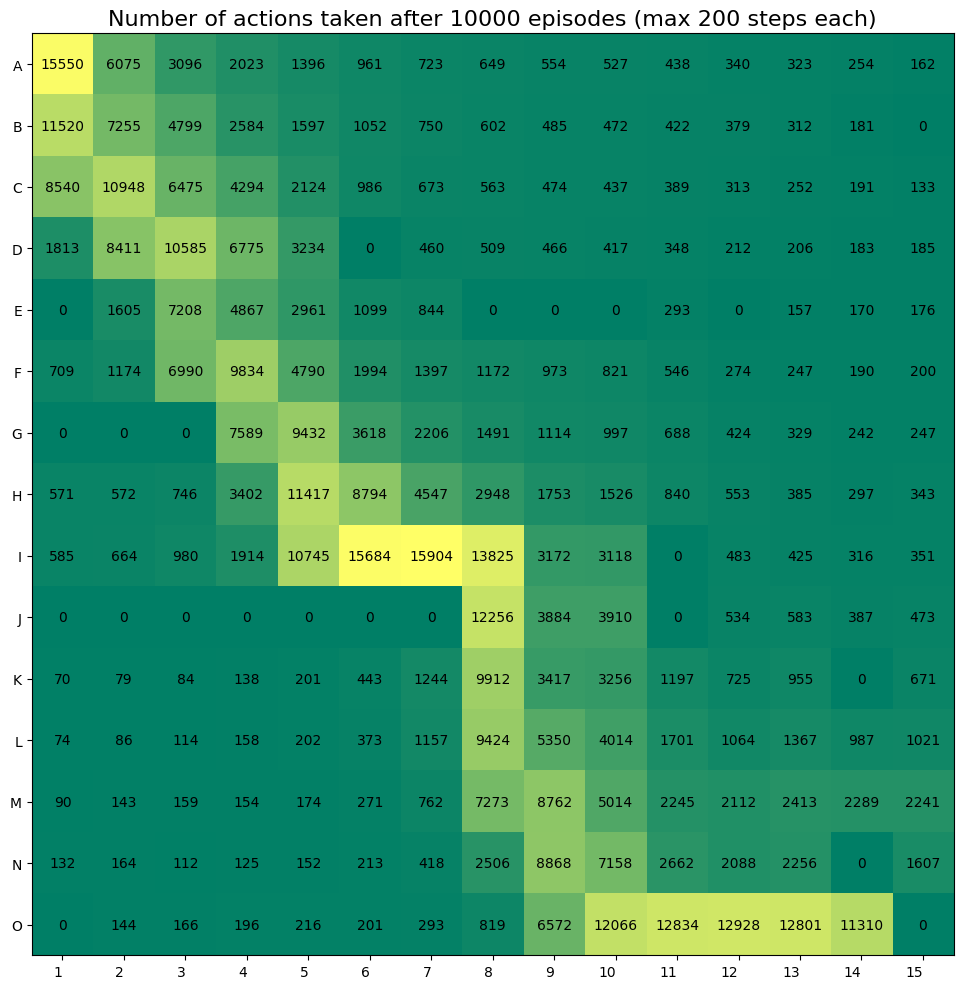

In [32]:
Y_Cord = [chr(65 + i) for i in range(Envir.height)]   # A → O (15 hàng)
X_Cord = [str(i + 1) for i in range(Envir.width)]     # 1 → 15 (15 cột)

Map = np.zeros([Envir.height, Envir.width])
for i in range(Envir.height):
    for j in range(Envir.width):
        state = i * Envir.width + j
        if state in dummy_q_agent.Q_table:
            list_freq = [f[1] for f in dummy_q_agent.Q_table[state].values()]
            Map[i][j] = sum(list_freq)
        else:
            Map[i][j] = 0

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(Map, cmap="summer")

ax.set_xticks(np.arange(len(X_Cord)))
ax.set_yticks(np.arange(len(Y_Cord)))
ax.set_xticklabels(X_Cord)
ax.set_yticklabels(Y_Cord)

plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")

for i in range(len(Y_Cord)):
    for j in range(len(X_Cord)):
        ax.text(j, i, int(Map[i, j]), ha="center", va="center", color="k")

ax.set_title(f"Number of actions taken after {num_episodes} episodes (max {max_steps} steps each)",
             fontdict={'size':16})
fig.tight_layout()
plt.show()


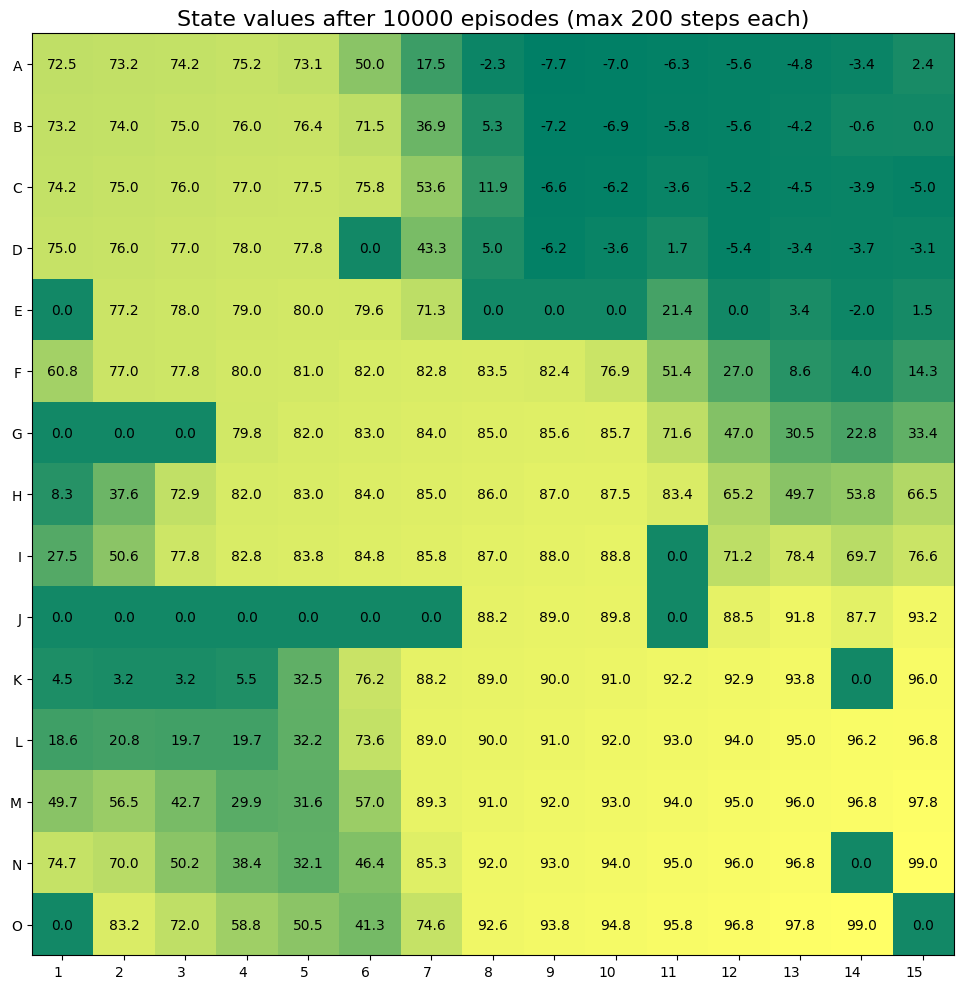

In [33]:
Y_Cord = [chr(65 + i) for i in range(Envir.height)]   # A → O (15 hàng)
X_Cord = [str(i + 1) for i in range(Envir.width)]     # 1 → 15 (15 cột)

# === State Value Map ===
Map = np.zeros([Envir.height, Envir.width])
for i in range(Envir.height):
    for j in range(Envir.width):
        state = i * Envir.width + j
        if state in dummy_q_agent.Q_table:
            # Lấy trung bình giá trị Q của các hành động tại state đó
            list_value = [round(f[0], 1) for f in dummy_q_agent.Q_table[state].values()]
            Map[i][j] = round(np.mean(list_value), 1)
        else:
            Map[i][j] = 0

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(Map, cmap="summer")

# Hiển thị ticks
ax.set_xticks(np.arange(len(X_Cord)))
ax.set_yticks(np.arange(len(Y_Cord)))
ax.set_xticklabels(X_Cord)
ax.set_yticklabels(Y_Cord)

plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")

# Ghi giá trị lên từng ô
for i in range(len(Y_Cord)):
    for j in range(len(X_Cord)):
        ax.text(j, i, f"{Map[i, j]:.1f}", ha="center", va="center", color="k")

# Tiêu đề cập nhật theo episode
ax.set_title(f"State values after {num_episodes} episodes (max {max_steps} steps each)",
             fontdict={'size':16})
fig.tight_layout()
plt.show()


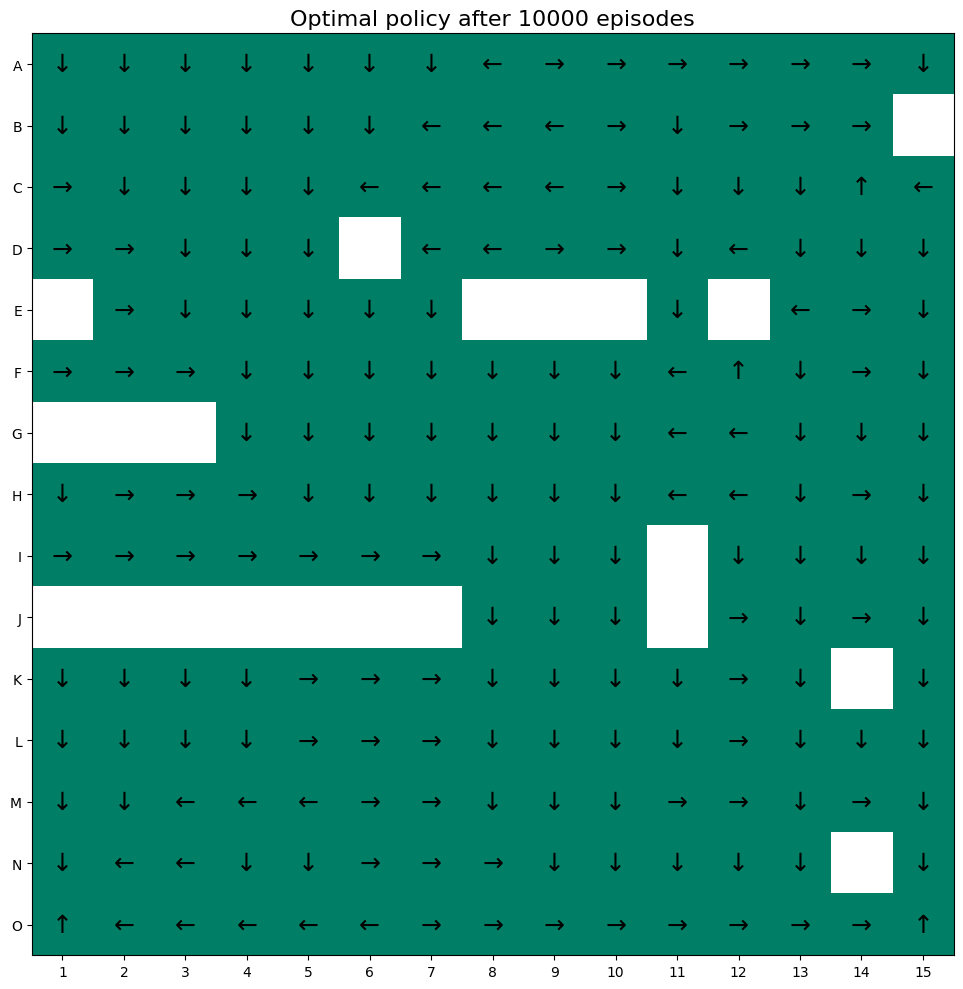

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# ====== Nhãn cho các cột và hàng ======
Y_Cord = [chr(65 + i) for i in range(Envir.height)]   # A → O (15 hàng)
X_Cord = [str(i + 1) for i in range(Envir.width)]     # 1 → 15 (15 cột)

# ====== Giải mã hành động sang mũi tên ======
def decode_action(action):
    return {
        0: "\u2191",  # UP
        1: "\u2193",  # DOWN
        2: "\u2190",  # LEFT
        3: "\u2192"   # RIGHT
    }.get(action, "")

# ====== Khởi tạo bản đồ ======
Map = np.zeros((Envir.height, Envir.width))
Map_labels = [['' for _ in range(Envir.width)] for _ in range(Envir.height)]

# ====== Vẽ chính sách (policy) ======
for i in range(Envir.height):
    for j in range(Envir.width):
        state = i * Envir.width + j

        # Bỏ qua tường và điểm đặc biệt
        if state in Envir.walls or state in Envir.start:
            Map[i][j] = np.nan
            continue

        # Nếu state tồn tại trong Q-table
        if state in dummy_q_agent.Q_table:
            best_action, best_value = None, -np.inf

            # Duyệt qua các hành động
            for action, (q_val, _) in dummy_q_agent.Q_table[state].items():
                next_state, _, _ = Envir.get_Observation(state, action)
                if next_state == state:  # không di chuyển được (tường, biên)
                    continue
                if q_val > best_value:
                    best_value = q_val
                    best_action = action

            # Ghi mũi tên hành động tốt nhất
            if best_action is not None:
                Map_labels[i][j] = decode_action(best_action)
            else:
                Map[i][j] = np.nan
        else:
            Map[i][j] = np.nan

# ====== Vẽ bản đồ ======
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(Map, cmap='summer', interpolation='none')

# Gán nhãn trục
ax.set_xticks(np.arange(len(X_Cord)))
ax.set_yticks(np.arange(len(Y_Cord)))
ax.set_xticklabels(X_Cord)
ax.set_yticklabels(Y_Cord)
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

# Hiển thị mũi tên
for i in range(len(Y_Cord)):
    for j in range(len(X_Cord)):
        if not np.isnan(Map[i][j]):
            ax.text(j, i, Map_labels[i][j],
                    ha="center", va="center", color="k", fontsize=18)

ax.set_title(f"Optimal policy after {num_episodes} episodes", fontsize=16)
fig.tight_layout()
plt.show()


In [35]:
Envir.get_Map()

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29]
 [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44]
 [ 45  46  47  48  49  50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74]
 [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89]
 [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
 [105 106 107 108 109 110 111 112 113 114 115 116 117 118 119]
 [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134]
 [135 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
 [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164]
 [165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
 [180 181 182 183 184 185 186 187 188 189 190 191 192 193 194]
 [195 196 197 198 199 200 201 202 203 204 205 206 207 208 209]
 [210 211 212 213 214 215 216 217 218 219 220 221 222 223 224]]


#SARSA (tương tự)

In [36]:
class SARSA_agent:
    def __init__(self, envir, init_location, learning_rate=0.1, discount_factor=1,
                 epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.9997):
        self.envir = envir
        self.Q_table = {
            state: {action: [0.0, 0] for action in envir.action_space}
            for state in range(envir.width * envir.height)
        }

        self.alpha = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay

        self.lastState = None
        self.lastAction = None
        self.reward_trace = []
        self.location_now = init_location

    def getAction(self, observation):
        location, action_space, pre_reward = observation

        if pre_reward is not None and self.lastAction is not None and self.lastState is not None:
            old_value, count = self.Q_table[self.lastState][self.lastAction]
            next_action = max(self.Q_table[location], key=lambda a: self.Q_table[location][a][0])
            next_q = self.Q_table[location][next_action][0]
            new_value = old_value + self.alpha * (pre_reward + self.gamma * next_q - old_value)
            self.Q_table[self.lastState][self.lastAction] = [new_value, count + 1]
            self.reward_trace.append(pre_reward)

        if np.random.rand() < self.epsilon:
            action = random.choice(action_space)
        else:
            action = max(self.Q_table[location], key=lambda a: self.Q_table[location][a][0])

        self.lastState = location
        self.lastAction = action
        self.location_now = location

        return action

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
            self.epsilon = max(self.epsilon_min, self.epsilon)

    def reset_episode(self, init_location):
        self.lastState = None
        self.lastAction = None
        self.location_now = init_location


In [37]:
init_location = 0
dummy_sarsa_agent = SARSA_agent(envir=Envir, init_location=init_location,
                        learning_rate=0.1, discount_factor=1, epsilon=1,epsilon_min=0.05,epsilon_decay=0.9997)

num_episodes = 10000
max_steps = 500
log_freq = 100
Data_plot2 = []

chosen_action = None

for episode in range(num_episodes):
    dummy_sarsa_agent.location_now = init_location
    dummy_sarsa_agent.lastState = None
    dummy_sarsa_agent.lastAction = None
    dummy_sarsa_agent.decay_epsilon()
    total_reward = 0
    chosen_action = None

    for step in range(max_steps):
        env_observation = Envir.get_Observation(location=dummy_sarsa_agent.location_now, action=chosen_action)
        location, action_space, reward = env_observation

        chosen_action = dummy_sarsa_agent.getAction(observation=env_observation)

        total_reward += reward
        dummy_sarsa_agent.location_now = location

        if location in Envir.terminal_states:
            break

    # Logging
    if (episode + 1) % log_freq == 0:
        aver = np.mean(dummy_sarsa_agent.reward_trace[-log_freq*max_steps:])
        Data_plot2.append(aver)
        print(f"Episode: {episode + 1}\tTotal reward: {total_reward}\tAverage: {aver:.3f}")


Episode: 100	Total reward: -205	Average: -0.975
Episode: 200	Total reward: -545	Average: -0.930
Episode: 300	Total reward: -177	Average: -0.835
Episode: 400	Total reward: -164	Average: -0.709
Episode: 500	Total reward: -39	Average: -0.629
Episode: 600	Total reward: -88	Average: -0.539
Episode: 700	Total reward: -61	Average: -0.458
Episode: 800	Total reward: -52	Average: -0.392
Episode: 900	Total reward: -24	Average: -0.317
Episode: 1000	Total reward: -6	Average: -0.261
Episode: 1100	Total reward: -10	Average: -0.186
Episode: 1200	Total reward: 25	Average: -0.124
Episode: 1300	Total reward: 30	Average: -0.057
Episode: 1400	Total reward: 8	Average: 0.004
Episode: 1500	Total reward: 29	Average: 0.072
Episode: 1600	Total reward: 8	Average: 0.145
Episode: 1700	Total reward: 6	Average: 0.199
Episode: 1800	Total reward: 43	Average: 0.270
Episode: 1900	Total reward: 40	Average: 0.338
Episode: 2000	Total reward: -9	Average: 0.397
Episode: 2100	Total reward: 47	Average: 0.453
Episode: 2200	Total

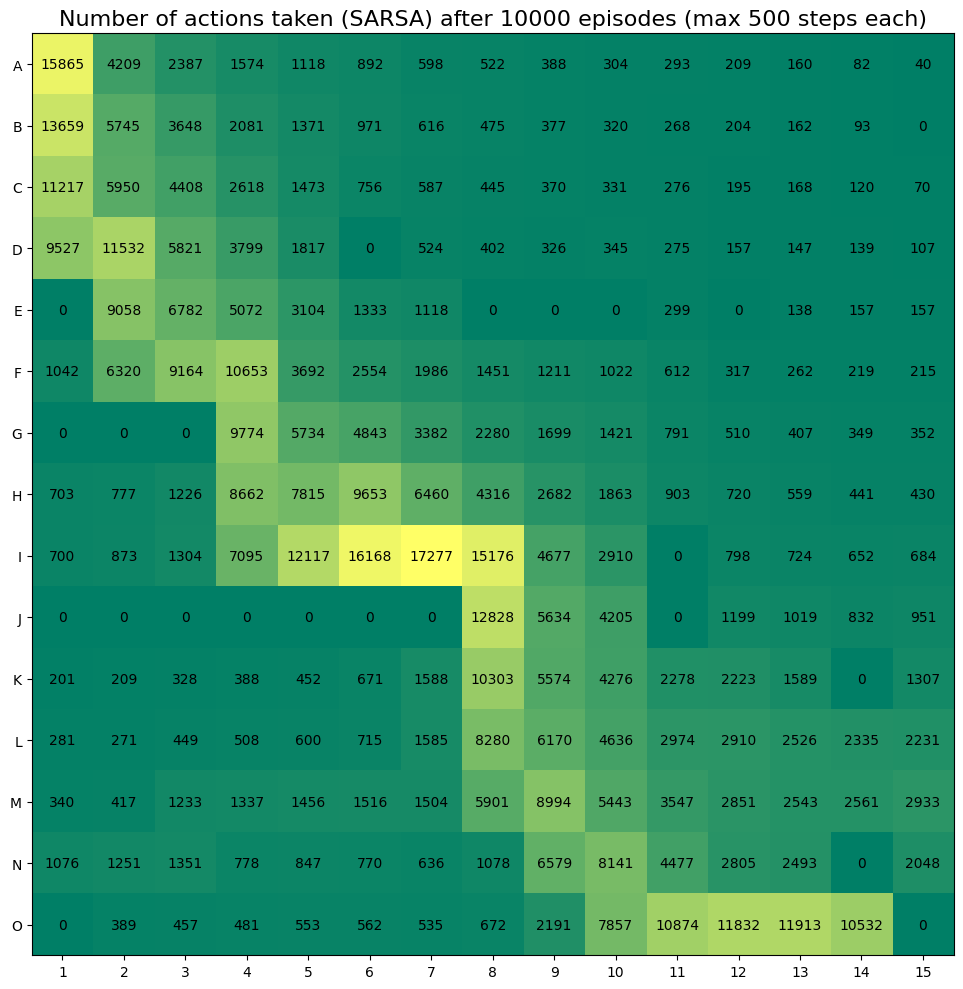

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# === Gán nhãn trục ===
Y_Cord = [chr(65 + i) for i in range(Envir.height)]   # A → O (15 hàng)
X_Cord = [str(i + 1) for i in range(Envir.width)]     # 1 → 15 (15 cột)

# === Map tần suất hành động của SARSA agent ===
Map = np.zeros((Envir.height, Envir.width))

for i in range(Envir.height):
    for j in range(Envir.width):
        state = i * Envir.width + j
        if state in dummy_sarsa_agent.Q_table:
            list_freq = [f[1] for f in dummy_sarsa_agent.Q_table[state].values()]
            Map[i, j] = sum(list_freq)
        else:
            Map[i, j] = 0

# === Vẽ heatmap ===
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(Map, cmap="summer", origin="upper")

# Gán nhãn trục
ax.set_xticks(np.arange(len(X_Cord)))
ax.set_yticks(np.arange(len(Y_Cord)))
ax.set_xticklabels(X_Cord)
ax.set_yticklabels(Y_Cord)

# Không xoay nhãn
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

# Ghi số lượng lên từng ô
for i in range(len(Y_Cord)):
    for j in range(len(X_Cord)):
        ax.text(j, i, int(Map[i, j]), ha="center", va="center", color="k")

# Tiêu đề
ax.set_title(f"Number of actions taken (SARSA) after {num_episodes} episodes (max {max_steps} steps each)",
             fontdict={'size':16})

fig.tight_layout()
plt.show()


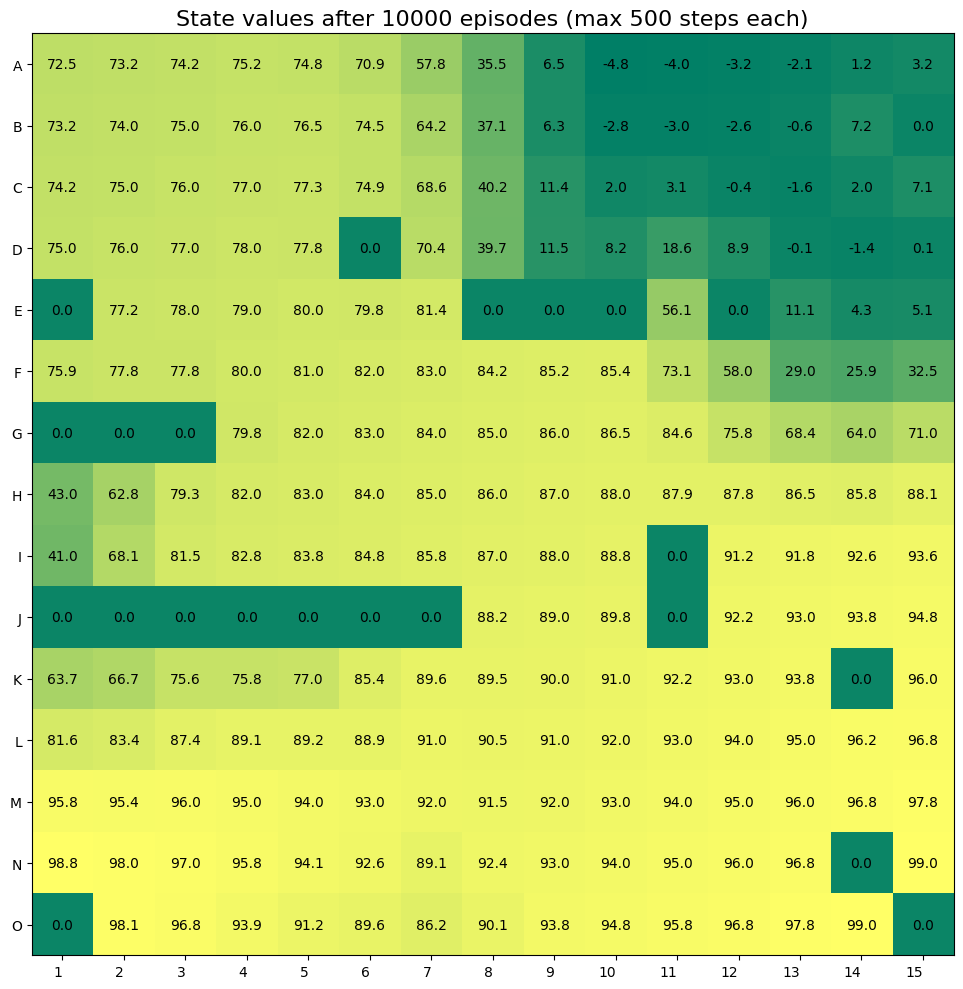

In [39]:
Y_Cord = [chr(65 + i) for i in range(Envir.height)]   # A → O (15 hàng)
X_Cord = [str(i + 1) for i in range(Envir.width)]     # 1 → 15 (15 cột)

# === State Value Map ===
Map = np.zeros([Envir.height, Envir.width])
for i in range(Envir.height):
    for j in range(Envir.width):
        state = i * Envir.width + j
        if state in dummy_sarsa_agent.Q_table:
            # Lấy trung bình giá trị Q của các hành động tại state đó
            list_value = [round(f[0], 1) for f in dummy_sarsa_agent.Q_table[state].values()]
            Map[i][j] = round(np.mean(list_value), 1)
        else:
            Map[i][j] = 0

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(Map, cmap="summer")

# Hiển thị ticks
ax.set_xticks(np.arange(len(X_Cord)))
ax.set_yticks(np.arange(len(Y_Cord)))
ax.set_xticklabels(X_Cord)
ax.set_yticklabels(Y_Cord)

plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")

# Ghi giá trị lên từng ô
for i in range(len(Y_Cord)):
    for j in range(len(X_Cord)):
        ax.text(j, i, f"{Map[i, j]:.1f}", ha="center", va="center", color="k")

# Tiêu đề cập nhật theo episode
ax.set_title(f"State values after {num_episodes} episodes (max {max_steps} steps each)",
             fontdict={'size':16})
fig.tight_layout()
plt.show()


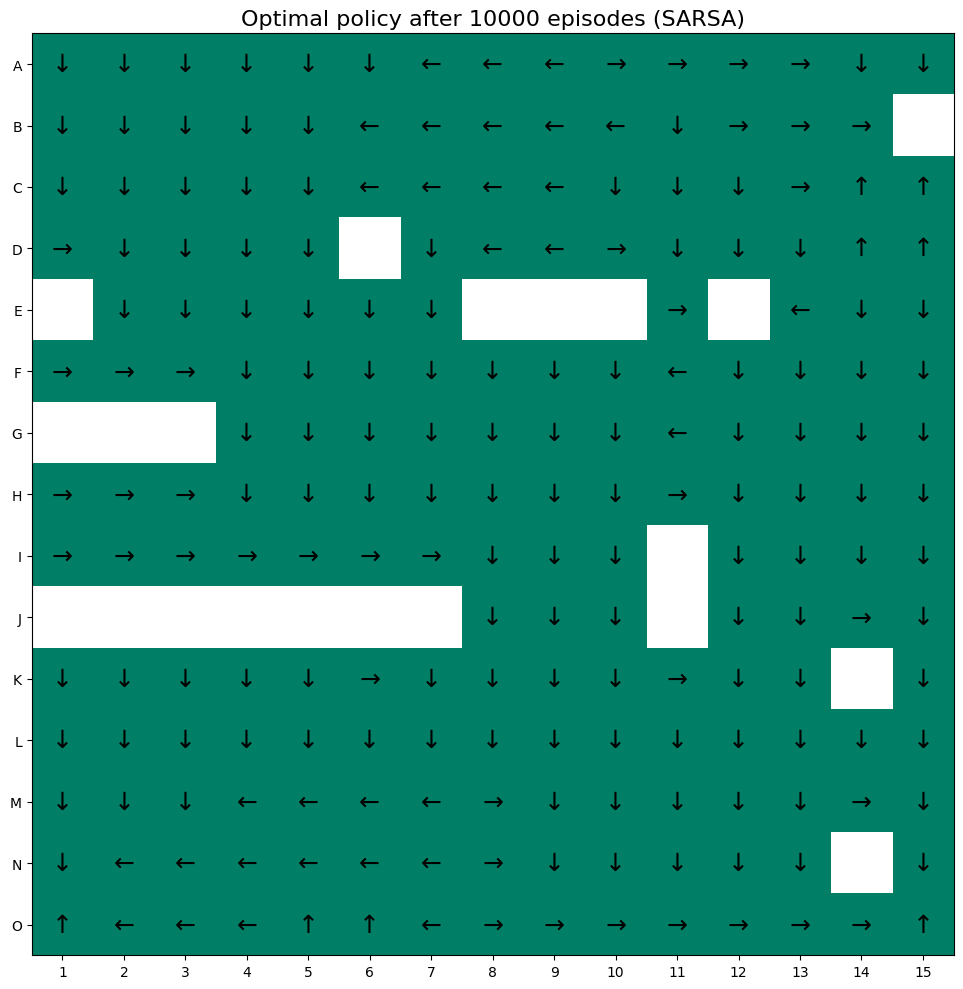

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# ====== Nhãn cho các cột và hàng ======
Y_Cord = [chr(65 + i) for i in range(Envir.height)]   # A → O (15 hàng)
X_Cord = [str(i + 1) for i in range(Envir.width)]     # 1 → 15 (15 cột)

# ====== Giải mã hành động sang mũi tên ======
def decode_action(action):
    return {
        0: "\u2191",  # UP
        1: "\u2193",  # DOWN
        2: "\u2190",  # LEFT
        3: "\u2192"   # RIGHT
    }.get(action, "")

# ====== Khởi tạo bản đồ ======
Map = np.zeros((Envir.height, Envir.width))
Map_labels = [['' for _ in range(Envir.width)] for _ in range(Envir.height)]

# ====== Vẽ chính sách (policy) ======
for i in range(Envir.height):
    for j in range(Envir.width):
        state = i * Envir.width + j

        # Bỏ qua tường và điểm đặc biệt
        if state in Envir.walls or state in Envir.start:
            Map[i][j] = np.nan
            continue

        # Nếu state tồn tại trong Q-table
        if state in dummy_sarsa_agent.Q_table:
            best_action, best_value = None, -np.inf

            # Duyệt qua các hành động
            for action, (q_val, _) in dummy_sarsa_agent.Q_table[state].items():
                next_state, _, _ = Envir.get_Observation(state, action)
                if next_state == state:  # không di chuyển được (tường, biên)
                    continue
                if q_val > best_value:
                    best_value = q_val
                    best_action = action

            # Ghi mũi tên hành động tốt nhất
            if best_action is not None:
                Map_labels[i][j] = decode_action(best_action)
            else:
                Map[i][j] = np.nan
        else:
            Map[i][j] = np.nan

# ====== Vẽ bản đồ ======
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(Map, cmap='summer', interpolation='none')

# Gán nhãn trục
ax.set_xticks(np.arange(len(X_Cord)))
ax.set_yticks(np.arange(len(Y_Cord)))
ax.set_xticklabels(X_Cord)
ax.set_yticklabels(Y_Cord)
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

# Hiển thị mũi tên
for i in range(len(Y_Cord)):
    for j in range(len(X_Cord)):
        if not np.isnan(Map[i][j]):
            ax.text(j, i, Map_labels[i][j],
                    ha="center", va="center", color="k", fontsize=18)

# ====== Tiêu đề ======
ax.set_title(f"Optimal policy after {num_episodes} episodes (SARSA)", fontsize=16)
fig.tight_layout()
plt.show()


##So sánh avg reward trung bình mỗi episode

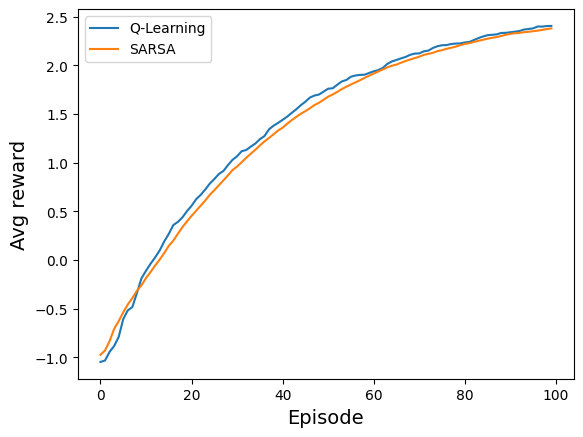

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(Data_plot1, label="Q-Learning")
plt.plot(Data_plot2, label="SARSA")
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Avg reward", fontsize=14)
plt.legend()
plt.show()

##Thực tế đường đi robot sẽ áp dụng khi đi:

Q-learning path length: 28 steps | Total reward: 73
SARSA path length: 28 steps | Total reward: 73


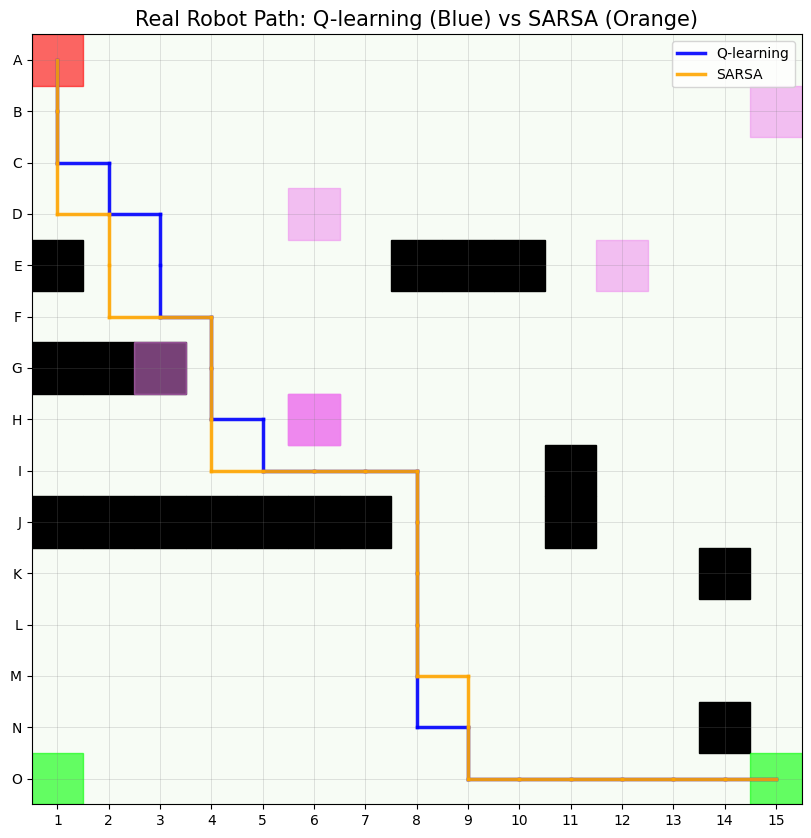

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_real_path(agent, Envir, start_state=0, max_steps=300):
    """Sinh đường đi thật của agent sau huấn luyện"""
    path = [start_state]
    state = start_state
    total_reward = 0

    for _ in range(max_steps):
        best_action = max(agent.Q_table[state], key=lambda a: agent.Q_table[state][a][0])
        next_state, _, reward = Envir.get_Observation(state, best_action)
        total_reward += reward

        # teleport → chỉ đánh dấu, không nối
        if next_state in Envir.start:
            path.append(next_state)
            total_reward += Envir.reward[Envir.start.index(next_state)]
            next_state = Envir.end[Envir.start.index(next_state)]

        path.append(next_state)
        if next_state in Envir.terminal_states:
            break
        state = next_state

    return path, total_reward

# ---- Đường đi thực tế ----
path_q, reward_q = simulate_real_path(dummy_q_agent, Envir)
path_s, reward_s = simulate_real_path(dummy_sarsa_agent, Envir)

print(f"Q-learning path length: {len(path_q)-1} steps | Total reward: {reward_q}")
print(f"SARSA path length: {len(path_s)-1} steps | Total reward: {reward_s}")

# ---- Chuẩn bị lưới hiển thị ----
Y_Cord = [chr(65 + i) for i in range(Envir.height)]  # A→O
X_Cord = [str(i + 1) for i in range(Envir.width)]    # 1→15
Map = np.zeros((Envir.height, Envir.width))

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(Map, cmap="Greens", interpolation="none", origin="upper")

# --- Vẽ tường ---
for w in Envir.walls:
    i, j = divmod(w, Envir.width)
    ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, color="black"))

# --- Teleport ---
for s, e in zip(Envir.start, Envir.end):
    si, sj = divmod(s, Envir.width)
    ei, ej = divmod(e, Envir.width)
    for (x, y) in [(sj, si), (ej, ei)]:
        ax.add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, color="violet", alpha=0.5))

# --- Goal ---
for g in Envir.terminal_states:
    gi, gj = divmod(g, Envir.width)
    ax.add_patch(plt.Rectangle((gj-0.5, gi-0.5), 1, 1, color="lime", alpha=0.6))

# --- Start ---
start_i, start_j = divmod(path_q[0], Envir.width)
ax.add_patch(plt.Rectangle((start_j-0.5, start_i-0.5), 1, 1, color="red", alpha=0.6))

# --- Đường Q-learning ---
coords_q = [divmod(s, Envir.width) for s in path_q]
for k in range(len(coords_q)-1):
    if path_q[k] in Envir.start:
        continue
    y1, x1 = coords_q[k]
    y2, x2 = coords_q[k+1]
    ax.plot([x1, x2], [y1, y2], color="blue", linewidth=2.5, alpha=0.9, label="Q-learning" if k==0 else "")

# --- Đường SARSA ---
coords_s = [divmod(s, Envir.width) for s in path_s]
for k in range(len(coords_s)-1):
    if path_s[k] in Envir.start:
        continue
    y1, x1 = coords_s[k]
    y2, x2 = coords_s[k+1]
    ax.plot([x1, x2], [y1, y2], color="orange", linewidth=2.5, alpha=0.9, label="SARSA" if k==0 else "")

# --- Cấu hình hiển thị ---
ax.set_xticks(np.arange(len(X_Cord)))
ax.set_yticks(np.arange(len(Y_Cord)))
ax.set_xticklabels(X_Cord)
ax.set_yticklabels(Y_Cord)
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
ax.grid(True, which='major', color='gray', linewidth=0.5, alpha=0.3)

ax.set_xlim(-0.5, Envir.width-0.5)
ax.set_ylim(Envir.height-0.5, -0.5)
ax.set_title("Real Robot Path: Q-learning (Blue) vs SARSA (Orange)", fontsize=15)
ax.legend(loc="upper right")
plt.show()
